<a href="https://colab.research.google.com/github/KMKINGMAN/42-face-detection-ai/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q numpy

In [ ]:
!pip install -q albumentations fastai==2.8.1 face-recognition dlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import torch
import pandas as pd
import face_recognition
from PIL import Image, ImageDraw
from fastai.vision.all import *
from fastai.vision.widgets import *
from pathlib import Path
import matplotlib.pyplot as plt
import zipfile
import random
import time
from pathlib import Path


In [ ]:
#!/usr/bin/env python3

import os
import json
import time
import requests
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# Default configurations
DEFAULT_JSON_FILE = 'amman_user_images.json'
DEFAULT_OUTPUT_DIR = 'amman_profile_images'
DEFAULT_MAX_WORKERS = 5
DEFAULT_DELAY = 0.1  # seconds between downloads


def download_image(url, file_path, delay=0.1):
    """Download an image from a URL and save it to a file.

    Args:
        url (str): URL of the image to download
        file_path (str): Path where the image will be saved
        delay (float): Time to wait after download to avoid overwhelming servers

    Returns:
        bool: True if download was successful, False otherwise
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()

        with open(file_path, 'wb') as image_file:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    image_file.write(chunk)

        # Add a small delay to avoid overwhelming the server
        time.sleep(delay)
        return True
    except Exception as e:
        return False


def download_all_images(json_file, output_dir, max_workers=5, delay=0.1):
    """Download all images from the JSON file.

    Args:
        json_file (str): Path to the JSON file with image URLs
        output_dir (str): Directory to save downloaded images
        max_workers (int): Maximum number of concurrent downloads
        delay (float): Time to wait between downloads

    Returns:
        tuple: (success_count, fail_count)
    """
    # Create output directory if it doesn't exist
    output_path = Path(output_dir)
    output_path.mkdir(exist_ok=True)

    # Load JSON data
    # with open(json_file, 'r') as f:
    user_data = [
  {
    "login": "jsukkari",
    "image_url": "https://cdn.intra.42.fr/users/867b2c5534c80d826270f67b3192d6fd/jsukkari.jpg",
    "display_name": "Jumana Sukkarieh"
  },
  {
    "login": "ralferok",
    "image_url": "https://cdn.intra.42.fr/users/33eff31c5bbc7e2950a8074e2dd1c16f/ralferok.jpg",
    "display_name": "Rama Alferokh"
  },
  {
    "login": "oamaharm",
    "image_url": "https://cdn.intra.42.fr/users/cf4ed92805c7d924c742d2854c1f4657/oamaharm.jpg",
    "display_name": "Osamah Amaharmeh"
  },
  {
    "login": "aabusnin",
    "image_url": "https://cdn.intra.42.fr/users/00a2382002a9f35d6ec9d49281cc40ea/aabusnin.jpg",
    "display_name": "Ayham Abusnineh"
  },
  {
    "login": "tshakbou",
    "image_url": "https://cdn.intra.42.fr/users/4d323289f918b9a9ec4cf04c1166966c/tshakbou.jpg",
    "display_name": "Tariq Shakboua"
  },
  {
    "login": "mabdelqa",
    "image_url": "https://cdn.intra.42.fr/users/4aafd5957286108edce1d4137df5e13e/mabdelqa.jpg",
    "display_name": "Mahmoud Abdelqader"
  },
  {
    "login": "sabuzain",
    "image_url": "https://cdn.intra.42.fr/users/ef56aceab881aff61aadfc8413ac1a08/sabuzain.jpg",
    "display_name": "Suhaib Abuzainah"
  },
  {
    "login": "moodeh",
    "image_url": "https://cdn.intra.42.fr/users/dd4db0a807a375d313748185385254e7/moodeh.jpg",
    "display_name": "Motaz Odeh"
  },
  {
    "login": "jalamarn",
    "image_url": "https://cdn.intra.42.fr/users/91f9cd060105627d980f4867e9e293b3/jalamarn.jpg",
    "display_name": "Jana Alamarnah"
  },
  {
    "login": "samarnah",
    "image_url": "https://cdn.intra.42.fr/users/f765c7911db8e7d3bb334b4cc7843025/samarnah.jpg",
    "display_name": "Shatha Amarnah"
  },
  {
    "login": "mhaizan",
    "image_url": "https://cdn.intra.42.fr/users/23173762466fd20b50f8d22c1f29a10d/mhaizan.jpg",
    "display_name": "Mohammad Haizan"
  },
  {
    "login": "moatieh",
    "image_url": "https://cdn.intra.42.fr/users/acab6f4cf1979f06029c374fea16de47/moatieh.jpg",
    "display_name": "Mohammad Atieh"
  },
  {
    "login": "ymusleh",
    "image_url": "https://cdn.intra.42.fr/users/3f94ec08d88528d0215d713468431f18/ymusleh.jpg",
    "display_name": "Yazan Musleh"
  },
  {
    "login": "zalfaour",
    "image_url": "https://cdn.intra.42.fr/users/351aade23c044107e94e413d06ccddd2/zalfaour.jpg",
    "display_name": "Zaid Alfaouri"
  },
  {
    "login": "anofal",
    "image_url": "https://cdn.intra.42.fr/users/a24cf457346c17a530433ea1ed924b55/anofal.jpg",
    "display_name": "Ahmad Nofal"
  },
  {
    "login": "lalhadid",
    "image_url": "https://cdn.intra.42.fr/users/c967cb13d50cc0563fb4001c39cc2630/lalhadid.jpg",
    "display_name": "Leen Alhadidi"
  },
  {
    "login": "fobeidat",
    "image_url": "https://cdn.intra.42.fr/users/07626e21f898d26eb66f45ca28001e5a/fobeidat.jpg",
    "display_name": "Feras Obeidat"
  },
  {
    "login": "raltiti",
    "image_url": "https://cdn.intra.42.fr/users/8914f80f4bd8e3f9c999f5b860f8e1c6/raltiti.jpg",
    "display_name": "Rabee Altiti"
  },
  {
    "login": "roahmad",
    "image_url": "https://cdn.intra.42.fr/users/d74bd32ce65124215f8be907c57b39d3/roahmad.jpg",
    "display_name": "Roaa Ahmad"
  },
  {
    "login": "ahassoun",
    "image_url": "https://cdn.intra.42.fr/users/736b13bd2dd395b39e578b5b034cf50c/ahassoun.jpg",
    "display_name": "Ayham Hassouneh"
  },
  {
    "login": "laljubeh",
    "image_url": "https://cdn.intra.42.fr/users/e9c0c5d0d7369bbc8349006570973e42/laljubeh.jpg",
    "display_name": "Layan Aljubeh"
  },
  {
    "login": "oal-qais",
    "image_url": "https://cdn.intra.42.fr/users/08b02697444a8ec37d4994905fd0a2fd/oal-qais.jpg",
    "display_name": "Omar Al Qaissieh"
  },
  {
    "login": "abhasan",
    "image_url": "https://cdn.intra.42.fr/users/fa159ca0da2de665997d00cf5b697351/abhasan.jpg",
    "display_name": "Abdallah Hasan"
  },
  {
    "login": "bal-dala",
    "image_url": "https://cdn.intra.42.fr/users/9765cfe52eb1e43ca9522f935672f820/bal-dala.jpg",
    "display_name": "Bashar Al Dalabeeh"
  },
  {
    "login": "aaljarir",
    "image_url": "https://cdn.intra.42.fr/users/40511c7c9812da14a2b462c00930bee2/aaljarir.jpg",
    "display_name": "Ahmad Aljariri"
  },
  {
    "login": "yabu-alt",
    "image_url": "https://cdn.intra.42.fr/users/8645378a092720fc61b95e2659bd3022/yabu-alt.jpg",
    "display_name": "Yousef Abu Althanin"
  },
  {
    "login": "aasendar",
    "image_url": "https://cdn.intra.42.fr/users/51c94730c35b85d34405e4c36069181b/aasendar.jpg",
    "display_name": "Adel Asendar"
  },
  {
    "login": "maltouba",
    "image_url": "https://cdn.intra.42.fr/users/54181178a89370cee935bc6339769fd9/maltouba.jpg",
    "display_name": "Mohammad Altoubah"
  },
  {
    "login": "nalqadi",
    "image_url": "https://cdn.intra.42.fr/users/256a35d17ed907819f38e280c157198e/nalqadi.jpg",
    "display_name": "Nour Alqadi"
  },
  {
    "login": "oal-majd",
    "image_url": "https://cdn.intra.42.fr/users/65a45f56d6d00c99f44455122d1e9941/oal-majd.jpg",
    "display_name": "Omar Al Majdalawi"
  },
  {
    "login": "aalkhaso",
    "image_url": "https://cdn.intra.42.fr/users/aea89d7115ef302030fe7fd53bc5ea6a/aalkhaso.jpg",
    "display_name": "Ahmad Alkhasoneh"
  },
  {
    "login": "raalbakr",
    "image_url": "https://cdn.intra.42.fr/users/e3942d3c2010a1ce85062df08d2e25af/raalbakr.jpg",
    "display_name": "Rama Albakri"
  },
  {
    "login": "ighunaim",
    "image_url": "https://cdn.intra.42.fr/users/1843e84812475cfc301c20550660b68d/ighunaim.jpg",
    "display_name": "Ibrahim Ghunaim"
  },
  {
    "login": "ialkhati",
    "image_url": "https://cdn.intra.42.fr/users/1d830d8942617aacfdb617850bb9a04d/ialkhati.jpg",
    "display_name": "Idries Alkhatib"
  },
  {
    "login": "moalkhat",
    "image_url": "https://cdn.intra.42.fr/users/1821d756880ca8d8b4cdbf1d7d93fdd8/moalkhat.jpg",
    "display_name": "Mohammad Alkhatib"
  },
  {
    "login": "sdaabes",
    "image_url": "https://cdn.intra.42.fr/users/42f21f332241d9994b54341f2f818d2b/sdaabes.jpg",
    "display_name": "Sura Daabes"
  },
  {
    "login": "maloreef",
    "image_url": "https://cdn.intra.42.fr/users/f1fc8292ae1a38430b9a89cd391c62cc/maloreef.jpg",
    "display_name": "Mahmud Aloreefy"
  },
  {
    "login": "wkhalifa",
    "image_url": "https://cdn.intra.42.fr/users/c7e729c71c9284570126ad9b8a69ad1d/wkhalifa.jpg",
    "display_name": "Wahp Khalifat"
  },
  {
    "login": "zalbeeta",
    "image_url": "https://cdn.intra.42.fr/users/9ccbe908cb13374ecfc9e0130d817579/zalbeeta.jpg",
    "display_name": "Zaid Albeetar"
  },
  {
    "login": "zsemreen",
    "image_url": "https://cdn.intra.42.fr/users/029589b2651246d7234a5cc8573cd20e/zsemreen.jpg",
    "display_name": "Zaid Semreen"
  },
  {
    "login": "oalharas",
    "image_url": "https://cdn.intra.42.fr/users/8ef3ac66e5e2b27c8005a988e540db61/oalharas.jpg",
    "display_name": "Osama Alharases"
  },
  {
    "login": "isalem",
    "image_url": "https://cdn.intra.42.fr/users/1aafc5607811fe32de9e550a8090272f/isalem.jpg",
    "display_name": "Ihab Salem"
  },
  {
    "login": "msarsak",
    "image_url": "https://cdn.intra.42.fr/users/ca9aaaeb08763dd3962a932b3c31fc45/msarsak.jpg",
    "display_name": "Maram Sarsak"
  },
  {
    "login": "siwhusse",
    "image_url": "https://cdn.intra.42.fr/users/a22f00f1d5783a58fc236d713a848a34/siwhusse.jpg",
    "display_name": "Siwar Hussein"
  },
  {
    "login": "hhazeem",
    "image_url": "https://cdn.intra.42.fr/users/df587bf42115c14b4fa0a08b4f559acd/hhazeem.jpg",
    "display_name": "Hala Hazeem"
  },
  {
    "login": "abmusleh",
    "image_url": "https://cdn.intra.42.fr/users/2b97d1712c313d6f86aa5ce3d4b79090/abmusleh.jpg",
    "display_name": "Abdallah Musleh"
  },
  {
    "login": "anakash",
    "image_url": "https://cdn.intra.42.fr/users/be71f94333006f1a1a2cac4f3578c0c8/anakash.jpg",
    "display_name": "Anas Nakash"
  },
  {
    "login": "msalloum",
    "image_url": "https://cdn.intra.42.fr/users/384ed78f1cc09f362234b26c1a7db070/msalloum.jpg",
    "display_name": "Momena Salloum"
  },
  {
    "login": "karainat",
    "image_url": "https://cdn.intra.42.fr/users/d9d2115ed676d60c00a91f778c5426ad/karainat.jpg",
    "display_name": "Karam Arainat"
  },
  {
    "login": "ayaghi",
    "image_url": "https://cdn.intra.42.fr/users/4a5575efa53ab38d71035f86a5f9901f/ayaghi.jpg",
    "display_name": "Abdelrahman Yaghi"
  },
  {
    "login": "layasrah",
    "image_url": "https://cdn.intra.42.fr/users/8ebc7ca075a00e87122f6802050efa31/layasrah.jpg",
    "display_name": "Laith Ayasrah"
  },
  {
    "login": "ialmasri",
    "image_url": "https://cdn.intra.42.fr/users/efdbacea604d4a2db96934443aff133a/ialmasri.jpg",
    "display_name": "Idrees Almasri"
  },
  {
    "login": "ral-jama",
    "image_url": "https://cdn.intra.42.fr/users/8d9db8c0a116c835a2616a8e624dc4a4/ral-jama.jpg",
    "display_name": "Rayyan Al Jamal"
  },
  {
    "login": "malruwai",
    "image_url": "https://cdn.intra.42.fr/users/013af9eb0cafebc8df839b7eab9e5d09/malruwai.jpg",
    "display_name": "Mamoun Alruwaidan"
  },
  {
    "login": "ozaiytou",
    "image_url": "https://cdn.intra.42.fr/users/b6660ad004bb1b3761bdf7e68ecf2a77/ozaiytou.jpg",
    "display_name": "Osama Zaiytoun"
  },
  {
    "login": "yrayyan",
    "image_url": "https://cdn.intra.42.fr/users/0d083f03d425125901f4b62b49eee254/yrayyan.jpg",
    "display_name": "Yanal Rayyan"
  },
  {
    "login": "aalababn",
    "image_url": "https://cdn.intra.42.fr/users/5bde8716e2b56c3b4e21602869a940ad/aalababn.jpg",
    "display_name": "Ayoub Alababneh"
  },
  {
    "login": "mhdeeb",
    "image_url": "https://cdn.intra.42.fr/users/c0713fa2b2e98d1a5f513faa296358ee/mhdeeb.jpg",
    "display_name": "Mohammad Hdeeb"
  },
  {
    "login": "manaltam",
    "image_url": "https://cdn.intra.42.fr/users/cbce3ae23fc09f974c944900bddc8b7b/manaltam.jpg",
    "display_name": "Manar Altamimi"
  },
  {
    "login": "oabuhijl",
    "image_url": "https://cdn.intra.42.fr/users/6c9745f6ad9fb19ce536994d57b398d3/oabuhijl.jpg",
    "display_name": "Osama Abuhijleh"
  },
  {
    "login": "qishream",
    "image_url": "https://cdn.intra.42.fr/users/be46c661f7af360e900e8b65bbfdfb74/qishream.jpg",
    "display_name": "Qusai Ishream"
  },
  {
    "login": "fsuleima",
    "image_url": "https://cdn.intra.42.fr/users/d5e95958eb5dd7a05560c56087f74e8c/fsuleima.jpg",
    "display_name": "Fawaz Suleiman"
  },
  {
    "login": "amajdi",
    "image_url": "https://cdn.intra.42.fr/users/a15a142b90103c561ae375b0861d5795/amajdi.jpg",
    "display_name": "Amer Majdi"
  },
  {
    "login": "aalmoman",
    "image_url": "https://cdn.intra.42.fr/users/40c7c71fce3cd5aaf483a8d35ead7fe4/aalmoman.jpg",
    "display_name": "Abd Alrahman Almomani"
  },
  {
    "login": "kadas",
    "image_url": "https://cdn.intra.42.fr/users/1e5fa056ecb63c044e40d85e5bd1add2/kadas.jpg",
    "display_name": "Khaled Adas"
  },
  {
    "login": "sal-yama",
    "image_url": "https://cdn.intra.42.fr/users/f9dd96b5b6fe6619a4c8186b1fe0e959/sal-yama.jpg",
    "display_name": "Sewar Al Yamani"
  },
  {
    "login": "ahosny",
    "image_url": "https://cdn.intra.42.fr/users/023da7a21cc6d09eb35d041bfdae507f/ahosny.jpg",
    "display_name": "Ahmed Hosny"
  },
  {
    "login": "obostah",
    "image_url": "https://cdn.intra.42.fr/users/be151fc6607abf92f3b2bc04c1679dd7/obostah.jpg",
    "display_name": "Omar Bostah"
  },
  {
    "login": "sealabed",
    "image_url": "https://cdn.intra.42.fr/users/dbd838b4dfd0f73b74d831ac81978080/sealabed.jpg",
    "display_name": "Seselia Alabed Allat"
  },
  {
    "login": "mabuawad",
    "image_url": "https://cdn.intra.42.fr/users/005d34738145f5c2fdef56aa2e8a013b/mabuawad.jpg",
    "display_name": "Mohammad Abuawad"
  },
  {
    "login": "nawagah",
    "image_url": "https://cdn.intra.42.fr/users/becd2451b96bc636047af36aee3b5430/nawagah.jpg",
    "display_name": "Nada Awagah"
  },
  {
    "login": "jalnajja",
    "image_url": "https://cdn.intra.42.fr/users/4c905ac524fa9db25b069223f8c55ed5/jalnajja.jpg",
    "display_name": "Jana Alnajjar"
  },
  {
    "login": "yfares",
    "image_url": "https://cdn.intra.42.fr/users/290f5e11686913c07eba2633d7062e8c/yfares.jpg",
    "display_name": "Yahia Fares"
  },
  {
    "login": "mqadah",
    "image_url": "https://cdn.intra.42.fr/users/87053f1bfb91cc3c12b0ad7976992928/mqadah.jpg",
    "display_name": "Mohammad Qadah"
  },
  {
    "login": "njaradat",
    "image_url": "https://cdn.intra.42.fr/users/79a68e6dfa6cfdf0bcb1c768092f7d8b/njaradat.jpg",
    "display_name": "Nour Jaradat"
  },
  {
    "login": "abhussei",
    "image_url": "https://cdn.intra.42.fr/users/dca34145ed9d5b8c4a6c1455f5df6e55/abhussei.jpg",
    "display_name": "Abdelmajeed Hussein"
  },
  {
    "login": "aal-khal",
    "image_url": "https://cdn.intra.42.fr/users/948d68432c986a8f7b63969063933744/aal-khal.jpg",
    "display_name": "Ali Al Khalil"
  },
  {
    "login": "aamr",
    "image_url": "https://cdn.intra.42.fr/users/08b41395f652254ae0ed3b9180fb5488/aamr.jpg",
    "display_name": "Ashraf Amr"
  },
  {
    "login": "aabuzaid",
    "image_url": "https://cdn.intra.42.fr/users/eb16ddc748c134337bf29984dfde0e29/aabuzaid.jpg",
    "display_name": "Abdel Rahman Abuzaid"
  },
  {
    "login": "amujahed",
    "image_url": "https://cdn.intra.42.fr/users/f3dd8c654e29158c34c60a3cff3df47c/amujahed.jpg",
    "display_name": "Abedalqader Mujahed"
  },
  {
    "login": "aalemami",
    "image_url": "https://cdn.intra.42.fr/users/d318cf6733a013882b8b081438f40013/aalemami.jpg",
    "display_name": "Ali Alemami"
  },
  {
    "login": "moabdela",
    "image_url": "https://cdn.intra.42.fr/users/0103e2e0345c1337bafee0b32373b874/moabdela.jpg",
    "display_name": "Mohammed Abdelaziz"
  },
  {
    "login": "mamalkaw",
    "image_url": "https://cdn.intra.42.fr/users/e8c46f9ae875464488df8a41115b4a28/mamalkaw.jpg",
    "display_name": "Masa Malkawi"
  },
  {
    "login": "ralkhali",
    "image_url": "https://cdn.intra.42.fr/users/d7e95397038a33fab75e56b5f87008d2/ralkhali.jpg",
    "display_name": "Ranim Alkhalil"
  },
  {
    "login": "mabuqare",
    "image_url": "https://cdn.intra.42.fr/users/58a88fac4adb8795c3bbfd46f3bbf222/mabuqare.jpg",
    "display_name": "Mohannad Abuqarea"
  },
  {
    "login": "zaalrafa",
    "image_url": "https://cdn.intra.42.fr/users/8c41578af88470bb2f23497fcc7cc813/zaalrafa.jpg",
    "display_name": "Zaid Alrafayia"
  },
  {
    "login": "hal-lawa",
    "image_url": "https://cdn.intra.42.fr/users/0e0fa4f0591173c118e85b1d20e740de/hal-lawa.jpg",
    "display_name": "Haia Al Lawansah"
  },
  {
    "login": "aahmad",
    "image_url": "https://cdn.intra.42.fr/users/c7a22f6993018bff5de7386a48a85cf8/aahmad.jpg",
    "display_name": "Abdelrahman Ahmad"
  },
  {
    "login": "alaham",
    "image_url": "https://cdn.intra.42.fr/users/e1e7c87536de4465a1cfd16f1f1417f3/alaham.jpg",
    "display_name": "Anas Laham"
  },
  {
    "login": "zdahboor",
    "image_url": "https://cdn.intra.42.fr/users/e42192b78925aa3c81ecc9ddea570dba/zdahboor.jpg",
    "display_name": "Zaid Dahboor"
  },
  {
    "login": "ashalabi",
    "image_url": "https://cdn.intra.42.fr/users/b92c2ee6cbc128f48eb7d5e433c78bb0/ashalabi.jpg",
    "display_name": "Abdallah Shalabi"
  },
  {
    "login": "abalsayy",
    "image_url": "https://cdn.intra.42.fr/users/69db1c58465b00e0dc965c991c95917d/abalsayy.jpg",
    "display_name": "Abd Alfattah Alsayyed"
  },
  {
    "login": "ayousef",
    "image_url": "https://cdn.intra.42.fr/users/cf89f95c682bde19c840e85c5ca272c5/ayousef.jpg",
    "display_name": "Abdallah Yousef"
  },
  {
    "login": "ikhattab",
    "image_url": "https://cdn.intra.42.fr/users/c46b858c4c5442ae80a971d6f987a835/ikhattab.jpg",
    "display_name": "Issam Khattab"
  },
  {
    "login": "salrowwa",
    "image_url": "https://cdn.intra.42.fr/users/425a8f4146bb13ab5312c992745f5525/salrowwa.jpg",
    "display_name": "Sa'ida Alrowwad"
  },
  {
    "login": "sabu-sha",
    "image_url": "https://cdn.intra.42.fr/users/02f52792a3df7d62a5ea42456e97d1f3/sabu-sha.jpg",
    "display_name": "Sondos Abu Shanab"
  },
  {
    "login": "mkarrat",
    "image_url": "https://cdn.intra.42.fr/users/3b66725af4566f76ca80e21d1b700224/mkarrat.jpg",
    "display_name": "Moustafa Karrat"
  },
  {
    "login": "ralshdai",
    "image_url": "https://cdn.intra.42.fr/users/772ac134948c8a6211c0f1b5ef05448b/ralshdai.jpg",
    "display_name": "Roa'a Alshdaifat"
  },
  {
    "login": "asbaih",
    "image_url": "https://cdn.intra.42.fr/users/bddfc7ed00b10df3f97c89c69ab69c46/asbaih.jpg",
    "display_name": "Amani Sbaih"
  },
  {
    "login": "sjawamis",
    "image_url": "https://cdn.intra.42.fr/users/4e7f191ba8ae18b0feadc77da869c958/sjawamis.jpg",
    "display_name": "Shahed Jawamis"
  },
  {
    "login": "salbanna",
    "image_url": "https://cdn.intra.42.fr/users/686f3478d7f323ab3a9ef19f5cd94c05/salbanna.jpg",
    "display_name": "Sara Albanna"
  },
  {
    "login": "haabu-sa",
    "image_url": "https://cdn.intra.42.fr/users/e95ea64022dcc3cd46593188c4d7aedf/haabu-sa.jpg",
    "display_name": "Hamza Abu Salim"
  },
  {
    "login": "sata",
    "image_url": "https://cdn.intra.42.fr/users/c2c156b546329418887dc704a8fae5ab/sata.jpg",
    "display_name": "Said Ata"
  },
  {
    "login": "zqasem",
    "image_url": "https://cdn.intra.42.fr/users/8e281e3f11e82455d0ff741cab44a53e/zqasem.jpg",
    "display_name": "Zaid Qasem"
  },
  {
    "login": "mababneh",
    "image_url": "https://cdn.intra.42.fr/users/c4344e663e250b0397c1bd316034dc95/mababneh.jpg",
    "display_name": "Mohammad Ababneh"
  },
  {
    "login": "aghaith",
    "image_url": "https://cdn.intra.42.fr/users/0092668726e88cefcd9fcd2dd8139d6e/aghaith.jpg",
    "display_name": "Ammar Ghaith"
  },
  {
    "login": "hmaqboul",
    "image_url": "https://cdn.intra.42.fr/users/13168108245ad589bbf5b4ffb7cde24b/hmaqboul.jpg",
    "display_name": "Hamzah Maqboul"
  },
  {
    "login": "mmomani",
    "image_url": "https://cdn.intra.42.fr/users/b6893697be7802eee3b80d7576986a8b/mmomani.jpg",
    "display_name": "Mohammad Momani"
  },
  {
    "login": "mnajem",
    "image_url": "https://cdn.intra.42.fr/users/05499c9e13d40cb145cc35c1e4dcfabb/mnajem.jpg",
    "display_name": "Mohammad Najem"
  },
  {
    "login": "alhubi",
    "image_url": "https://cdn.intra.42.fr/users/f4b97ebcf02337134068f086d64b4aa5/alhubi.jpg",
    "display_name": "Ala'aaldin Hubi"
  },
  {
    "login": "okreshan",
    "image_url": "https://cdn.intra.42.fr/users/28c12ab1d23591166656d41263838959/okreshan.jpg",
    "display_name": "Omar Kreshan"
  },
  {
    "login": "talqam",
    "image_url": "https://cdn.intra.42.fr/users/4b3a9b9a65531bde670e916a3a16bcb8/talqam.jpg",
    "display_name": "Tala Alqam"
  },
  {
    "login": "rzaatreh",
    "image_url": "https://cdn.intra.42.fr/users/db06cc214707a22f2487eb6352b22ca3/rzaatreh.jpg",
    "display_name": "Ruba Zaatreh"
  },
  {
    "login": "malkilan",
    "image_url": "https://cdn.intra.42.fr/users/7f6bbeac2ceb3aaf0fa54516b65d90e9/malkilan.jpg",
    "display_name": "Mustafa Alkilani"
  },
  {
    "login": "rfawares",
    "image_url": "https://cdn.intra.42.fr/users/ba9f878c9003967831bf2f19bb49a299/rfawares.jpg",
    "display_name": "Rama Fawares"
  },
  {
    "login": "anaser",
    "image_url": "https://cdn.intra.42.fr/users/e053c597a17812a3fcff3d8d429ae5bd/anaser.jpg",
    "display_name": "Afnan Naser"
  },
  {
    "login": "ymaaitah",
    "image_url": "https://cdn.intra.42.fr/users/a8d0108b1fed2b6be6f5e67480c715ac/ymaaitah.jpg",
    "display_name": "Yashfeen Maaitah"
  },
  {
    "login": "mshanabl",
    "image_url": "https://cdn.intra.42.fr/users/b20386b7e6c20a910b9f36f42fe4b7e6/mshanabl.jpg",
    "display_name": "Maryam Shanabli"
  },
  {
    "login": "talkhati",
    "image_url": "https://cdn.intra.42.fr/users/8435b28f42ba72dcb62432c6567897d2/talkhati.jpg",
    "display_name": "Tala Alkhatib"
  },
  {
    "login": "lalmasri",
    "image_url": "https://cdn.intra.42.fr/users/a02d90462da8ff0e6b2dad484a7a6ae7/lalmasri.jpg",
    "display_name": "Leen Almasri"
  },
  {
    "login": "emomani",
    "image_url": "https://cdn.intra.42.fr/users/4d6251389b500b1b0396812aecd84873/emomani.jpg",
    "display_name": "Eman Momani"
  },
  {
    "login": "malhassa",
    "image_url": "https://cdn.intra.42.fr/users/278cef2f2752e8778c28401127b02657/malhassa.jpg",
    "display_name": "Mohammad Alhassan"
  },
  {
    "login": "zaelabba",
    "image_url": "https://cdn.intra.42.fr/users/dbe627e4fa23b5627b86a55cd1ac55c8/zaelabba.jpg",
    "display_name": "Zaynab Elabbasi"
  },
  {
    "login": "rahasan",
    "image_url": "https://cdn.intra.42.fr/users/fa9b207be990582a4a6d1cead37c4b84/rahasan.jpg",
    "display_name": "Rami Hasan"
  },
  {
    "login": "lalnajda",
    "image_url": "https://cdn.intra.42.fr/users/d1270a546bead6eac901ee8c34cfcddb/lalnajda.jpg",
    "display_name": "Layan Alnajdawi"
  },
  {
    "login": "qabdel-r",
    "image_url": "https://cdn.intra.42.fr/users/856c22706731b3981bcd8de09b4be6de/qabdel-r.jpg",
    "display_name": "Qasem Abdel Razzaq"
  },
  {
    "login": "ral-sham",
    "image_url": "https://cdn.intra.42.fr/users/259476b6aa5f1d5cc65feee0c2f58f28/ral-sham.jpg",
    "display_name": "Rana Al Shamaileh"
  },
  {
    "login": "huhasan",
    "image_url": "https://cdn.intra.42.fr/users/451a37e65e2591d0426ebb1d431f3fd8/huhasan.jpg",
    "display_name": "Husein Hasan"
  },
  {
    "login": "aayasrah",
    "image_url": "https://cdn.intra.42.fr/users/a744a46900aa978183f6b526788743be/aayasrah.jpg",
    "display_name": "Abdelhadi Ayasrah"
  },
  {
    "login": "nalnatsh",
    "image_url": "https://cdn.intra.42.fr/users/a70df277ba17d0256c4fde7f3ddf0ef6/nalnatsh.jpg",
    "display_name": "Nedaa Alnatsheh"
  },
  {
    "login": "zalrafay",
    "image_url": "https://cdn.intra.42.fr/users/ecd7152b3f0570210d29491c3c499e44/zalrafay.jpg",
    "display_name": "Zeina Alrafayia"
  },
  {
    "login": "ftahat",
    "image_url": "https://cdn.intra.42.fr/users/83564888e67b0bf537084d1e15ee493e/ftahat.jpg",
    "display_name": "Faleh Tahat"
  },
  {
    "login": "aabu-mal",
    "image_url": "https://cdn.intra.42.fr/users/3c5d777ec86199487b0aa09f3010c47f/aabu-mal.jpg",
    "display_name": "Ahmed Abu Mallooh"
  },
  {
    "login": "amatar",
    "image_url": "https://cdn.intra.42.fr/users/1845150556a8dbda75458d4c6668fc84/amatar.jpg",
    "display_name": "Abdalrahman Matar"
  },
  {
    "login": "balzoubi",
    "image_url": "https://cdn.intra.42.fr/users/d29618081dbf30b1809a9158109bb73b/balzoubi.jpg",
    "display_name": "Belal Alzoubi"
  },
  {
    "login": "mghadi",
    "image_url": "https://cdn.intra.42.fr/users/640df4f79066bbf45fe97d59f233568a/mghadi.jpg",
    "display_name": "Maen Ghadi"
  },
  {
    "login": "baldeike",
    "image_url": "https://cdn.intra.42.fr/users/094ebe0a9db388d4d644c30e93381aa4/baldeike.jpg",
    "display_name": "Bassel Aldeikeh"
  },
  {
    "login": "myasin",
    "image_url": "https://cdn.intra.42.fr/users/5639b420ac33a9cd6af476ba1cc30252/myasin.jpg",
    "display_name": "Mohammad Yasin"
  },
  {
    "login": "ajaradat",
    "image_url": "https://cdn.intra.42.fr/users/517b3096e2283a442dd96a0d33c4e4b7/ajaradat.jpg",
    "display_name": "Abdallah Jaradat"
  },
  {
    "login": "snabhan",
    "image_url": "https://cdn.intra.42.fr/users/b57ba3758849ba14ab4a2476209e1458/snabhan.jpg",
    "display_name": "Sara Nabhan"
  },
  {
    "login": "nfaronia",
    "image_url": "https://cdn.intra.42.fr/users/b4725bb4c2f4073e4580a645b95fd2af/nfaronia.jpg",
    "display_name": "Nour Faronia"
  },
  {
    "login": "hzuhair",
    "image_url": "https://cdn.intra.42.fr/users/c0d10f060d6fb9aaf3eafa625c651771/hzuhair.jpg",
    "display_name": "Hamzah Zuhair"
  },
  {
    "login": "oalhasan",
    "image_url": "https://cdn.intra.42.fr/users/e2090b37f2151997bc82e7ae91d94a18/oalhasan.jpg",
    "display_name": "Omar Alhasan"
  },
  {
    "login": "mmalkawi",
    "image_url": "https://cdn.intra.42.fr/users/42767de5e071b5cbf15d7a78b11092e2/mmalkawi.jpg",
    "display_name": "Mohammad Malkawi"
  },
  {
    "login": "nalshmai",
    "image_url": "https://cdn.intra.42.fr/users/582bd34c432a6ced0aca243aaa4e956e/nalshmai.jpg",
    "display_name": "Nour Aldeen Alshmaisani"
  },
  {
    "login": "kabutabe",
    "image_url": "https://cdn.intra.42.fr/users/5b7cacd13a89cdb95b9e4e6ce2e1a7f6/kabutabe.jpg",
    "display_name": "Karam Abutabeekh"
  },
  {
    "login": "maburub",
    "image_url": "https://cdn.intra.42.fr/users/ce2e05c8cf1d8065114e8cd8dd321552/maburub.jpg",
    "display_name": "Momen Aburub"
  },
  {
    "login": "oalshbou",
    "image_url": "https://cdn.intra.42.fr/users/c50d19de99867b94a5e18031c2065e48/oalshbou.jpg",
    "display_name": "Osaid Alshboul"
  },
  {
    "login": "bmodalla",
    "image_url": "https://cdn.intra.42.fr/users/023620d0a1a9c3e8bb03ef4b344c92f1/bmodalla.jpg",
    "display_name": "Baraa Modallal"
  },
  {
    "login": "thameed",
    "image_url": "https://cdn.intra.42.fr/users/b6f4e263c0c641c3b401531d4533727b/thameed.jpg",
    "display_name": "Tareq Hameed"
  },
  {
    "login": "snababte",
    "image_url": "https://cdn.intra.42.fr/users/21f2e350796f7bd95253dba523d7a5b5/snababte.jpg",
    "display_name": "Sadeen Nababteh"
  },
  {
    "login": "melamair",
    "image_url": "https://cdn.intra.42.fr/users/aace755127360830b862a00ce322e93f/melamair.jpg",
    "display_name": "Mohammad Elamaireh"
  },
  {
    "login": "fharahsh",
    "image_url": "https://cdn.intra.42.fr/users/eced26ef4abf7dc9bdea6b203dcdd063/fharahsh.jpg",
    "display_name": "Falak Harahsheh"
  },
  {
    "login": "aalbreiz",
    "image_url": "https://cdn.intra.42.fr/users/d41ab78f9fe072fb28d6bc1161f62e3a/aalbreiz.jpg",
    "display_name": "Abdallah Albreizat"
  },
  {
    "login": "fdaoud",
    "image_url": "https://cdn.intra.42.fr/users/19bd3dc664b08c1f2cebd390f503500a/fdaoud.jpg",
    "display_name": "Feras Daoud"
  },
  {
    "login": "hazuraiq",
    "image_url": "https://cdn.intra.42.fr/users/79f729dcdf93090ba4dbca81537420b9/hazuraiq.jpg",
    "display_name": "Hashem Zuraiqi"
  },
  {
    "login": "malfarah",
    "image_url": "https://cdn.intra.42.fr/users/6042dfe26a7f865e1f7ec21c68270eda/malfarah.jpg",
    "display_name": "Mutaz Alfarahneh"
  },
  {
    "login": "lsweis",
    "image_url": "https://cdn.intra.42.fr/users/ea0f6f6aa2be6f1c5c764d24568422ac/lsweis.jpg",
    "display_name": "Laith Sweis"
  },
  {
    "login": "mmazhar",
    "image_url": "https://cdn.intra.42.fr/users/4a1b349df66cbbe3abb38d4b37dd6ffd/mmazhar.jpg",
    "display_name": "Mohammed Mazhar"
  },
  {
    "login": "onimer",
    "image_url": "https://cdn.intra.42.fr/users/25e2fc6c73f80d636228acf71194a0d6/onimer.jpg",
    "display_name": "Osama Nimer"
  },
  {
    "login": "hdaghles",
    "image_url": "https://cdn.intra.42.fr/users/6e3597b976d09de1559da5df06c5da6e/hdaghles.jpg",
    "display_name": "Hashem Daghles"
  },
  {
    "login": "mzubyan",
    "image_url": "https://cdn.intra.42.fr/users/49b2efad12b8726b29ec940ecc08318d/mzubyan.jpg",
    "display_name": "Munther Zubyan"
  },
  {
    "login": "sabbaas",
    "image_url": "https://cdn.intra.42.fr/users/1c09af0575c38090fe1b83c949f24cd2/sabbaas.jpg",
    "display_name": "Suhaib Abbaas"
  },
  {
    "login": "dabuhaya",
    "image_url": "https://cdn.intra.42.fr/users/cb4a6014a3d63e3de4c122a4abe79f81/dabuhaya.jpg",
    "display_name": "Dana Abuhayaneh"
  },
  {
    "login": "aalsheek",
    "image_url": "https://cdn.intra.42.fr/users/e08e7adbc0f025ba3902be846e3d7f46/aalsheek.jpg",
    "display_name": "Arwa Alsheekh Hassan"
  },
  {
    "login": "talsaidi",
    "image_url": "https://cdn.intra.42.fr/users/f60e69f86dc7d99f2543210e1ab3497f/talsaidi.jpg",
    "display_name": "Tariq Alsaidi"
  },
  {
    "login": "yalrosan",
    "image_url": "https://cdn.intra.42.fr/users/46a2e0638928e9c7b76041d00c88d758/yalrosan.jpg",
    "display_name": "Yazan Alrosan"
  },
  {
    "login": "akhamays",
    "image_url": "https://cdn.intra.42.fr/users/cd185f87ffc10d9df9b519497a20f76e/akhamays.jpg",
    "display_name": "Abdallah Khamayseh"
  },
  {
    "login": "aalhyari",
    "image_url": "https://cdn.intra.42.fr/users/5630d88934e2acb5d2780d1be0f87097/aalhyari.jpg",
    "display_name": "Abdalrahman Alhyari"
  },
  {
    "login": "ahashlam",
    "image_url": "https://cdn.intra.42.fr/users/51ce7812c8fbc4d14723d8aa55a9f7a1/ahashlam.jpg",
    "display_name": "Abdelaziz Hashlamoun"
  },
  {
    "login": "rhaddad",
    "image_url": "https://cdn.intra.42.fr/users/6c3a34116d081edc950f14c37063e4b6/rhaddad.jpg",
    "display_name": "Rama Haddad"
  },
  {
    "login": "maaljarr",
    "image_url": "https://cdn.intra.42.fr/users/aeea6df4f65b5758a1137fc5bd825185/maaljarr.jpg",
    "display_name": "Marwan Aljarrah"
  },
  {
    "login": "oaljarra",
    "image_url": "https://cdn.intra.42.fr/users/dbc2851ef0d031b113a8eeea32162c1c/oaljarra.jpg",
    "display_name": "Omar Aljarrah"
  },
  {
    "login": "maljarra",
    "image_url": "https://cdn.intra.42.fr/users/1b0800df49bc709beaabc06e13f43d82/maljarra.jpg",
    "display_name": "Mohammad Aljarrah"
  },
  {
    "login": "rabdalqa",
    "image_url": "https://cdn.intra.42.fr/users/f3513d37f6c101dd58c71df351ced363/rabdalqa.jpg",
    "display_name": "Roa'a Abdalqader"
  },
  {
    "login": "kjubran",
    "image_url": "https://cdn.intra.42.fr/users/499f811467c59ff9840b080451182dac/kjubran.jpg",
    "display_name": "Khaleel Jubran"
  },
  {
    "login": "aalbusta",
    "image_url": "https://cdn.intra.42.fr/users/0091364c31dcadc86fad2d16e8f0c6d3/aalbusta.jpg",
    "display_name": "Ammar Albustanji"
  },
  {
    "login": "matieh",
    "image_url": "https://cdn.intra.42.fr/users/e151da99b3e83cf6b5c46350df82c481/matieh.jpg",
    "display_name": "Mohammad Atieh"
  },
  {
    "login": "hasmanso",
    "image_url": "https://cdn.intra.42.fr/users/5c765113ba43e7166755e0d5c8934304/hasmanso.jpg",
    "display_name": "Hassan Mansour"
  },
  {
    "login": "okhaleel",
    "image_url": "https://cdn.intra.42.fr/users/6d595b9a83ffddb73ebbd1d858eb0293/okhaleel.jpg",
    "display_name": "Omar Khaleel"
  },
  {
    "login": "ralhoura",
    "image_url": "https://cdn.intra.42.fr/users/60ba08a6fc30eebc57e25a9d41b563e1/ralhoura.jpg",
    "display_name": "Raneem Alhourani"
  },
  {
    "login": "anashwan",
    "image_url": "https://cdn.intra.42.fr/users/0198cfdefd89920d3b395e8dec468260/anashwan.jpg",
    "display_name": "Ahmad Nashwan"
  },
  {
    "login": "rrahahle",
    "image_url": "https://cdn.intra.42.fr/users/1da163d67c28097e0ad98dd88d9869dd/rrahahle.jpg",
    "display_name": "Raneem Rahahleh"
  },
  {
    "login": "aal-shna",
    "image_url": "https://cdn.intra.42.fr/users/1d3d714d4ea57c68a7c123542fb48048/aal-shna.jpg",
    "display_name": "Aysar Al Shnaikat"
  },
  {
    "login": "naldrini",
    "image_url": "https://cdn.intra.42.fr/users/967e9c508c88b7a30cd10016ee80321f/naldrini.jpg",
    "display_name": "Naim Aldrini"
  },
  {
    "login": "masad",
    "image_url": "https://cdn.intra.42.fr/users/7c36372718680401e76f155e65092b33/masad.jpg",
    "display_name": "Montaser Asad"
  },
  {
    "login": "kaldweik",
    "image_url": "https://cdn.intra.42.fr/users/27d44001c78a12ef3b895981dd17ed4a/kaldweik.jpg",
    "display_name": "Kenzy Aldweik"
  },
  {
    "login": "aoqdeh",
    "image_url": "https://cdn.intra.42.fr/users/408d8515f2091a767bc26ade2e6eac2c/aoqdeh.jpg",
    "display_name": "Aysha Oqdeh"
  },
  {
    "login": "babo-sai",
    "image_url": "https://cdn.intra.42.fr/users/96e86d6f42e803203f33edcd4b303360/babo-sai.jpg",
    "display_name": "Baraa Abo Saif"
  },
  {
    "login": "smustafa",
    "image_url": "https://cdn.intra.42.fr/users/85e5deffd41c90244377fb0c3b09f7b2/smustafa.jpg",
    "display_name": "Saif Mustafa"
  },
  {
    "login": "rabdelgh",
    "image_url": "https://cdn.intra.42.fr/users/76052f3efb0d21ca6ad9d316bebd9207/rabdelgh.jpg",
    "display_name": "Retaj Abdelghani"
  },
  {
    "login": "jbeno",
    "image_url": "https://cdn.intra.42.fr/users/5d40de8615dd1817824c318c3ded6290/jbeno.jpg",
    "display_name": "Jafar Beno"
  },
  {
    "login": "ajoblo",
    "image_url": "https://cdn.intra.42.fr/users/570221a259951662aa99e0bd5a4c52a2/ajoblo.jpg",
    "display_name": "Ali Joblo"
  },
  {
    "login": "aetoum",
    "image_url": "https://cdn.intra.42.fr/users/16e3fa8406a2ec9e3b74ccbcddd98af3/aetoum.jpg",
    "display_name": "Ahmed Etoum"
  },
  {
    "login": "ahhammad",
    "image_url": "https://cdn.intra.42.fr/users/00a28a1dc1f9645fb1d71b7f879e7dd7/ahhammad.jpg",
    "display_name": "Ahmad Hammad"
  },
  {
    "login": "iayasrah",
    "image_url": "https://cdn.intra.42.fr/users/a590044c3c41bbc0df89c00503c11c25/iayasrah.jpg",
    "display_name": "Ishraq Ayasrah"
  },
  {
    "login": "balzubai",
    "image_url": "https://cdn.intra.42.fr/users/52592a72b1121ffb0ae3d60fe21012b3/balzubai.jpg",
    "display_name": "Bisan Alzubaidi"
  },
  {
    "login": "aymasoud",
    "image_url": "https://cdn.intra.42.fr/users/af916a791a8c9949810272ff16858e7d/aymasoud.jpg",
    "display_name": "Aya Masoud"
  },
  {
    "login": "salzghou",
    "image_url": "https://cdn.intra.42.fr/users/032beec607e2c0287942c8f551adc796/salzghou.jpg",
    "display_name": "Sarah Alzghoul"
  },
  {
    "login": "helfayez",
    "image_url": "https://cdn.intra.42.fr/users/2e2f360f072a20b839b7529e9b075b76/helfayez.jpg",
    "display_name": "Hamdan Elfayez"
  },
  {
    "login": "mqasem",
    "image_url": "https://cdn.intra.42.fr/users/499d35ca4539c41d771ccf2a9bc3630e/mqasem.jpg",
    "display_name": "Mohannad Qasem"
  },
  {
    "login": "arahall",
    "image_url": "https://cdn.intra.42.fr/users/9f5cdc8276f6f0d78536448f3e58fe76/arahall.jpg",
    "display_name": "Aseel Rahall"
  },
  {
    "login": "naabdelh",
    "image_url": "https://cdn.intra.42.fr/users/eac04a0c5e3483ac6859b7321d956731/naabdelh.jpg",
    "display_name": "Najyya Abdelhadi"
  },
  {
    "login": "ral-rama",
    "image_url": "https://cdn.intra.42.fr/users/ebfe9eaa298f20e9979cb6fe321f4f1b/ral-rama.jpg",
    "display_name": "Rahmeh Al Ramamneh"
  },
  {
    "login": "aal-mous",
    "image_url": "https://cdn.intra.42.fr/users/1c24b771eddc5bd6d66c7e0f902385f1/aal-mous.jpg",
    "display_name": "Alaa Al Mousa"
  },
  {
    "login": "fyasin",
    "image_url": "https://cdn.intra.42.fr/users/83a22ac9fb6cd5768cbe3adc3c2c071b/fyasin.jpg",
    "display_name": "Farah Yasin"
  },
  {
    "login": "salsabag",
    "image_url": "https://cdn.intra.42.fr/users/20f59232a1f3567019153b6d1c19e480/salsabag.jpg",
    "display_name": "Sadrah Alsabagh"
  },
  {
    "login": "lebani-h",
    "image_url": "https://cdn.intra.42.fr/users/54752ada46c0bbd3fb78891cfad537c9/lebani-h.jpg",
    "display_name": "Leen Bani Hamad"
  },
  {
    "login": "jshararh",
    "image_url": "https://cdn.intra.42.fr/users/09a6e9b18c1937952724c2fd438db075/jshararh.jpg",
    "display_name": "Jawad Shararh"
  },
  {
    "login": "melshata",
    "image_url": "https://cdn.intra.42.fr/users/3fa3f574304870f25470a35721c23597/melshata.jpg",
    "display_name": "Mohammad Elshatarat"
  },
  {
    "login": "aabuasho",
    "image_url": "https://cdn.intra.42.fr/users/3d7c87fa0e885c8c15efe10981565e57/aabuasho.jpg",
    "display_name": "Ahmad Abuashour"
  },
  {
    "login": "ohussein",
    "image_url": "https://cdn.intra.42.fr/users/c3db2d5ac188e1743ea866f5ab0e8ad1/ohussein.jpg",
    "display_name": "Omar Hussein"
  },
  {
    "login": "mghosheh",
    "image_url": "https://cdn.intra.42.fr/users/4360278a781ad5d2b2dd2d2275de2988/mghosheh.jpg",
    "display_name": "Mahmoud Ghosheh"
  },
  {
    "login": "mahamdan",
    "image_url": "https://cdn.intra.42.fr/users/3d4a140f58b7bf9bb97cad8400165151/mahamdan.jpg",
    "display_name": "Maram Hamdan"
  },
  {
    "login": "mkhandaq",
    "image_url": "https://cdn.intra.42.fr/users/43f3c61d97b9086bcef64a2ea78b9b47/mkhandaq.jpg",
    "display_name": "Malek Khandaqji"
  },
  {
    "login": "halbasai",
    "image_url": "https://cdn.intra.42.fr/users/1226068164500bf79999b39883372ef5/halbasai.jpg",
    "display_name": "Hamza Albasaitah"
  },
  {
    "login": "dkhawaja",
    "image_url": "https://cdn.intra.42.fr/users/b34d56764a0556fdf7b58696dff6af5b/dkhawaja.jpg",
    "display_name": "Dareen Khawaja"
  },
  {
    "login": "lbani-ha",
    "image_url": "https://cdn.intra.42.fr/users/624c0cd39fa68d5e055eb86b17c8b293/lbani-ha.jpg",
    "display_name": "Leen Bani Hamad"
  },
  {
    "login": "aabdelfa",
    "image_url": "https://cdn.intra.42.fr/users/1c369b65c9934fcc75948d9a9101ce6e/aabdelfa.jpg",
    "display_name": "Aya Abdelfattah"
  },
  {
    "login": "ljadalla",
    "image_url": "https://cdn.intra.42.fr/users/625d96cfeceb0e65020a5da873ab4fe7/ljadalla.jpg",
    "display_name": "Liyan Jadallah"
  },
  {
    "login": "ymiqdad",
    "image_url": "https://cdn.intra.42.fr/users/c8bc2115bd44d81bdf7d63bf7503a170/ymiqdad.jpg",
    "display_name": "Yousef Miqdad"
  },
  {
    "login": "dalassaf",
    "image_url": "https://cdn.intra.42.fr/users/454ce64f4acbe5208398602a5cec34a4/dalassaf.jpg",
    "display_name": "Dareen Alassaf"
  },
  {
    "login": "fishtay-",
    "image_url": "https://cdn.intra.42.fr/users/ad1e01f135e44456368f721f1c201779/fishtay-.jpg",
    "display_name": "Fakhre Ishtay Tamimie"
  },
  {
    "login": "aabureid",
    "image_url": "https://cdn.intra.42.fr/users/d90700f8c9dab3a7bb26e631a31f0af1/aabureid.jpg",
    "display_name": "Ahmad Abureidah"
  },
  {
    "login": "mmutan",
    "image_url": "https://cdn.intra.42.fr/users/59fd299bb3d40c540fabc6dbafa87bd1/mmutan.jpg",
    "display_name": "Mahmoud Mutan"
  },
  {
    "login": "oayesh",
    "image_url": "https://cdn.intra.42.fr/users/932064d64d6d6f343eacc1df2d7cb347/oayesh.jpg",
    "display_name": "Omair Ayesh"
  },
  {
    "login": "jhdaib",
    "image_url": "https://cdn.intra.42.fr/users/18861239de868de63462ebbf695614d6/jhdaib.jpg",
    "display_name": "Joud Hdaib"
  },
  {
    "login": "dbaradi",
    "image_url": "https://cdn.intra.42.fr/users/d6861a45536e7b8a40f2dfc4fc4d7ca1/dbaradi.jpg",
    "display_name": "Dania Baradi"
  },
  {
    "login": "aabedala",
    "image_url": "https://cdn.intra.42.fr/users/fade1428dfe62cc46a31fd06d332c36e/aabedala.jpg",
    "display_name": "Abdallah Abedalaziz"
  },
  {
    "login": "gsimreen",
    "image_url": "https://cdn.intra.42.fr/users/41b830990702be0dfb9892a83d0a27ac/gsimreen.jpg",
    "display_name": "Ghadeer Simreen"
  },
  {
    "login": "sharahsh",
    "image_url": "https://cdn.intra.42.fr/users/8cb3bdd24a7ff3caf9028570f3eb67f8/sharahsh.jpg",
    "display_name": "Sondos Harahshah"
  },
  {
    "login": "akotb",
    "image_url": "https://cdn.intra.42.fr/users/9622d2d594dff3b6d636d4945edd8ee2/akotb.jpg",
    "display_name": "Abdelnaser Kotb"
  },
  {
    "login": "lanas",
    "image_url": "https://cdn.intra.42.fr/users/281435af31374af9065b33d52e17a299/lanas.jpg",
    "display_name": "Leen Anas"
  },
  {
    "login": "oalfoqha",
    "image_url": "https://cdn.intra.42.fr/users/13bbb19246b8880b63402d4dec749f5c/oalfoqha.jpg",
    "display_name": "Ola Alfoqha"
  },
  {
    "login": "jalkhali",
    "image_url": "https://cdn.intra.42.fr/users/57179b15752486873500bb3f3fbccf09/jalkhali.jpg",
    "display_name": "Joud Alkhalili"
  },
  {
    "login": "mal-abba",
    "image_url": "https://cdn.intra.42.fr/users/c3834fbb23590ec5aa2ef1f5e1a56228/mal-abba.jpg",
    "display_name": "Mohammad Al Abbadi"
  },
  {
    "login": "ljunaid",
    "image_url": "https://cdn.intra.42.fr/users/951e24e031821043dbd2360a25d33b51/ljunaid.jpg",
    "display_name": "Layan Junaid"
  },
  {
    "login": "iabiesat",
    "image_url": "https://cdn.intra.42.fr/users/e621d6e81eaf344a50f59f876ff6e369/iabiesat.jpg",
    "display_name": "Issa Abiesat"
  },
  {
    "login": "mabeisat",
    "image_url": "https://cdn.intra.42.fr/users/db09c5395aff7f95c1bf41cf367f78de/mabeisat.jpg",
    "display_name": "Malek Abeisat"
  },
  {
    "login": "rabu-wad",
    "image_url": "https://cdn.intra.42.fr/users/ad9a49c932b80f1ef596a868dbf85db6/rabu-wad.jpg",
    "display_name": "Raghad Abu Wadi"
  },
  {
    "login": "ralhamee",
    "image_url": "https://cdn.intra.42.fr/users/52f79430cfddd79ef6ef7c3e8b8bdb6c/ralhamee.jpg",
    "display_name": "Rania Alhameed"
  },
  {
    "login": "awayoub",
    "image_url": "https://cdn.intra.42.fr/users/75286618cfa39a6d4cb9e38a9cea445f/awayoub.jpg",
    "display_name": "Awad Ayoub"
  },
  {
    "login": "balmaras",
    "image_url": "https://cdn.intra.42.fr/users/07b532b3c9c92e074807d0bfe039b6b7/balmaras.jpg",
    "display_name": "Bayan Almarashdeh"
  },
  {
    "login": "sal-bost",
    "image_url": "https://cdn.intra.42.fr/users/89c57d51ecb7a538b818547bb3fddce5/sal-bost.jpg",
    "display_name": "Saja Al Bosta"
  },
  {
    "login": "haloseli",
    "image_url": "https://cdn.intra.42.fr/users/0a02adaf9550a3cbfae1f8037e31b73d/haloseli.jpg",
    "display_name": "Hesham Aloseli"
  },
  {
    "login": "asalman",
    "image_url": "https://cdn.intra.42.fr/users/500e26b5aa9b4a7e3dc2fb12c5b20709/asalman.jpg",
    "display_name": "Abdullah Salman"
  },
  {
    "login": "melatras",
    "image_url": "https://cdn.intra.42.fr/users/b655a0c0e8f3ed57c51c80c6eec23b85/melatras.jpg",
    "display_name": "Mohammad Elatrash"
  },
  {
    "login": "halbit",
    "image_url": "https://cdn.intra.42.fr/users/0382506b8cfad3cbee43ced454ee4ea7/halbit.jpg",
    "display_name": "Hashem Albit"
  },
  {
    "login": "fsukkari",
    "image_url": "https://cdn.intra.42.fr/users/845ee1677c28f9e257bd9b70de7b94d1/fsukkari.jpg",
    "display_name": "Faisal Sukkarieh"
  },
  {
    "login": "mabu-aho",
    "image_url": "https://cdn.intra.42.fr/users/465857d61c1580a9248a19bb1495a30c/mabu-aho.jpg",
    "display_name": "Majdi Abu Ahour"
  },
  {
    "login": "mabaddi",
    "image_url": "https://cdn.intra.42.fr/users/8e3c0c4c28fde15ca98bd272df357e6e/mabaddi.jpg",
    "display_name": "Maryam Abaddi"
  },
  {
    "login": "yalkhash",
    "image_url": "https://cdn.intra.42.fr/users/b8c92dd4eabbfa1bea507aac5620020b/yalkhash.jpg",
    "display_name": "Yaman Alkhashashneh"
  },
  {
    "login": "aabdel-j",
    "image_url": "https://cdn.intra.42.fr/users/bc13cf47582e3cb35c3b6a98690e457e/aabdel-j.jpg",
    "display_name": "Ahmad Abdel Jabbar"
  },
  {
    "login": "yshehade",
    "image_url": "https://cdn.intra.42.fr/users/8f3df5c79581867139b5893f9d77d12a/yshehade.jpg",
    "display_name": "Yousef Shehadeh"
  },
  {
    "login": "halfara-",
    "image_url": "https://cdn.intra.42.fr/users/0ed7c8d540e67e7eee81b26e95966083/halfara-.jpg",
    "display_name": "Hamza Alfara'neh"
  },
  {
    "login": "mzalloum",
    "image_url": "https://cdn.intra.42.fr/users/224f0dd5fa333a01d5828c6efe3bdf39/mzalloum.jpg",
    "display_name": "Mohammad Zalloum"
  },
  {
    "login": "yabuawad",
    "image_url": "https://cdn.intra.42.fr/users/aff62de08fe7cc43ebace61f246790b5/yabuawad.jpg",
    "display_name": "Yara Abuawadh"
  },
  {
    "login": "asalamah",
    "image_url": "https://cdn.intra.42.fr/users/658c4c82c478622c41a2c2fcd784d9e2/asalamah.jpg",
    "display_name": "Ala Salamahe"
  },
  {
    "login": "mkhallad",
    "image_url": "https://cdn.intra.42.fr/users/666545fd5bfb618360a234adf0a86190/mkhallad.jpg",
    "display_name": "Maryam Khallad"
  },
  {
    "login": "ahomsi",
    "image_url": "https://cdn.intra.42.fr/users/2c7da71190e31811afff1a2009d380dc/ahomsi.jpg",
    "display_name": "Akram Homsi"
  },
  {
    "login": "zshkukan",
    "image_url": "https://cdn.intra.42.fr/users/670586ef4f9439af9dec992ef56c5fe4/zshkukan.jpg",
    "display_name": "Zeyad Shkukani"
  },
  {
    "login": "khammoud",
    "image_url": "https://cdn.intra.42.fr/users/d220ff971b010b1759d0185d73a05959/khammoud.jpg",
    "display_name": "Kareem Hammoudeh"
  },
  {
    "login": "ealkalal",
    "image_url": "https://cdn.intra.42.fr/users/8b2f529b53344179f55bf17f797c88ce/ealkalal.jpg",
    "display_name": "Esam Alkalaldeh"
  },
  {
    "login": "kal-haj-",
    "image_url": "https://cdn.intra.42.fr/users/e0f32c5b1ac59b0dfcd83701a7b1956c/kal-haj-.jpg",
    "display_name": "Khaled Al Haj Eid"
  },
  {
    "login": "malhendi",
    "image_url": "https://cdn.intra.42.fr/users/6e3ca688ec283632f3513efdea68e036/malhendi.jpg",
    "display_name": "Mohammad Alhendi"
  },
  {
    "login": "smatalqa",
    "image_url": "https://cdn.intra.42.fr/users/a3a9289a36d0e301cd84c26a9df3025c/smatalqa.jpg",
    "display_name": "Shadi Matalqa"
  },
  {
    "login": "aabu-abs",
    "image_url": "https://cdn.intra.42.fr/users/3909cdb1d4e601220cdf35afad224453/aabu-abs.jpg",
    "display_name": "Amro Abu Absa"
  },
  {
    "login": "qsweis",
    "image_url": "https://cdn.intra.42.fr/users/483de3205f22c7c8ce5dd0ae6155c6bf/qsweis.jpg",
    "display_name": "Qusai Sweis"
  },
  {
    "login": "khittini",
    "image_url": "https://cdn.intra.42.fr/users/e7371c7becca113b6c24c61c5b336886/khittini.jpg",
    "display_name": "Karam Hittini"
  },
  {
    "login": "lalhakim",
    "image_url": "https://cdn.intra.42.fr/users/01c83b74027f0d19308770deff5ce703/lalhakim.jpg",
    "display_name": "Lama Alhakim"
  },
  {
    "login": "naldhoun",
    "image_url": "https://cdn.intra.42.fr/users/0042963269c6840be524de4be7c3960c/naldhoun.jpg",
    "display_name": "Nermeen Aldhoun"
  },
  {
    "login": "malfaour",
    "image_url": "https://cdn.intra.42.fr/users/582ff67d5f419bbae0376f2c256e31ae/malfaour.jpg",
    "display_name": "Mohammad Alfaouri"
  },
  {
    "login": "adababse",
    "image_url": "https://cdn.intra.42.fr/users/033d5999c7b74945178ff962ecff8248/adababse.jpg",
    "display_name": "Ahmad Dababseh"
  },
  {
    "login": "ralfaron",
    "image_url": "https://cdn.intra.42.fr/users/725f043a18ddcf7326f01e3ca31e683f/ralfaron.jpg",
    "display_name": "Rasha Alfaronia"
  },
  {
    "login": "walbitar",
    "image_url": "https://cdn.intra.42.fr/users/e40a6e54f5cd09476e81b4f9de3a6ab0/walbitar.jpg",
    "display_name": "Wasef Albitar"
  },
  {
    "login": "qalbawar",
    "image_url": "https://cdn.intra.42.fr/users/c14c6d71b3a93b511ce08a62f89c83db/qalbawar.jpg",
    "display_name": "Qusai Albawareid"
  },
  {
    "login": "halragga",
    "image_url": "https://cdn.intra.42.fr/users/a834495d2371a21f8837b91a62cb2e85/halragga.jpg",
    "display_name": "Husam Alraggad"
  },
  {
    "login": "malwahsh",
    "image_url": "https://cdn.intra.42.fr/users/e6c1c1875e885660c7a3379b0e5c9140/malwahsh.jpg",
    "display_name": "Mahmoud Alwahsh"
  },
  {
    "login": "malshari",
    "image_url": "https://cdn.intra.42.fr/users/0e97fa318d2bd19bc4bb37180e67a0c2/malshari.jpg",
    "display_name": "Muhye Aldeen Alsharif"
  },
  {
    "login": "hminawi",
    "image_url": "https://cdn.intra.42.fr/users/0e4d2f6413b732243ec11975b5d09e9b/hminawi.jpg",
    "display_name": "Hamza Minawi"
  },
  {
    "login": "aghujeh",
    "image_url": "https://cdn.intra.42.fr/users/07f8236ec4d06ca31a753b15f75f4a97/aghujeh.jpg",
    "display_name": "Anas Ghujeh"
  },
  {
    "login": "balshawa",
    "image_url": "https://cdn.intra.42.fr/users/0ce0b7ba48afa60dfbbabae867427978/balshawa.jpg",
    "display_name": "Bara'a Alshawabkeh"
  },
  {
    "login": "maldroub",
    "image_url": "https://cdn.intra.42.fr/users/d99bb0d8b82926629a9e25306466a9e3/maldroub.jpg",
    "display_name": "Mohammad Aldroubi"
  },
  {
    "login": "omorali",
    "image_url": "https://cdn.intra.42.fr/users/080e056ce5a619d174c62adfcdc279b1/omorali.jpg",
    "display_name": "Omar Morali"
  },
  {
    "login": "aalrofat",
    "image_url": "https://cdn.intra.42.fr/users/81d6e0226079b65df3dae8d68bbfaf6a/aalrofat.jpg",
    "display_name": "Ala' Alrofati"
  },
  {
    "login": "oaletham",
    "image_url": "https://cdn.intra.42.fr/users/b6a6d09379448a03d2458230a7917039/oaletham.jpg",
    "display_name": "Omar Alethamat"
  },
  {
    "login": "ealzyoud",
    "image_url": "https://cdn.intra.42.fr/users/cb020d97655bb13fbe6b73db4af93ce3/ealzyoud.jpg",
    "display_name": "Eman Alzyoud"
  },
  {
    "login": "salbayar",
    "image_url": "https://cdn.intra.42.fr/users/2e5c1b6b8ef8d3ecd0326ef13b73bfa0/salbayar.jpg",
    "display_name": "Sadad Albayari"
  },
  {
    "login": "ralali",
    "image_url": "https://cdn.intra.42.fr/users/1c6ae5e0f30966058c2eb299cee350b0/ralali.jpg",
    "display_name": "Ra'ad Alali"
  },
  {
    "login": "hhasan",
    "image_url": "https://cdn.intra.42.fr/users/c2b7263c5c959c4fea511706ceacf46d/hhasan.jpg",
    "display_name": "Hasan Hasan"
  },
  {
    "login": "ialausud",
    "image_url": "https://cdn.intra.42.fr/users/c2ff1e73b5f3e06edfb38ae036e9a338/ialausud.jpg",
    "display_name": "Ibrahim Alausud"
  },
  {
    "login": "aaljad",
    "image_url": "https://cdn.intra.42.fr/users/b57498cd12fd5e318be84bb7769c2127/aaljad.jpg",
    "display_name": "Ahmad Aljad"
  },
  {
    "login": "amusleh",
    "image_url": "https://cdn.intra.42.fr/users/323fc03a281e44d1b71dae74114b1ff8/amusleh.jpg",
    "display_name": "Ayman Musleh"
  },
  {
    "login": "aassfour",
    "image_url": "https://cdn.intra.42.fr/users/9df510d1dbb68103667ce884a1fc5fc8/aassfour.jpg",
    "display_name": "Abdelrahman Assfour"
  },
  {
    "login": "emohamma",
    "image_url": "https://cdn.intra.42.fr/users/ca272f94c484304e0834f87fd5c52222/emohamma.jpg",
    "display_name": "Eman Mohammad"
  },
  {
    "login": "aalokosh",
    "image_url": "https://cdn.intra.42.fr/users/cd46d87855656202b1038a08475bbad7/aalokosh.jpg",
    "display_name": "Abdallah Alokosh"
  },
  {
    "login": "gfada",
    "image_url": "https://cdn.intra.42.fr/users/09a83118e97056712250c52d19f5160d/gfada.jpg",
    "display_name": "George Fada"
  },
  {
    "login": "hsbeh",
    "image_url": "https://cdn.intra.42.fr/users/ae50e342bb4cdcf6313fd2ca3650a06d/hsbeh.jpg",
    "display_name": "Haneen Sbeh"
  },
  {
    "login": "tbani-ka",
    "image_url": "https://cdn.intra.42.fr/users/9b2ddf79c71d4c1126a7350e05ce42cc/tbani-ka.jpg",
    "display_name": "Tariq Bani Kahled"
  },
  {
    "login": "ehajaya",
    "image_url": "https://cdn.intra.42.fr/users/725dd7a1af41e5f446bcc216943715b0/ehajaya.jpg",
    "display_name": "Eyas Hajaya"
  },
  {
    "login": "aal-olay",
    "image_url": "https://cdn.intra.42.fr/users/a0756882ffd06b86d3344e92f365fb34/aal-olay.jpg",
    "display_name": "Abdallah Al Olayan"
  },
  {
    "login": "abdshilb",
    "image_url": "https://cdn.intra.42.fr/users/eea31d5207a35084092bb463050bffc0/abdshilb.jpg",
    "display_name": "Abd Alrahman Shilbayah"
  },
  {
    "login": "moaljabe",
    "image_url": "https://cdn.intra.42.fr/users/3ac7850de68efa72b0daa775ee71d358/moaljabe.jpg",
    "display_name": "Mohammad Aljaber"
  },
  {
    "login": "falbadaw",
    "image_url": "https://cdn.intra.42.fr/users/279fdc76011617c0922210cb830927e5/falbadaw.jpg",
    "display_name": "Farah Albadawi"
  },
  {
    "login": "tsufan",
    "image_url": "https://cdn.intra.42.fr/users/d52aeb3db0052dfce2c1cdd8e635cdbc/tsufan.jpg",
    "display_name": "Tasneem Sufan"
  },
  {
    "login": "amrashid",
    "image_url": "https://cdn.intra.42.fr/users/225caf8c7c98be361b504f0445613981/amrashid.jpg",
    "display_name": "Amal Rashid"
  },
  {
    "login": "raalahma",
    "image_url": "https://cdn.intra.42.fr/users/28d7a7adaa1a47b132eb4e0d822bdd23/raalahma.jpg",
    "display_name": "Rafah Alahmad"
  },
  {
    "login": "kalhawam",
    "image_url": "https://cdn.intra.42.fr/users/ea84c2918e56007685eed61cfb3f8ffb/kalhawam.jpg",
    "display_name": "Khaled Alhawamdeh"
  },
  {
    "login": "sabusada",
    "image_url": "https://cdn.intra.42.fr/users/2c017058beca3d738350eec0f960a3f1/sabusada.jpg",
    "display_name": "Sally Abusadaa"
  },
  {
    "login": "rhasan",
    "image_url": "https://cdn.intra.42.fr/users/f57673bb7921ea3b29f7cbb4484ee4d0/rhasan.jpg",
    "display_name": "Razan Hasan"
  },
  {
    "login": "zalqaram",
    "image_url": "https://cdn.intra.42.fr/users/8b2ed23390da53e94639934fce6cbd43/zalqaram.jpg",
    "display_name": "Zaid Alqaramseh"
  },
  {
    "login": "halzu-bi",
    "image_url": "https://cdn.intra.42.fr/users/023355c20170d4e6d469662076bd6a97/halzu-bi.jpg",
    "display_name": "Hamzeh Alzu'bi"
  },
  {
    "login": "mojudeh",
    "image_url": "https://cdn.intra.42.fr/users/9c8e508ec322fcd0de280e6fd07e1ded/mojudeh.jpg",
    "display_name": "Mohammad Judeh"
  },
  {
    "login": "amanasra",
    "image_url": "https://cdn.intra.42.fr/users/9da1ac488f9ee8a603f2002d1fb5f3bf/amanasra.jpg",
    "display_name": "Awn Manasrah"
  },
  {
    "login": "lalotabi",
    "image_url": "https://cdn.intra.42.fr/users/63a3b61f97f4efc860862ce83dbb1a1a/lalotabi.jpg",
    "display_name": "Layan Alotabi"
  },
  {
    "login": "habu-sal",
    "image_url": "https://cdn.intra.42.fr/users/b63870d0187b61d1e253f039211d36d8/habu-sal.jpg",
    "display_name": "Hamza Abu Salim"
  },
  {
    "login": "aalzidan",
    "image_url": "https://cdn.intra.42.fr/users/fb77d496fef27c8cbffff198f2a75701/aalzidan.jpg",
    "display_name": "Ahmed Alzidaneen"
  },
  {
    "login": "aalmadad",
    "image_url": "https://cdn.intra.42.fr/users/182ea418e345a77ab481874f225a6a19/aalmadad.jpg",
    "display_name": "Abeer Almadadha"
  },
  {
    "login": "hmaleh",
    "image_url": "https://cdn.intra.42.fr/users/69835423454428fc969bcb6c8c5aba42/hmaleh.jpg",
    "display_name": "Hamze Maleh"
  },
  {
    "login": "moahmad",
    "image_url": "https://cdn.intra.42.fr/users/a5828a4b47ccd3196609831ec48401f8/moahmad.jpg",
    "display_name": "Mohamed Ahmad"
  },
  {
    "login": "mjaffal",
    "image_url": "https://cdn.intra.42.fr/users/deee67c9fad37d1ee40a44770dceba80/mjaffal.jpg",
    "display_name": "Mohammad Jaffal"
  },
  {
    "login": "ialqwasm",
    "image_url": "https://cdn.intra.42.fr/users/a541f514f741b1af4b6b1e8adc037629/ialqwasm.jpg",
    "display_name": "Ismail Alqwasmi"
  },
  {
    "login": "salta-ma",
    "image_url": "https://cdn.intra.42.fr/users/07ce4d2658fb4b2d009ac9f35ab20f24/salta-ma.jpg",
    "display_name": "Sa'ed Alta'mary"
  },
  {
    "login": "malhawam",
    "image_url": "https://cdn.intra.42.fr/users/8551573189a7787028403e23650d5eec/malhawam.jpg",
    "display_name": "Maram Alhawamdeh"
  },
  {
    "login": "otheeb",
    "image_url": "https://cdn.intra.42.fr/users/30ce35d253007f91a0c939473d9cc325/otheeb.jpg",
    "display_name": "Osama Theeb"
  },
  {
    "login": "ral-hems",
    "image_url": "https://cdn.intra.42.fr/users/5ee0000947063e38025cc5bc1658bf6d/ral-hems.jpg",
    "display_name": "Rwayyed Al Hemsi"
  },
  {
    "login": "fsabrah",
    "image_url": "https://cdn.intra.42.fr/users/2295b5b723a89a017fd9790e9107128d/fsabrah.jpg",
    "display_name": "Farah Sabrah"
  },
  {
    "login": "htamimi",
    "image_url": "https://cdn.intra.42.fr/users/80673aebab6ba8451ac8ce3d0714cb38/htamimi.jpg",
    "display_name": "Hamza Tamimi"
  },
  {
    "login": "babumuei",
    "image_url": "https://cdn.intra.42.fr/users/fc60105fd826f59fe9bd0dc833a2d0d8/babumuei.jpg",
    "display_name": "Bara'ah Abumueitik"
  },
  {
    "login": "maasfour",
    "image_url": "https://cdn.intra.42.fr/users/95546c62010c5770b5cc3a9de61b9fb0/maasfour.jpg",
    "display_name": "Mays Asfour"
  },
  {
    "login": "abshilba",
    "image_url": "https://cdn.intra.42.fr/users/616621cda3573d4dabc1fef9ff831f5d/abshilba.jpg",
    "display_name": "Abd Alrahman Shilbayah"
  },
  {
    "login": "lthiabat",
    "image_url": "https://cdn.intra.42.fr/users/e20280d0258f62233b7295408b0aedfe/lthiabat.jpg",
    "display_name": "Loai Thiabat"
  },
  {
    "login": "laburomm",
    "image_url": "https://cdn.intra.42.fr/users/72739c096390193b08738066f7fb01bd/laburomm.jpg",
    "display_name": "Lujain Aburomman"
  },
  {
    "login": "rabdelal",
    "image_url": "https://cdn.intra.42.fr/users/f87947c62a34f4d6a1b79af7cc14ef0f/rabdelal.jpg",
    "display_name": "Rashed Abdelali"
  },
  {
    "login": "whamdan",
    "image_url": "https://cdn.intra.42.fr/users/f7349fa537be9ba35a0950bc23bdbfd9/whamdan.jpg",
    "display_name": "Waed Hamdan"
  },
  {
    "login": "hmanasir",
    "image_url": "https://cdn.intra.42.fr/users/1d613448d18c89bf5e047b8a5b831715/hmanasir.jpg",
    "display_name": "Hamza Manasir"
  },
  {
    "login": "oowaisat",
    "image_url": "https://cdn.intra.42.fr/users/f3bd7c66d93dc6b9363db3a9605cda13/oowaisat.jpg",
    "display_name": "Omar Owaisat"
  },
  {
    "login": "abanat",
    "image_url": "https://cdn.intra.42.fr/users/63fe348e1ca2e470aaf8461880e79a6b/abanat.jpg",
    "display_name": "Ahmad Banat"
  },
  {
    "login": "stakruri",
    "image_url": "https://cdn.intra.42.fr/users/070fb3657b5595ffbedb7e2284aad1ae/stakruri.jpg",
    "display_name": "Sahar Takruri"
  },
  {
    "login": "sabu-ham",
    "image_url": "https://cdn.intra.42.fr/users/2cc86c5f4f9dcc9f6633ab617901362a/sabu-ham.jpg",
    "display_name": "Sobhi Abu Hammour"
  },
  {
    "login": "aaljamal",
    "image_url": "https://cdn.intra.42.fr/users/c0362ec53669e2214ea715c3b465d763/aaljamal.jpg",
    "display_name": "Ahmad Aljamal"
  },
  {
    "login": "abnassar",
    "image_url": "https://cdn.intra.42.fr/users/a79c7a130988eb36c276469a7e278eaf/abnassar.jpg",
    "display_name": "Abdelrahman Nassar"
  },
  {
    "login": "bzalloum",
    "image_url": "https://cdn.intra.42.fr/users/d454599d31b2a3eb2751b389a47d2480/bzalloum.jpg",
    "display_name": "Bashar Zalloum"
  },
  {
    "login": "jshakhat",
    "image_url": "https://cdn.intra.42.fr/users/540b8c39475ac017f9ac3c01b238f5ce/jshakhat.jpg",
    "display_name": "Jawad Shakhatreh"
  },
  {
    "login": "habdel-q",
    "image_url": "https://cdn.intra.42.fr/users/3849f10f26056c23085ff12fb9c56c67/habdel-q.jpg",
    "display_name": "Hamzeh Abdel Qader"
  },
  {
    "login": "ahmsako",
    "image_url": "https://cdn.intra.42.fr/users/9f9dec9bdf20cb3eba81a1e308cc3345/ahmsako.jpg",
    "display_name": "Ahmad Sako"
  },
  {
    "login": "qalsaayd",
    "image_url": "https://cdn.intra.42.fr/users/888d51fc6248942b02d89d57dbab0391/qalsaayd.jpg",
    "display_name": "Qusai Alsaaydeh"
  },
  {
    "login": "aalsayye",
    "image_url": "https://cdn.intra.42.fr/users/7195d79291998db50bb32122a0af1537/aalsayye.jpg",
    "display_name": "Akram Alsayyed"
  },
  {
    "login": "afmubara",
    "image_url": "https://cdn.intra.42.fr/users/42184f8dfd4e2c209973cf58ad735122/afmubara.jpg",
    "display_name": "Afnan Mubarak"
  },
  {
    "login": "ymubarak",
    "image_url": "https://cdn.intra.42.fr/users/82673a9e98980649f5ff1ae8cbc2dbc9/ymubarak.jpg",
    "display_name": "Yousef Mubarak"
  },
  {
    "login": "yokitane",
    "image_url": "https://cdn.intra.42.fr/users/dea82e943db0c14fc9ac711903c8e593/yokitane.jpg",
    "display_name": "Yousef Kitaneh"
  },
  {
    "login": "hbelaih",
    "image_url": "https://cdn.intra.42.fr/users/16a51930d9cacdeaf518201373edd2a7/hbelaih.jpg",
    "display_name": "Hamzeh Belaih"
  },
  {
    "login": "kmashal",
    "image_url": "https://cdn.intra.42.fr/users/6a703e10b0baad9c4d596843831c67f1/kmashal.jpg",
    "display_name": "Khalil Alrahman Mashal"
  },
  {
    "login": "tsaeed",
    "image_url": "https://cdn.intra.42.fr/users/989b90491370b1d588168939719acd33/tsaeed.jpg",
    "display_name": "Tuqa Saeed"
  },
  {
    "login": "sjaber",
    "image_url": "https://cdn.intra.42.fr/users/9a1eb492a4c6e900127de12e6152f9fd/sjaber.jpg",
    "display_name": "Sara Jaber"
  },
  {
    "login": "rabu-shr",
    "image_url": "https://cdn.intra.42.fr/users/c3c734344b47fba58141c6743bf9f6a5/rabu-shr.jpg",
    "display_name": "Roaa Abu Shreeha"
  },
  {
    "login": "abdsaleh",
    "image_url": "https://cdn.intra.42.fr/users/9c8121516b4e29babe761ad833e553d6/abdsaleh.jpg",
    "display_name": "Abdullatif Saleh"
  },
  {
    "login": "amhammad",
    "image_url": "https://cdn.intra.42.fr/users/2e737789598c5b436b0b7ce14f7782da/amhammad.jpg",
    "display_name": "Amena Hammad"
  },
  {
    "login": "nalnaima",
    "image_url": "https://cdn.intra.42.fr/users/43664894c9c19a312dc5f066c474e2aa/nalnaima.jpg",
    "display_name": "Noor Alnaimat"
  },
  {
    "login": "aalasad",
    "image_url": "https://cdn.intra.42.fr/users/fa70045536643493a529462bbe632e14/aalasad.jpg",
    "display_name": "Ayat Alasad"
  },
  {
    "login": "rsham",
    "image_url": "https://cdn.intra.42.fr/users/4a57422bd3d7e69e22ba6a9a2eb824a8/rsham.jpg",
    "display_name": "Rama Sham"
  },
  {
    "login": "osadeddi",
    "image_url": "https://cdn.intra.42.fr/users/6d6bb044753fdd15f6a1aa250607c500/osadeddi.jpg",
    "display_name": "Omar Sadeddin"
  },
  {
    "login": "malmiani",
    "image_url": "https://cdn.intra.42.fr/users/915378e2d4d3a54ae529bf1584cb94f7/malmiani.jpg",
    "display_name": "Mousa Almiani"
  },
  {
    "login": "belayyan",
    "image_url": "https://cdn.intra.42.fr/users/0519fdfad8f2ad383ad97ffa1e919f58/belayyan.jpg",
    "display_name": "Bissan Elayyan"
  },
  {
    "login": "ohamdan",
    "image_url": "https://cdn.intra.42.fr/users/5880e74da19eb0353ef8459d15cd62c4/ohamdan.jpg",
    "display_name": "Omar Hamdan"
  },
  {
    "login": "aa-tiat",
    "image_url": "https://cdn.intra.42.fr/users/bdcf5a5d0039e7804b89c19fbf49cdda/aa-tiat.jpg",
    "display_name": "Ahmad A'tiat"
  },
  {
    "login": "rbaseet",
    "image_url": "https://cdn.intra.42.fr/users/d0de677dbeccde2e72cefbd8899a1fdc/rbaseet.jpg",
    "display_name": "Rahaf Baseet"
  },
  {
    "login": "alahloob",
    "image_url": "https://cdn.intra.42.fr/users/663643e1a72590b7e13a05a442bd1ec4/alahloob.jpg",
    "display_name": "Ahmad Lahloob"
  },
  {
    "login": "aothman",
    "image_url": "https://cdn.intra.42.fr/users/28360b47df6472da89f864c9e030227f/aothman.jpg",
    "display_name": "Ahmad Othman"
  },
  {
    "login": "rabushan",
    "image_url": "https://cdn.intra.42.fr/users/023f7da5309cdd7acee28e5d169aae20/rabushan.jpg",
    "display_name": "Renad Abushanab"
  },
  {
    "login": "ahubi",
    "image_url": "https://cdn.intra.42.fr/users/3d1353e57cb4ca156ba4c412719db03b/ahubi.jpg",
    "display_name": "Ala'aaldin Hubi"
  },
  {
    "login": "lbilbeis",
    "image_url": "https://cdn.intra.42.fr/users/8bfb1107d0ce63b3ed5e95c1cd874123/lbilbeis.jpg",
    "display_name": "Layan Bilbeisi"
  },
  {
    "login": "adamra",
    "image_url": "https://cdn.intra.42.fr/users/9d24bb7affa02a7178ab3a5331495931/adamra.jpg",
    "display_name": "Aws Damra"
  },
  {
    "login": "aabu-sha",
    "image_url": "https://cdn.intra.42.fr/users/1d2ed368bc914bfb59ff9ccd5e2a5e7c/aabu-sha.jpg",
    "display_name": "Ahmad Abu Shanab"
  },
  {
    "login": "malhazee",
    "image_url": "https://cdn.intra.42.fr/users/c467f909fd897e1918421276e5f6e2b4/malhazee.jpg",
    "display_name": "Musab Alhazeem"
  },
  {
    "login": "mbani-yo",
    "image_url": "https://cdn.intra.42.fr/users/108aba5b038be0e03b83b4f850f63c4e/mbani-yo.jpg",
    "display_name": "Mohammad Bani Younes"
  },
  {
    "login": "tbasha",
    "image_url": "https://cdn.intra.42.fr/users/c37ee9ed24d186d88f5ee5a8f2b75b8b/tbasha.jpg",
    "display_name": "Talal Basha"
  },
  {
    "login": "asaadeh",
    "image_url": "https://cdn.intra.42.fr/users/47caa9d0df8b59ef08b36c2f2a3173e1/asaadeh.jpg",
    "display_name": "Ahmad Saadeh"
  },
  {
    "login": "mal-hasa",
    "image_url": "https://cdn.intra.42.fr/users/644a4c437b763d4d015a644210972eb1/mal-hasa.jpg",
    "display_name": "Mu'tazbillah Al Hasanat"
  },
  {
    "login": "maobeida",
    "image_url": "https://cdn.intra.42.fr/users/3c14a83f0bdcdfcdbfa4da85a7d3ed79/maobeida.jpg",
    "display_name": "Marah Obeidat"
  },
  {
    "login": "dalmoham",
    "image_url": "https://cdn.intra.42.fr/users/28fca7fac61212a9a41743bff0198cab/dalmoham.jpg",
    "display_name": "Dana Almohammad"
  },
  {
    "login": "abdsalah",
    "image_url": "https://cdn.intra.42.fr/users/46d6eb681a0e2f680bdd39aa80fbcaf0/abdsalah.jpg",
    "display_name": "Abdelrahman Salah"
  },
  {
    "login": "moalhmou",
    "image_url": "https://cdn.intra.42.fr/users/48012202712f16cfe8c5f7d2d632786c/moalhmou.jpg",
    "display_name": "Mohammed Alhmoud"
  },
  {
    "login": "larahhal",
    "image_url": "https://cdn.intra.42.fr/users/b154d0d39540b912b980ba143e1d88f5/larahhal.jpg",
    "display_name": "Lamees Rahhal"
  },
  {
    "login": "fghanem",
    "image_url": "https://cdn.intra.42.fr/users/28f835b3668df2afe8f8a5d85e75a689/fghanem.jpeg",
    "display_name": "Fatima Ghanem"
  },
  {
    "login": "saabo-sh",
    "image_url": "https://cdn.intra.42.fr/users/d798a15282b7ad988276c6ce2655b723/saabo-sh.jpg",
    "display_name": "Sara Abo Shennar"
  },
  {
    "login": "ral-dada",
    "image_url": "https://cdn.intra.42.fr/users/8469693fee606effc27ebc74591bce42/ral-dada.jpg",
    "display_name": "Rashed Al Dada"
  },
  {
    "login": "ralghizz",
    "image_url": "https://cdn.intra.42.fr/users/c00ed65815f5dbdf421b54cace4476a3/ralghizz.jpg",
    "display_name": "Rogina Alghizzawi"
  },
  {
    "login": "halabbad",
    "image_url": "https://cdn.intra.42.fr/users/c9ddac85a788f9e03ff989f0b26c8599/halabbad.jpg",
    "display_name": "Hamzeh Alabbadi"
  },
  {
    "login": "ralbliwi",
    "image_url": "https://cdn.intra.42.fr/users/dd3f6edea965f769cd500316b22edbb4/ralbliwi.jpg",
    "display_name": "Rama Albliwi"
  },
  {
    "login": "falhaimo",
    "image_url": "https://cdn.intra.42.fr/users/7f144aa03d5bf4ce2f2613b0495ebb85/falhaimo.jpg",
    "display_name": "Farah Alhaimouni"
  },
  {
    "login": "jmeltaha",
    "image_url": "https://cdn.intra.42.fr/users/93137185ce7bdfc8d565c6dd1f5cb074/jmeltaha.jpg",
    "display_name": "Joud Meltaha"
  },
  {
    "login": "jalqam",
    "image_url": "https://cdn.intra.42.fr/users/d9f35e9552855375e9a548befdd1b7fe/jalqam.jpg",
    "display_name": "Joud Alqam"
  },
  {
    "login": "hdaoud",
    "image_url": "https://cdn.intra.42.fr/users/facfdc2cf5c50975140dca4169b1c8f6/hdaoud.jpg",
    "display_name": "Hamza Daoud"
  },
  {
    "login": "moseeto",
    "image_url": "https://cdn.intra.42.fr/users/1d3cbf1e11e9de506fa37252c84effb6/moseeto.jpg",
    "display_name": "Moatasem Seeto"
  },
  {
    "login": "balqaral",
    "image_url": "https://cdn.intra.42.fr/users/8cba20c72fd77d90850b21b5f57c99a7/balqaral.jpg",
    "display_name": "Besan Alqaraleh"
  },
  {
    "login": "ialqeeq",
    "image_url": "https://cdn.intra.42.fr/users/a610eceb26572d963c868cc75e170282/ialqeeq.jpg",
    "display_name": "Ibrahim Alqeeq"
  },
  {
    "login": "mabumuhf",
    "image_url": "https://cdn.intra.42.fr/users/92b042e9055d122f1b41692750710e2d/mabumuhf.jpg",
    "display_name": "Mohammad Abumuhfouz"
  },
  {
    "login": "salshiek",
    "image_url": "https://cdn.intra.42.fr/users/655990c002402edbc29cb1103b87fe06/salshiek.jpg",
    "display_name": "Saeif Alshiekh Ali"
  },
  {
    "login": "yalshish",
    "image_url": "https://cdn.intra.42.fr/users/07e6b9a9f2899b31086a2054ee49e451/yalshish.jpg",
    "display_name": "Yousef Alshishani"
  },
  {
    "login": "asa-ada",
    "image_url": "https://cdn.intra.42.fr/users/c4b29ebb706339beb6dfb8e8db6d9270/asa-ada.jpg",
    "display_name": "Abdel Rzzaq Waled Abdulrzzaq Sa'ada"
  },
  {
    "login": "malhyasa",
    "image_url": "https://cdn.intra.42.fr/users/fc46c8441e4d2dc177eea6957a6f6a01/malhyasa.jpg",
    "display_name": "Mohammad Alhyasat"
  },
  {
    "login": "smontase",
    "image_url": "https://cdn.intra.42.fr/users/be93afa4c6d1c0eefa1603c36f8fe719/smontase.jpg",
    "display_name": "Saeed Montaser"
  },
  {
    "login": "rhasoneh",
    "image_url": "https://cdn.intra.42.fr/users/7f25c73dab538d6ba53a39ef22231b41/rhasoneh.jpg",
    "display_name": "Razan Hasoneh"
  },
  {
    "login": "lmustafa",
    "image_url": "https://cdn.intra.42.fr/users/7e47a211023d6f713ead729bbb70e094/lmustafa.jpg",
    "display_name": "Laith Mustafa"
  },
  {
    "login": "lalqussa",
    "image_url": "https://cdn.intra.42.fr/users/e26c1a44a0629dc85e0c4cf05e7b6da1/lalqussa.jpg",
    "display_name": "Lo'ai Alqussar"
  },
  {
    "login": "msalim",
    "image_url": "https://cdn.intra.42.fr/users/7ff187eaeba0a314bfc8c3b82ee90140/msalim.jpeg",
    "display_name": "Mohammad Salim"
  },
  {
    "login": "aalnatsh",
    "image_url": "https://cdn.intra.42.fr/users/aa5054409f8294df3f5e5119bb9a024a/aalnatsh.jpg",
    "display_name": "Aseel Alnatsh"
  },
  {
    "login": "afawaier",
    "image_url": "https://cdn.intra.42.fr/users/f87bb9b5538ff944fe1477781ebfe397/afawaier.jpg",
    "display_name": "Ayoub Fawaier"
  },
  {
    "login": "mmsameh",
    "image_url": "https://cdn.intra.42.fr/users/18220e8a9176bcec11ef22f1d7b6c74b/mmsameh.jpg",
    "display_name": "Malak Msameh"
  },
  {
    "login": "oshawish",
    "image_url": "https://cdn.intra.42.fr/users/eb4b24b498d8fbc57c404aecb00c516a/oshawish.jpg",
    "display_name": "Omar Shawish"
  },
  {
    "login": "mhumaida",
    "image_url": "https://cdn.intra.42.fr/users/5d3e5e7057517b63a1b023fb57a06c47/mhumaida.jpg",
    "display_name": "Maria Humaidan"
  },
  {
    "login": "qhatahet",
    "image_url": "https://cdn.intra.42.fr/users/c7a6e1c98e3ddac459ef6c86c4793faf/qhatahet.jpg",
    "display_name": "Qais Hatahet"
  },
  {
    "login": "balshaer",
    "image_url": "https://cdn.intra.42.fr/users/93fb1632072995c39ed180791598c66d/balshaer.jpg",
    "display_name": "Bashar Alshaer"
  },
  {
    "login": "drahwanj",
    "image_url": "https://cdn.intra.42.fr/users/fdbd3b6fdc413e66b89244128311a225/drahwanj.jpg",
    "display_name": "Deaa Rahwanji"
  },
  {
    "login": "felayan",
    "image_url": "https://cdn.intra.42.fr/users/23ceb18015a1b49c9dea4b65e42a4055/felayan.png",
    "display_name": "Fawaz Elayan"
  },
  {
    "login": "zalshaik",
    "image_url": "https://cdn.intra.42.fr/users/3b222aeb2028707114d955b1e5d85a84/zalshaik.jpg",
    "display_name": "Ziad Alshaikh Mahmoud"
  },
  {
    "login": "tbaniatt",
    "image_url": "https://cdn.intra.42.fr/users/3e29459a128dceb355a6095dcdba4bd7/tbaniatt.jpg",
    "display_name": "Thaer Baniatta"
  },
  {
    "login": "obismail",
    "image_url": "https://cdn.intra.42.fr/users/ac9e9b3bbc1532399ee5391c7a1c1283/obismail.jpg",
    "display_name": "Obada Ismail"
  },
  {
    "login": "babuhani",
    "image_url": "https://cdn.intra.42.fr/users/0bb7bf5583936e4c9a0a79ac4df16890/babuhani.jpg",
    "display_name": "Bahaa Eddin Abuhani"
  },
  {
    "login": "sbibers",
    "image_url": "https://cdn.intra.42.fr/users/7feda61fe23948bdda2e19e85da0f3b2/sbibers.jpg",
    "display_name": "Sallam Bibers"
  },
  {
    "login": "ldassan",
    "image_url": "https://cdn.intra.42.fr/users/b6dfb37f039e4f20fd85c3bfb34ad1d6/ldassan.jpg",
    "display_name": "Luay Dassan"
  },
  {
    "login": "jhaddadi",
    "image_url": "https://cdn.intra.42.fr/users/3a3a85e1af346580205c30e6e02dd72d/jhaddadi.jpg",
    "display_name": "Juliet Haddadin"
  },
  {
    "login": "arayyan",
    "image_url": "https://cdn.intra.42.fr/users/a48237d7019db3478a18a4faddcc366f/arayyan.jpg",
    "display_name": "Alhareth Rayyan"
  },
  {
    "login": "bismail",
    "image_url": "https://cdn.intra.42.fr/users/fbfd0bc2204f8ab856eda59fc08ad784/bismail.jpeg",
    "display_name": "Basil Ismail"
  },
  {
    "login": "azapen",
    "image_url": "https://cdn.intra.42.fr/users/0397e3725ab5cde9087dd90f3724dfd4/azapen.jpg",
    "display_name": "Ahmad Zapen"
  },
  {
    "login": "nqasem",
    "image_url": "https://cdn.intra.42.fr/users/f21449c662d30d41a5f8f064cfb6cc20/nqasem.jpg",
    "display_name": "Nooralden Qasem"
  },
  {
    "login": "okullab",
    "image_url": "https://cdn.intra.42.fr/users/673d2794f9829312f055c95eb707f8cd/okullab.jpg",
    "display_name": "Osama Kullab"
  },
  {
    "login": "snemer",
    "image_url": "https://cdn.intra.42.fr/users/ca3c7ac21cdc82ab5853422c79970dee/snemer.jpg",
    "display_name": "Sobhi Nemer"
  },
  {
    "login": "hqasim",
    "image_url": "https://cdn.intra.42.fr/users/4666199fe873e463b47edff59424568a/hqasim.jpg",
    "display_name": "Hamza Qasim"
  },
  {
    "login": "ahramada",
    "image_url": "https://cdn.intra.42.fr/users/3e1421254f5b2d9bcb380d1b01797a34/ahramada.jpg",
    "display_name": "Ahmad Ramadan"
  },
  {
    "login": "oalhoora",
    "image_url": "https://cdn.intra.42.fr/users/b54720187c5a9989e974a2e76479af9d/oalhoora.jpg",
    "display_name": "Obada Alhoora"
  },
  {
    "login": "hal-akka",
    "image_url": "https://cdn.intra.42.fr/users/35d4043be7ae119f0cd8b85a3ce76aac/hal-akka.jpg",
    "display_name": "Hamzeh Al Akkari"
  },
  {
    "login": "wmohamma",
    "image_url": "https://cdn.intra.42.fr/users/67f1a9d19ae6b47953871b8fdb2b2bff/wmohamma.jpg",
    "display_name": "Waseem Mohammad"
  },
  {
    "login": "amsadeh",
    "image_url": "https://cdn.intra.42.fr/users/e8a3bcb6331ca50097dc7624918046f3/amsadeh.jpg",
    "display_name": "Ammar Sadeh"
  },
  {
    "login": "hanmoham",
    "image_url": "https://cdn.intra.42.fr/users/da1a61441b237bfcc5e8071d171ae79c/hanmoham.jpg",
    "display_name": "Haneen Mohammed"
  },
  {
    "login": "oalananz",
    "image_url": "https://cdn.intra.42.fr/users/ebefe52f248517027fcb00da9f2fcf58/oalananz.jpg",
    "display_name": "Osamah Alananzeh"
  },
  {
    "login": "mzarifeh",
    "image_url": "https://cdn.intra.42.fr/users/f865db032f4303add3c483eb035e550d/mzarifeh.jpg",
    "display_name": "Mohammed Zarifeh"
  },
  {
    "login": "maemran",
    "image_url": "https://cdn.intra.42.fr/users/e45d1add17a8e7d61c21731aaabe2b96/maemran.jpg",
    "display_name": "Mohammad Aemran"
  },
  {
    "login": "mabuaish",
    "image_url": "https://cdn.intra.42.fr/users/5f6bca38f5f9cae4653415d8126a3957/mabuaish.jpg",
    "display_name": "Mohammad Abuaisheh"
  },
  {
    "login": "mbader",
    "image_url": "https://cdn.intra.42.fr/users/1fb3d675faa1865024c6a142ab4f5aaf/mbader.jpg",
    "display_name": "Mahmoud Bader"
  },
  {
    "login": "noweidat",
    "image_url": "https://cdn.intra.42.fr/users/351c04102f124b37e921056ac9b25864/noweidat.jpg",
    "display_name": "Nisreen Oweidat"
  },
  {
    "login": "ashilbay",
    "image_url": "https://cdn.intra.42.fr/users/12ffe15fb0f5ee8ab9043ca8ab86b1a4/ashilbay.jpg",
    "display_name": "Akram Shilbayeh"
  },
  {
    "login": "mal-rash",
    "image_url": "https://cdn.intra.42.fr/users/99a8784ac1c9f7f24d0016ec59f01e9a/mal-rash.jpg",
    "display_name": "Mohammad Al Rashdan"
  },
  {
    "login": "msakhrey",
    "image_url": "https://cdn.intra.42.fr/users/d8921cb31d525cdab13d42d826c75fb0/msakhrey.jpg",
    "display_name": "Musab Sakhreyah"
  },
  {
    "login": "aalobeid",
    "image_url": "https://cdn.intra.42.fr/users/5fd0d8d68a726ecf0c04fb7bdada5892/aalobeid.jpg",
    "display_name": "Ayat Alobeidat"
  },
  {
    "login": "sshahin",
    "image_url": "https://cdn.intra.42.fr/users/8007e512cdee134a4aa3914218616604/sshahin.jpg",
    "display_name": "Shahin Shahin"
  },
  {
    "login": "moassaf",
    "image_url": "https://cdn.intra.42.fr/users/e74d8f6ea4ebe3d4ec8a57249323cac6/moassaf.jpg",
    "display_name": "Mohammad Assaf"
  },
  {
    "login": "shal-zub",
    "image_url": "https://cdn.intra.42.fr/users/0b2494af057ac5f15a220d90f157ced4/shal-zub.jpg",
    "display_name": "Shahed Al Zubaidi"
  },
  {
    "login": "aalmuhis",
    "image_url": "https://cdn.intra.42.fr/users/0e3ba6fc1987a0398082853d4e79d42c/aalmuhis.jpg",
    "display_name": "Abdullah Almuhisen"
  },
  {
    "login": "aeleimat",
    "image_url": "https://cdn.intra.42.fr/users/b047c5dbca6f9cfd1eaf1389daefd408/aeleimat.jpg",
    "display_name": "Abdalrahman Eleimat"
  },
  {
    "login": "aalzoubi",
    "image_url": "https://cdn.intra.42.fr/users/e12c7f4ed9710a14979aabb8ddf2bae8/aalzoubi.jpg",
    "display_name": "Alnader Alzoubi"
  },
  {
    "login": "ahammam",
    "image_url": "https://cdn.intra.42.fr/users/1f98957d4124f232bc8de05ff530bc96/ahammam.jpg",
    "display_name": "Ahmad Hammam"
  },
  {
    "login": "mabuyahy",
    "image_url": "https://cdn.intra.42.fr/users/dcbc5acfdca7cd5963ca35206b2397c2/mabuyahy.jpg",
    "display_name": "Mohammed Abuyahya"
  },
  {
    "login": "mvarouqa",
    "image_url": "https://cdn.intra.42.fr/users/c25e08e3b331029528101471eb42e682/mvarouqa.jpg",
    "display_name": "Mohammad Varouqa"
  },
  {
    "login": "ahusein",
    "image_url": "https://cdn.intra.42.fr/users/b979ea9c2b2d61a221ad0a0d3df5f23d/ahusein.jpg",
    "display_name": "Amer Husein"
  },
  {
    "login": "abshahee",
    "image_url": "https://cdn.intra.42.fr/users/c7ff00709bfa50ee762e72510df7070b/abshahee.jpg",
    "display_name": "Abd Alrahman Shaheen"
  },
  {
    "login": "aalquraa",
    "image_url": "https://cdn.intra.42.fr/users/0754ca0d954290c552b9329a7329eb3e/aalquraa.jpg",
    "display_name": "Amer Alquraan"
  },
  {
    "login": "hualtami",
    "image_url": "https://cdn.intra.42.fr/users/64eab8d265141930a0d98a494d6c0342/hualtami.jpg",
    "display_name": "Husam Mj Ms Altamimi"
  },
  {
    "login": "dalteibi",
    "image_url": "https://cdn.intra.42.fr/users/2b6e440e449745a4d43b42cbac741cea/dalteibi.jpg",
    "display_name": "Diya Alteibi"
  },
  {
    "login": "rabu-dal",
    "image_url": "https://cdn.intra.42.fr/users/ea741393f5e35854fc33dc65a3253031/rabu-dal.jpg",
    "display_name": "Rand Abu Dalu"
  },
  {
    "login": "falkhawa",
    "image_url": "https://cdn.intra.42.fr/users/ccb21eb6f0958bb67c8debfe6b131739/falkhawa.jpg",
    "display_name": "Farhan Alkhawaldeh"
  },
  {
    "login": "moawad",
    "image_url": "https://cdn.intra.42.fr/users/7b68d686f5e3d4fdce0fd2aa3d74f709/moawad.jpg",
    "display_name": "Mohammad Awad"
  },
  {
    "login": "almigdad",
    "image_url": "https://cdn.intra.42.fr/users/e171b8c219d0b599a8c88f920c566f73/almigdad.jpg",
    "display_name": "Ali Migdady"
  },
  {
    "login": "lal-quda",
    "image_url": "https://cdn.intra.42.fr/users/1995aba2ac77bfc382c60c8cf89ec6a0/lal-quda.jpg",
    "display_name": "Laith Al Qudah"
  },
  {
    "login": "hairshai",
    "image_url": "https://cdn.intra.42.fr/users/15ea7cbd4b350a831722150ff7eb5961/hairshai.jpg",
    "display_name": "Haya Irshaid"
  },
  {
    "login": "aalmadi",
    "image_url": "https://cdn.intra.42.fr/users/e09b133939e8777748ef6fba9aed80ac/aalmadi.jpg",
    "display_name": "Ahmad Almadi"
  },
  {
    "login": "taabu-fe",
    "image_url": "https://cdn.intra.42.fr/users/12ca8080de7e6432a50258e6df6425b6/taabu-fe.jpg",
    "display_name": "Tamara Abu Feilat"
  },
  {
    "login": "baal-moh",
    "image_url": "https://cdn.intra.42.fr/users/a8e32a27e05e48ebf3bbf5726b47074c/baal-moh.jpg",
    "display_name": "Basma Al Mohamad"
  },
  {
    "login": "dabdelqa",
    "image_url": "https://cdn.intra.42.fr/users/3e195c075c72f90742df45e919cafe0c/dabdelqa.jpg",
    "display_name": "Dua'a Abdelqader"
  },
  {
    "login": "lshaheen",
    "image_url": "https://cdn.intra.42.fr/users/ab6c5db023da8dc0cbe915baaab17289/lshaheen.jpg",
    "display_name": "Leen Shaheen"
  },
  {
    "login": "smaharme",
    "image_url": "https://cdn.intra.42.fr/users/1a8a8c4b36ebd991cad799727c2533d9/smaharme.jpg",
    "display_name": "Sara Maharmeh"
  },
  {
    "login": "mkazaleh",
    "image_url": "https://cdn.intra.42.fr/users/1c142a4e2b9660fa1bf1d6b1de9b26ba/mkazaleh.jpg",
    "display_name": "Malek Kazaleh"
  },
  {
    "login": "mqutisha",
    "image_url": "https://cdn.intra.42.fr/users/65a6f0a00fd747a906f296dfe881812a/mqutisha.jpg",
    "display_name": "Majd Qutishat"
  },
  {
    "login": "ralramam",
    "image_url": "https://cdn.intra.42.fr/users/6d76127c4609cc25c5610c7b7c6759cc/ralramam.jpg",
    "display_name": "Rana Alramamneh"
  },
  {
    "login": "mazaid",
    "image_url": "https://cdn.intra.42.fr/users/c0d9629321347b7af4edec38a377eee1/mazaid.jpg",
    "display_name": "Mamoun Zaid"
  },
  {
    "login": "naalmasr",
    "image_url": "https://cdn.intra.42.fr/users/bb6dac2498d136a2509d1e64e078201e/naalmasr.jpg",
    "display_name": "Narjes Almasri"
  },
  {
    "login": "sabbad",
    "image_url": "https://cdn.intra.42.fr/users/0de5598fb1880d2b329e568e979e4be5/sabbad.jpg",
    "display_name": "Samer Abbad"
  },
  {
    "login": "fsharkas",
    "image_url": "https://cdn.intra.42.fr/users/a9827de8ab6095e5ef9d9e3171ca29ef/fsharkas.jpg",
    "display_name": "Faisal Sharkas"
  },
  {
    "login": "mlaiyly",
    "image_url": "https://cdn.intra.42.fr/users/c79a66b868db34fb48dca29664d305f8/mlaiyly.jpg",
    "display_name": "Manar Laiyly"
  },
  {
    "login": "aalmahas",
    "image_url": "https://cdn.intra.42.fr/users/0036c68f00156ed4e4f0f6b8d68cecd9/aalmahas.jpg",
    "display_name": "Aya Almahasneh"
  },
  {
    "login": "saalfar",
    "image_url": "https://cdn.intra.42.fr/users/e53cb4d8ebd5da5f2c000daec640fb19/saalfar.jpg",
    "display_name": "Sara Alfar"
  },
  {
    "login": "mzumot",
    "image_url": "https://cdn.intra.42.fr/users/f3b507a8aae12e2c12c4247d9118e14c/mzumot.jpg",
    "display_name": "Melad Zumot"
  },
  {
    "login": "aalashqa",
    "image_url": "https://cdn.intra.42.fr/users/6fcafb81b4d1b07ae19b5c83df839d0a/aalashqa.jpg",
    "display_name": "Abd Alrahman Alashqar"
  },
  {
    "login": "htwadros",
    "image_url": "https://cdn.intra.42.fr/users/b12a5cf7202d947004e45e260add907b/htwadros.jpg",
    "display_name": "Hani Twadros"
  },
  {
    "login": "jhameda",
    "image_url": "https://cdn.intra.42.fr/users/3d4bec1dac0db9d10c9c7db478438233/jhameda.jpg",
    "display_name": "Jana Hameda"
  },
  {
    "login": "whameda",
    "image_url": "https://cdn.intra.42.fr/users/eba830ad1ea93ba048ecb44efb4f9b8a/whameda.jpg",
    "display_name": "Wasan Hameda"
  },
  {
    "login": "oal-zoab",
    "image_url": "https://cdn.intra.42.fr/users/26ad289197821f25876a3e6ca5ae07f0/oal-zoab.jpg",
    "display_name": "Osama Al Zoabi"
  },
  {
    "login": "alalauty",
    "image_url": "https://cdn.intra.42.fr/users/defe2012612daad6cdee25e125db5ed0/alalauty.jpg",
    "display_name": "Ali Alautyat"
  },
  {
    "login": "moaljazz",
    "image_url": "https://cdn.intra.42.fr/users/bb2deefc2e2d46258b6e4abd1837111f/moaljazz.jpg",
    "display_name": "Mohammad Aljazzazi"
  },
  {
    "login": "mammar",
    "image_url": "https://cdn.intra.42.fr/users/3f98cca88a9ac43618c39f3cc462a3f2/mammar.jpg",
    "display_name": "Mohmmad Ammar"
  },
  {
    "login": "wajad-al",
    "image_url": "https://cdn.intra.42.fr/users/0997898475cfec71fabd24299c929bd3/wajad-al.jpg",
    "display_name": "Wa'el Jad Allah"
  },
  {
    "login": "msaadat",
    "image_url": "https://cdn.intra.42.fr/users/33f525a1b700ce5a02941d930085f03b/msaadat.jpg",
    "display_name": "Majd Saadat"
  },
  {
    "login": "kabu-zee",
    "image_url": "https://cdn.intra.42.fr/users/fc123f82dca2f41d1962fbe9d03cf7db/kabu-zee.jpeg",
    "display_name": "Kawthar Abu Zeema'a"
  },
  {
    "login": "salbadda",
    "image_url": "https://cdn.intra.42.fr/users/85da471472c9b28f7ea4ac9f978e078a/salbadda.jpg",
    "display_name": "Sumayya Albaddawi"
  },
  {
    "login": "eal-nabu",
    "image_url": "https://cdn.intra.42.fr/users/38a16a37b06f9814bce08056f503fbb4/eal-nabu.jpg",
    "display_name": "Enas Al Nabulsieh"
  },
  {
    "login": "rabu-asa",
    "image_url": "https://cdn.intra.42.fr/users/c196436646c2f8342d71673d58834279/rabu-asa.jpg",
    "display_name": "Roaa Abu Asal"
  },
  {
    "login": "mshams",
    "image_url": "https://cdn.intra.42.fr/users/88d8490fe711f01da6832c459ea3cb6e/mshams.jpg",
    "display_name": "Mohammad Shams"
  },
  {
    "login": "dodeh",
    "image_url": "https://cdn.intra.42.fr/users/49f04c6100f206a1cbd94e236cb975a1/dodeh.jpg",
    "display_name": "Diya Odeh"
  },
  {
    "login": "samhassa",
    "image_url": "https://cdn.intra.42.fr/users/120776fcebeb7b30bcb93f316b2a9b73/samhassa.jpg",
    "display_name": "Sami Hassan"
  },
  {
    "login": "malahdb",
    "image_url": "https://cdn.intra.42.fr/users/4517daebff0bd544126a7093c25e9960/malahdb.jpg",
    "display_name": "Mulham Alahdb"
  },
  {
    "login": "aal-joul",
    "image_url": "https://cdn.intra.42.fr/users/687c0a1d308e988a982bba562656c03b/aal-joul.jpg",
    "display_name": "Abeer Al Joulani"
  },
  {
    "login": "tabdelha",
    "image_url": "https://cdn.intra.42.fr/users/3fbed74650b658d8ffc5c2f99dbd81c7/tabdelha.jpg",
    "display_name": "Tasnim Abdelhamid"
  },
  {
    "login": "mzurai",
    "image_url": "https://cdn.intra.42.fr/users/bda8503f88490e8cdd0bf03900d13157/mzurai.jpg",
    "display_name": "Mustafa Zurai"
  },
  {
    "login": "balhamad",
    "image_url": "https://cdn.intra.42.fr/users/d80dc287cee81f7c8d4caedd5c05da3d/balhamad.jpg",
    "display_name": "Bushra Alhamadanii"
  },
  {
    "login": "nagha",
    "image_url": "https://cdn.intra.42.fr/users/cffd0747e07b8164e2ae101f1cd86119/nagha.jpg",
    "display_name": "Nora Agha"
  },
  {
    "login": "lsawalha",
    "image_url": "https://cdn.intra.42.fr/users/b47baf68732c03e6fff93f5c5d0176f0/lsawalha.jpg",
    "display_name": "Leen Sawalha"
  },
  {
    "login": "rabusala",
    "image_url": "https://cdn.intra.42.fr/users/3858f738fa5dca493bf349255fcfc948/rabusala.jpg",
    "display_name": "Raneem Abusalah"
  },
  {
    "login": "mrahhal",
    "image_url": "https://cdn.intra.42.fr/users/a5e7f25639d174a453af1452a78ac526/mrahhal.jpg",
    "display_name": "Mais Rahhal"
  },
  {
    "login": "lrahhal",
    "image_url": "https://cdn.intra.42.fr/users/7d20a525262303606587903323dd7683/lrahhal.jpg",
    "display_name": "Lamees Rahhal"
  },
  {
    "login": "aal-shie",
    "image_url": "https://cdn.intra.42.fr/users/928807c84251a28ce4c45780645f160d/aal-shie.jpg",
    "display_name": "Aya Al Shiek"
  },
  {
    "login": "maqel",
    "image_url": "https://cdn.intra.42.fr/users/1417220663a348a3264cdd392d8315bb/maqel.jpg",
    "display_name": "Mohammad Aqel"
  },
  {
    "login": "laloudat",
    "image_url": "https://cdn.intra.42.fr/users/e43de9b795c6b2a559a6afd99a515719/laloudat.jpg",
    "display_name": "Laith Aloudat"
  },
  {
    "login": "aal-ghwy",
    "image_url": "https://cdn.intra.42.fr/users/e02f6b92d2135b124af932ca73731795/aal-ghwy.jpg",
    "display_name": "Abdelhadi Al Ghwyeen"
  },
  {
    "login": "mjudeh",
    "image_url": "https://cdn.intra.42.fr/users/f6c15c46bc65b25b920cffa7782ce20e/mjudeh.jpg",
    "display_name": "Mohammad Judeh"
  },
  {
    "login": "ralrahay",
    "image_url": "https://cdn.intra.42.fr/users/25b218bad7237675482c101f29f8ac35/ralrahay.jpg",
    "display_name": "Rana Alrahayfeh"
  },
  {
    "login": "aalatras",
    "image_url": "https://cdn.intra.42.fr/users/6312b2079c8fd97d7b05490587f6fe5a/aalatras.jpg",
    "display_name": "Ahmad Alatrash"
  },
  {
    "login": "sabutale",
    "image_url": "https://cdn.intra.42.fr/users/350d0fa2564bef2b27448c439197ee77/sabutale.jpg",
    "display_name": "Samia Abutaleb"
  },
  {
    "login": "lalkraz",
    "image_url": "https://cdn.intra.42.fr/users/ea143f885bb693e34e2a54a878cc62a4/lalkraz.jpg",
    "display_name": "Lojain Alkraz"
  },
  {
    "login": "ksofani",
    "image_url": "https://cdn.intra.42.fr/users/2d54cc07078e673f14f67003ec802df6/ksofani.jpg",
    "display_name": "Khaled Sofani"
  },
  {
    "login": "rjaber",
    "image_url": "https://cdn.intra.42.fr/users/edcaff9e6c20e396bdb7a485789345cd/rjaber.jpg",
    "display_name": "Rand Jaber"
  },
  {
    "login": "layasreh",
    "image_url": "https://cdn.intra.42.fr/users/41233c791f732ef0698a6ab7f88a9aa0/layasreh.jpg",
    "display_name": "Laith Ayasreh"
  },
  {
    "login": "mkudmani",
    "image_url": "https://cdn.intra.42.fr/users/d2fad9e661ccbe9277e128d62e31c76f/mkudmani.jpg",
    "display_name": "Mohamad Kudmani"
  },
  {
    "login": "mal-shol",
    "image_url": "https://cdn.intra.42.fr/users/d991d3e24786e0fad2b5eade8492fc33/mal-shol.jpg",
    "display_name": "Maysara Al Sholi"
  },
  {
    "login": "yalqader",
    "image_url": "https://cdn.intra.42.fr/users/c777442b9d04def9eeb8b5982b3d85b4/yalqader.jpg",
    "display_name": "Yazan Alqadery"
  },
  {
    "login": "hnofal",
    "image_url": "https://cdn.intra.42.fr/users/30492292432b6291319a83239f168c36/hnofal.jpg",
    "display_name": "Helmi Nofal"
  },
  {
    "login": "ematar",
    "image_url": "https://cdn.intra.42.fr/users/0c79d51034ba941a8410662107c13c3a/ematar.jpg",
    "display_name": "Esraa Matar"
  },
  {
    "login": "nalali",
    "image_url": "https://cdn.intra.42.fr/users/f0699861d1d8da4f9f5d45c419073147/nalali.jpg",
    "display_name": "Noor Alali"
  },
  {
    "login": "salabed-",
    "image_url": "https://cdn.intra.42.fr/users/c13504a896a4efb108cb4abc14af4334/salabed-.jpg",
    "display_name": "Seselia Alabed Allat"
  },
  {
    "login": "aaljazza",
    "image_url": "https://cdn.intra.42.fr/users/96e1de7036ac8651a838b81d6dab2700/aaljazza.png",
    "display_name": "Asma Aljazzar"
  },
  {
    "login": "haalafee",
    "image_url": "https://cdn.intra.42.fr/users/b5f909f4748d8e99d0cc748aa87eb4ad/haalafee.jpg",
    "display_name": "Habib Alafeef"
  },
  {
    "login": "aswedan",
    "image_url": "https://cdn.intra.42.fr/users/09f7b265f5a6a03240fe45de2387528c/aswedan.jpg",
    "display_name": "Amer Swedan"
  },
  {
    "login": "hnisirat",
    "image_url": "https://cdn.intra.42.fr/users/3d0300ade980c4ebbc913da52464b4f0/hnisirat.jpg",
    "display_name": "Haitham Nisirat"
  },
  {
    "login": "gsamarat",
    "image_url": "https://cdn.intra.42.fr/users/8e2ad04815940bd1c83b826e7ce3dded/gsamarat.jpg",
    "display_name": "Ghena Samarat"
  },
  {
    "login": "starkhan",
    "image_url": "https://cdn.intra.42.fr/users/3d51834c5c502885e13b7ed49e8a4f61/starkhan.jpg",
    "display_name": "Sameera Tarkhan"
  },
  {
    "login": "malra-i",
    "image_url": "https://cdn.intra.42.fr/users/186673ff5735270f5442d4463bb4df61/malra-i.jpg",
    "display_name": "Mohammad Alra'i"
  },
  {
    "login": "marabdal",
    "image_url": "https://cdn.intra.42.fr/users/6c3f57ad9cd9111a0b38ca9bed1c2ac0/marabdal.jpg",
    "display_name": "Maroom Abdallah"
  },
  {
    "login": "yalrfai",
    "image_url": "https://cdn.intra.42.fr/users/d1792caf4b85d739a4b5a819918fc9e1/yalrfai.jpg",
    "display_name": "Yaman Alrfai"
  },
  {
    "login": "snazzal",
    "image_url": "https://cdn.intra.42.fr/users/c7c13c4dad4eacfe59776e7dee0079a5/snazzal.jpg",
    "display_name": "Sondos Nazzal"
  },
  {
    "login": "hjpour",
    "image_url": "https://cdn.intra.42.fr/users/c44a6dac0fc8cdffb84c572ee05796df/hjpour.jpg",
    "display_name": "Hmza Jpour"
  },
  {
    "login": "rqudah",
    "image_url": "https://cdn.intra.42.fr/users/bd275139f97367cfd33fadbdabf64f62/rqudah.jpg",
    "display_name": "Rula Qudah"
  },
  {
    "login": "maburais",
    "image_url": "https://cdn.intra.42.fr/users/4f5a9f71aa5a9ff7edb0ebc2bc51baa8/maburais.jpg",
    "display_name": "Marwan Aburaiseh"
  },
  {
    "login": "aalramad",
    "image_url": "https://cdn.intra.42.fr/users/9958e57548c800e0d540a9789a5bef60/aalramad.jpg",
    "display_name": "Abdalrahman Alramadeen"
  },
  {
    "login": "aalkhald",
    "image_url": "https://cdn.intra.42.fr/users/e9c1ff53d300e176780ee6b1632a88bb/aalkhald.jpg",
    "display_name": "Ali Alkhaldi"
  },
  {
    "login": "ealshorm",
    "image_url": "https://cdn.intra.42.fr/users/04264fc11708904d66a725ebba414a26/ealshorm.jpg",
    "display_name": "Esraa Alshorman"
  },
  {
    "login": "abduali",
    "image_url": "https://cdn.intra.42.fr/users/b089b5ef2b73eb8e498a1e1c22c3e76f/abduali.jpg",
    "display_name": "Abdulkareem Ali"
  },
  {
    "login": "zal-qais",
    "image_url": "https://cdn.intra.42.fr/users/2eac7541bfc93ad9c15013b271ab10df/zal-qais.jpg",
    "display_name": "Zaid Al Qaisi"
  },
  {
    "login": "hal-khaw",
    "image_url": "https://cdn.intra.42.fr/users/bfc26e58f7aca774e48e47f0ed3b15d3/hal-khaw.jpg",
    "display_name": "Hamza Al Khawaldeh"
  },
  {
    "login": "bqutaiba",
    "image_url": "https://cdn.intra.42.fr/users/b8e277021f804b805c811e7d4b03f7a4/bqutaiba.jpg",
    "display_name": "Basel Qutaiba"
  },
  {
    "login": "aalahsqe",
    "image_url": "https://cdn.intra.42.fr/users/873e4e85abaf21d5b5ba6d4c237ebf07/aalahsqe.jpg",
    "display_name": "Abedalgader Alahsqer"
  },
  {
    "login": "malzaatr",
    "image_url": "https://cdn.intra.42.fr/users/83c4647a531abef634e78c9d506f7aeb/malzaatr.jpg",
    "display_name": "Mustafa Alzaatreh"
  },
  {
    "login": "aalajlou",
    "image_url": "https://cdn.intra.42.fr/users/51e3444f9585190ef66ea3ea75cd5e2d/aalajlou.jpg",
    "display_name": "Ahmad Alajlouni"
  },
  {
    "login": "baayoub",
    "image_url": "https://cdn.intra.42.fr/users/77937d10d31565b0ecae3c7ed19384bd/baayoub.jpg",
    "display_name": "Basil Ayoub"
  },
  {
    "login": "mhajeer",
    "image_url": "https://cdn.intra.42.fr/users/0537332f213a3acf836c85ceac030938/mhajeer.jpg",
    "display_name": "Mohammad Hajeer"
  },
  {
    "login": "kisleem",
    "image_url": "https://cdn.intra.42.fr/users/8cd014d8e5a19f6a8d7c1cdea7f3e5a8/kisleem.jpg",
    "display_name": "Khaled Isleem"
  },
  {
    "login": "azeyadeh",
    "image_url": "https://cdn.intra.42.fr/users/19508afe02c9835b92eacf1deb76e43c/azeyadeh.jpg",
    "display_name": "Anas Zeyadeh"
  },
  {
    "login": "fmaaita",
    "image_url": "https://cdn.intra.42.fr/users/3986a99f60b2e323ba6edfec0950d089/fmaaita.jpg",
    "display_name": "Fatima Maaita"
  },
  {
    "login": "ralnaima",
    "image_url": "https://cdn.intra.42.fr/users/091476b6937822ffca014aff982b07a2/ralnaima.jpg",
    "display_name": "Razan Alnaimat"
  },
  {
    "login": "hmeltaha",
    "image_url": "https://cdn.intra.42.fr/users/83a871a44bd84f5d97e8766b5d75c2b8/hmeltaha.jpg",
    "display_name": "Hala Meltaha"
  },
  {
    "login": "tabuayya",
    "image_url": "https://cdn.intra.42.fr/users/25411f4da9d3c49c0dbcb25f6146369a/tabuayya.jpeg",
    "display_name": "Tasnim Abuayyash"
  },
  {
    "login": "sghunmin",
    "image_url": "https://cdn.intra.42.fr/users/39652b6e3ee81b222b43c64173abad44/sghunmin.jpg",
    "display_name": "Sarah Ghunmin"
  },
  {
    "login": "mseeto",
    "image_url": "https://cdn.intra.42.fr/users/fc2806e2e15a7b93100e2464eac364f7/mseeto.jpg",
    "display_name": "Moatasem Seeto"
  },
  {
    "login": "amaassaf",
    "image_url": "https://cdn.intra.42.fr/users/df9b90d74509be7069bb3aaca2cecb82/amaassaf.jpg",
    "display_name": "Aman Assaf"
  },
  {
    "login": "aal-omar",
    "image_url": "https://cdn.intra.42.fr/users/df62e053b19893da46c87bab4ffb68f9/aal-omar.jpg",
    "display_name": "Aws Al Omari"
  },
  {
    "login": "mal-omar",
    "image_url": "https://cdn.intra.42.fr/users/1e1cd673d35bc239dc24d9585c045c18/mal-omar.jpg",
    "display_name": "Mohammad Al Omari"
  },
  {
    "login": "aalzouby",
    "image_url": "https://cdn.intra.42.fr/users/37d0b6b44c31dcd8d60105654bb89022/aalzouby.jpg",
    "display_name": "Ahmad Alzouby"
  },
  {
    "login": "amismail",
    "image_url": "https://cdn.intra.42.fr/users/44f5147b023a4ec603e7b0c47feae7c8/amismail.jpg",
    "display_name": "Amjed Ismail"
  },
  {
    "login": "sal-kawa",
    "image_url": "https://cdn.intra.42.fr/users/4effa894c1edc5c9c8d325cfbc72f80e/sal-kawa.jpg",
    "display_name": "Shoaib Al Kawaldh"
  },
  {
    "login": "ikhalil",
    "image_url": "https://cdn.intra.42.fr/users/ec396cee1b390c00e5c3ef2711a55b45/ikhalil.jpg",
    "display_name": "Ismail Khalil"
  },
  {
    "login": "fnashwan",
    "image_url": "https://cdn.intra.42.fr/users/c7bc195303212c2af7b43eb8c0cb4796/fnashwan.jpg",
    "display_name": "Farah Nashwan"
  },
  {
    "login": "iabu-zam",
    "image_url": "https://cdn.intra.42.fr/users/630a5b263d334fd49a7e673c3dd7d74d/iabu-zam.jpg",
    "display_name": "Iman Abu Zamzam"
  },
  {
    "login": "aalbargh",
    "image_url": "https://cdn.intra.42.fr/users/239bbf673cc277ef80217c38caf1abda/aalbargh.jpg",
    "display_name": "Abdallah Albarghouthi"
  },
  {
    "login": "aalfaqee",
    "image_url": "https://cdn.intra.42.fr/users/6bb1e5948d7b7f254b3e953c8162d4ab/aalfaqee.jpg",
    "display_name": "Ahmed Alfaqeeh"
  },
  {
    "login": "arashid",
    "image_url": "https://cdn.intra.42.fr/users/2ef2583f8808d9e4b5cf0b9875b62e52/arashid.jpg",
    "display_name": "Amal Rashid"
  },
  {
    "login": "ral-haba",
    "image_url": "https://cdn.intra.42.fr/users/226796afd9e01974fe52d7f00fbeffcf/ral-haba.jpg",
    "display_name": "Rahaf Al Habahbeh"
  },
  {
    "login": "zsalah",
    "image_url": "https://cdn.intra.42.fr/users/8a87747abdc4159f00d38d8b93197056/zsalah.jpg",
    "display_name": "Zakaria Salah"
  },
  {
    "login": "malja-fa",
    "image_url": "https://cdn.intra.42.fr/users/a8ec6c4bedcbf87aa095bc6d48d5e620/malja-fa.jpg",
    "display_name": "Mohammad Alja'fary"
  },
  {
    "login": "areshede",
    "image_url": "https://cdn.intra.42.fr/users/f7da9ee22b0783575a7c0c63258d3c0b/areshede.jpg",
    "display_name": "Ahmed Reshede"
  },
  {
    "login": "hassende",
    "image_url": "https://cdn.intra.42.fr/users/8e5e69af4a8ec604b1241f7ad8bb4563/hassende.jpg",
    "display_name": "Hamza Assender"
  },
  {
    "login": "modat",
    "image_url": "https://cdn.intra.42.fr/users/4c07a7730129533071182eee4c7e3866/modat.jpg",
    "display_name": "Maryam Odat"
  },
  {
    "login": "ttrad",
    "image_url": "https://cdn.intra.42.fr/users/30d4bb725236942282a4001d277be293/ttrad.jpg",
    "display_name": "Toqa Trad"
  },
  {
    "login": "ahmoham2",
    "image_url": "https://cdn.intra.42.fr/users/d8e10d0ec6d3d69fc316dd2682cd9f2c/ahmoham2.jpg",
    "display_name": "Ahmed Mohammed"
  },
  {
    "login": "asha-ban",
    "image_url": "https://cdn.intra.42.fr/users/b90cdbd7003c07b169b0be4ffa38177e/asha-ban.jpg",
    "display_name": "Abdel Rahman Sha'ban"
  },
  {
    "login": "salshaha",
    "image_url": "https://cdn.intra.42.fr/users/36ed9c46d08559fda40899ec345ce8f7/salshaha.jpg",
    "display_name": "Sarah Alshahath"
  },
  {
    "login": "thdaib",
    "image_url": "https://cdn.intra.42.fr/users/5ade4a5bc2f2eaa2315dc2da091378cd/thdaib.jpg",
    "display_name": "Taha Hdaib"
  },
  {
    "login": "oalazaiz",
    "image_url": "https://cdn.intra.42.fr/users/17456dd9898234c699021df8fd7c63d8/oalazaiz.jpg",
    "display_name": "Omar Alazaizeh"
  },
  {
    "login": "malrifai",
    "image_url": "https://cdn.intra.42.fr/users/d0397b2870fff04210737442db539a84/malrifai.jpeg",
    "display_name": "Marwan Alrifai"
  },
  {
    "login": "mflaifel",
    "image_url": "https://cdn.intra.42.fr/users/e11a4ce8cd952ba58caffb4c13a9c5a4/mflaifel.jpg",
    "display_name": "Mohammed Flaifel"
  },
  {
    "login": "lalmahth",
    "image_url": "https://cdn.intra.42.fr/users/dad9d2267ef006812c7fa04faeda64f7/lalmahth.jpg",
    "display_name": "Leen Almahthi"
  },
  {
    "login": "skteifan",
    "image_url": "https://cdn.intra.42.fr/users/3d5eddcde315ecf068187cc1083d1733/skteifan.jpg",
    "display_name": "Sara Kteifan"
  },
  {
    "login": "amjaber",
    "image_url": "https://cdn.intra.42.fr/users/e9db89484bcc70f189c48f4afb4f6392/amjaber.jpg",
    "display_name": "Ammar Jaber"
  },
  {
    "login": "msheikh",
    "image_url": "https://cdn.intra.42.fr/users/908d38e5418468a3716b363f4259f5ff/msheikh.jpg",
    "display_name": "Mohammad Sheikh"
  },
  {
    "login": "yal-kham",
    "image_url": "https://cdn.intra.42.fr/users/7f58b2e316b6ded258b09b804a37349f/yal-kham.jpg",
    "display_name": "Yahya Al Khamees"
  },
  {
    "login": "aal-kham",
    "image_url": "https://cdn.intra.42.fr/users/4b4947abb54d3bc0033ea943e207182a/aal-kham.jpg",
    "display_name": "Abdulah Al Khamees"
  },
  {
    "login": "jqassab",
    "image_url": "https://cdn.intra.42.fr/users/a9c2cef82161e7bbb4d96ee7d7b0a10f/jqassab.jpg",
    "display_name": "Janan Qassab"
  },
  {
    "login": "amoh-d",
    "image_url": "https://cdn.intra.42.fr/users/87f92626cd5b3266f0352bb0eab1da86/amoh-d.jpg",
    "display_name": "Abdel Rahman Moh'd"
  },
  {
    "login": "yalkateb",
    "image_url": "https://cdn.intra.42.fr/users/32fb58f4fdbe5f03fb2711f5bb2e4f76/yalkateb.jpg",
    "display_name": "Yousef Alkateb"
  },
  {
    "login": "fbader",
    "image_url": "https://cdn.intra.42.fr/users/66197543269d6d652dcb23e275206164/fbader.jpg",
    "display_name": "Fuad Bader"
  },
  {
    "login": "aalawad",
    "image_url": "https://cdn.intra.42.fr/users/9d129eaebd58d4bb9ad0caa85b6fcc52/aalawad.jpg",
    "display_name": "Abdallah Alawad"
  },
  {
    "login": "labdelkh",
    "image_url": "https://cdn.intra.42.fr/users/3d88b73221838ed8e5c14923fc8bb76f/labdelkh.jpg",
    "display_name": "Lubna Abdelkhaleq"
  },
  {
    "login": "haleassa",
    "image_url": "https://cdn.intra.42.fr/users/293e1d975467bde6131448b71a230163/haleassa.jpg",
    "display_name": "Hebah Aleassa"
  },
  {
    "login": "sihraiz",
    "image_url": "https://cdn.intra.42.fr/users/15d049191346686cda0293d55089b8fd/sihraiz.jpg",
    "display_name": "Shereen Ihraiz"
  },
  {
    "login": "bshahin",
    "image_url": "https://cdn.intra.42.fr/users/948d9229c3314d11a2f21f2884fd7fa4/bshahin.jpg",
    "display_name": "Bana Shahin"
  },
  {
    "login": "abfaour",
    "image_url": "https://cdn.intra.42.fr/users/8e203d8034ec1c21c4f038937c96dd45/abfaour.jpg",
    "display_name": "Abdallah Faour"
  },
  {
    "login": "ksabayle",
    "image_url": "https://cdn.intra.42.fr/users/6e44e7d1b5e4db8452d784d431c37b4e/ksabayle.jpg",
    "display_name": "Khaled Sabayleh"
  },
  {
    "login": "mal-tahe",
    "image_url": "https://cdn.intra.42.fr/users/de3bdebb8825abb839f13218e7acfb9c/mal-tahe.jpg",
    "display_name": "Ma'mon Al Taher"
  },
  {
    "login": "ahamideh",
    "image_url": "https://cdn.intra.42.fr/users/adb242a435b80046a17f98c5e3503f47/ahamideh.jpg",
    "display_name": "Ayoub Hamideh"
  },
  {
    "login": "amassaf",
    "image_url": "https://cdn.intra.42.fr/users/4bf1185ba84807347c0eadb334c46d48/amassaf.jpg",
    "display_name": "Ammar Assaf"
  },
  {
    "login": "malhomsi",
    "image_url": "https://cdn.intra.42.fr/users/be3d68492b2c38882e9e8d3eb221e32a/malhomsi.jpg",
    "display_name": "Mohmmad Alhomsi"
  },
  {
    "login": "zsemrin",
    "image_url": "https://cdn.intra.42.fr/users/3dcce439ec916a1785024c742a82820b/zsemrin.jpg",
    "display_name": "Zaid Semrin"
  },
  {
    "login": "aalkhrai",
    "image_url": "https://cdn.intra.42.fr/users/c0df5ae7c5997f2f528a23ea161ec88d/aalkhrai.jpg",
    "display_name": "Abdallah Alkhraisat"
  },
  {
    "login": "amazzan",
    "image_url": "https://cdn.intra.42.fr/users/2b20945eff64d4fc4abdf7dfc690c3e3/amazzan.jpg",
    "display_name": "Ali Mazzan"
  },
  {
    "login": "aal-dhib",
    "image_url": "https://cdn.intra.42.fr/users/2fbba2ef427a7724179c4f1e0c4e12d9/aal-dhib.jpg",
    "display_name": "Abdulrahman Al Dhibani"
  },
  {
    "login": "hlaiyly",
    "image_url": "https://cdn.intra.42.fr/users/9d154f3fd5fcc2f18d2a4488a1fd2020/hlaiyly.jpg",
    "display_name": "Hadeel Laiyly"
  },
  {
    "login": "ajuma",
    "image_url": "https://cdn.intra.42.fr/users/0e6f5a676d94958589e185f74dd9a484/ajuma.jpg",
    "display_name": "Aser Salim Mohammad Juma"
  },
  {
    "login": "todeibat",
    "image_url": "https://cdn.intra.42.fr/users/7de10d0057445d16076b8808bde5044a/todeibat.jpg",
    "display_name": "Tala Odeibat"
  },
  {
    "login": "mhasoneh",
    "image_url": "https://cdn.intra.42.fr/users/743099611698e04d19bb437c04c66ac3/mhasoneh.jpg",
    "display_name": "Mousa Hasoneh"
  },
  {
    "login": "malatham",
    "image_url": "https://cdn.intra.42.fr/users/f122514aa14309a43557072f12a640c8/malatham.jpg",
    "display_name": "Mohammad Alathamneh"
  },
  {
    "login": "tfiras",
    "image_url": "https://cdn.intra.42.fr/users/e588216ec6b2f7c2b783326c7f8cdd66/tfiras.jpg",
    "display_name": "Tala Firas"
  },
  {
    "login": "sabo-she",
    "image_url": "https://cdn.intra.42.fr/users/829b0cf7c2729e34ae05a72c28c37442/sabo-she.jpg",
    "display_name": "Sara Abo Shennar"
  },
  {
    "login": "ralhayek",
    "image_url": "https://cdn.intra.42.fr/users/137c6caf274fc62101ffd9cd2630e920/ralhayek.jpg",
    "display_name": "Rama Alhayek"
  },
  {
    "login": "mtourkou",
    "image_url": "https://cdn.intra.42.fr/users/f64ba9b9748b837d803e2e8152dc6185/mtourkou.jpg",
    "display_name": "Mounes Tourkou"
  },
  {
    "login": "aalbakka",
    "image_url": "https://cdn.intra.42.fr/users/0da8a07e36333c0e78b613011a23e835/aalbakka.jpg",
    "display_name": "Anwar Albakkar"
  },
  {
    "login": "ssafiah",
    "image_url": "https://cdn.intra.42.fr/users/74231806588e1988f622ae99a261b6d6/ssafiah.jpg",
    "display_name": "Shahed Safiah"
  },
  {
    "login": "mmahasne",
    "image_url": "https://cdn.intra.42.fr/users/425525657d142e7fc3bd3d4edd10caa4/mmahasne.jpg",
    "display_name": "Maram Mahasneh"
  },
  {
    "login": "sabu-tah",
    "image_url": "https://cdn.intra.42.fr/users/bfc7b3d7d6063e97f9007c401c4f62e6/sabu-tah.jpg",
    "display_name": "Samer Abu Taha"
  },
  {
    "login": "aatieh",
    "image_url": "https://cdn.intra.42.fr/users/25e93bae0fc95fc5801cfadbb6e8b4ea/aatieh.jpg",
    "display_name": "Amjed Atieh"
  },
  {
    "login": "mnakhleh",
    "image_url": "https://cdn.intra.42.fr/users/083c4cb39d80de2fa4c8cb6dc4c1ac0d/mnakhleh.jpg",
    "display_name": "Muhammed Nakhleh"
  },
  {
    "login": "malnajel",
    "image_url": "https://cdn.intra.42.fr/users/5c21235439b145c35462600526950061/malnajel.jpg",
    "display_name": "Mahmoud Alnajely"
  },
  {
    "login": "mrageh",
    "image_url": "https://cdn.intra.42.fr/users/0f6aef0c5be56c602115618e37c6e0a9/mrageh.jpg",
    "display_name": "Mohammed Rageh"
  },
  {
    "login": "kaloudat",
    "image_url": "https://cdn.intra.42.fr/users/d6a09ac0013b5ebee4c37de99d008bb8/kaloudat.jpg",
    "display_name": "Khitam Aloudat"
  },
  {
    "login": "mabuzain",
    "image_url": "https://cdn.intra.42.fr/users/74ff47fb4a8f7910de81cc5c5ba4355e/mabuzain.jpg",
    "display_name": "Mohammed Abuzaineh"
  },
  {
    "login": "ktayem",
    "image_url": "https://cdn.intra.42.fr/users/0126db644c11ee9a58d153ab6cbca6f9/ktayem.jpg",
    "display_name": "Khaled Tayem"
  },
  {
    "login": "mabu-baq",
    "image_url": "https://cdn.intra.42.fr/users/3baf0ff32afc9aa0044974b964f6a8b8/mabu-baq.jpg",
    "display_name": "Mirna Abu Baqi"
  },
  {
    "login": "dabualso",
    "image_url": "https://cdn.intra.42.fr/users/73e259d8617f5cb3ad14936a4c97bddb/dabualso.jpg",
    "display_name": "Dana Abualsoud"
  },
  {
    "login": "wmahmoud",
    "image_url": "https://cdn.intra.42.fr/users/ea3a729c8b7ac71f121be1805f27c97b/wmahmoud.jpg",
    "display_name": "Wlla Mahmoud"
  },
  {
    "login": "salghaza",
    "image_url": "https://cdn.intra.42.fr/users/0376324a61e97828deec0f6413abbec7/salghaza.jpg",
    "display_name": "Saif Alghazawi"
  },
  {
    "login": "nmohanad",
    "image_url": "https://cdn.intra.42.fr/users/dc980892c2bead4435c644ad44de7f3d/nmohanad.jpg",
    "display_name": "Noor Mohanad"
  },
  {
    "login": "halshuku",
    "image_url": "https://cdn.intra.42.fr/users/d4bfeef248a532e84f92360f85c509f2/halshuku.jpg",
    "display_name": "Hanin Alshukur"
  },
  {
    "login": "hjafar",
    "image_url": "https://cdn.intra.42.fr/users/5f7337faaa25c8d6ec90a87d6931ee97/hjafar.jpg",
    "display_name": "Hamzah Jafar"
  },
  {
    "login": "mnassar",
    "image_url": "https://cdn.intra.42.fr/users/ee03ea779c2bb21b11472aef5ba1c9a1/mnassar.jpg",
    "display_name": "Malek Nassar"
  },
  {
    "login": "wshannak",
    "image_url": "https://cdn.intra.42.fr/users/a1a0561b4ac565e755073d071924fae6/wshannak.jpg",
    "display_name": "Wael Shannak"
  },
  {
    "login": "aeldeeb",
    "image_url": "https://cdn.intra.42.fr/users/02226cb8067ec6ca32e60a5726a55181/aeldeeb.jpg",
    "display_name": "Ahmad Eldeeb"
  },
  {
    "login": "ajamus",
    "image_url": "https://cdn.intra.42.fr/users/d5f7745e957c1d5d06424617efb90caf/ajamus.jpg",
    "display_name": "Abdallah Jamus"
  },
  {
    "login": "falahmad",
    "image_url": "https://cdn.intra.42.fr/users/bed7655c17e45da7f2dfac382285770b/falahmad.jpg",
    "display_name": "Fatema Alahmad"
  },
  {
    "login": "salfar",
    "image_url": "https://cdn.intra.42.fr/users/e08bbaed35a2bc51d9b6b1f6bf8d6b9c/salfar.jpg",
    "display_name": "Sarah Alfar"
  },
  {
    "login": "smajed",
    "image_url": "https://cdn.intra.42.fr/users/c4c4dbabc799bb175e9fa7f16a4d7ad7/smajed.jpg",
    "display_name": "Sadeel Majed"
  },
  {
    "login": "ashibli",
    "image_url": "https://cdn.intra.42.fr/users/0a44a5974205bc13b86e43492bdf539b/ashibli.jpg",
    "display_name": "Ahmad Shibli"
  },
  {
    "login": "ahirzall",
    "image_url": "https://cdn.intra.42.fr/users/52b89bb8d7b2b320f8f2101d5bf6b477/ahirzall.jpg",
    "display_name": "Ahmad Hirzallah"
  },
  {
    "login": "nabba",
    "image_url": "https://cdn.intra.42.fr/users/41d541aadf6218ca473fd6d2556b15f4/nabba.jpg",
    "display_name": "Nuha Abba"
  },
  {
    "login": "lkhazaal",
    "image_url": "https://cdn.intra.42.fr/users/2e5590624c42984d0e0bc352f5c05703/lkhazaal.jpg",
    "display_name": "Lubna Khazaaleh"
  },
  {
    "login": "hal-kaba",
    "image_url": "https://cdn.intra.42.fr/users/22aa48a41865183920807e641dd655af/hal-kaba.jpg",
    "display_name": "Hashem Al Kabariti"
  },
  {
    "login": "kkamal",
    "image_url": "https://cdn.intra.42.fr/users/5168bd0035142b9789fa0d2bfe72bba2/kkamal.jpg",
    "display_name": "Kareem Kamal"
  },
  {
    "login": "maljazza",
    "image_url": "https://cdn.intra.42.fr/users/084bf60f23ba21c832524f56a02d207c/maljazza.jpg",
    "display_name": "Mohammad Aljazzazi"
  },
  {
    "login": "aalrubbi",
    "image_url": "https://cdn.intra.42.fr/users/da8736dc15902f81dcecac6c76e2a62a/aalrubbi.jpg",
    "display_name": "Aseel Alrubbi"
  },
  {
    "login": "ealsafad",
    "image_url": "https://cdn.intra.42.fr/users/27652d4ffab6e5f5ae2d67c7c39b4520/ealsafad.jpg",
    "display_name": "Etedal Alsafadi"
  },
  {
    "login": "rahmad",
    "image_url": "https://cdn.intra.42.fr/users/662d0930d5fab2760ba3f9b3a722ada6/rahmad.jpg",
    "display_name": "Rayan Ahmad"
  },
  {
    "login": "dshahin",
    "image_url": "https://cdn.intra.42.fr/users/09d6c6a35e08eb26857c8abd45a9eeec/dshahin.jpg",
    "display_name": "Dema Shahin"
  },
  {
    "login": "jabuhayy",
    "image_url": "https://cdn.intra.42.fr/users/740714529946c1d9eba7cc5c7a94cba9/jabuhayy.jpg",
    "display_name": "Jehad Abuhayyeh"
  },
  {
    "login": "ataher",
    "image_url": "https://cdn.intra.42.fr/users/727bc2985d8be1bed1d89f6c90cde0a7/ataher.jpg",
    "display_name": "Ahmed Taher"
  },
  {
    "login": "nal-mash",
    "image_url": "https://cdn.intra.42.fr/users/e2abb03bc76fbb595b1b19d61ff8c653/nal-mash.jpg",
    "display_name": "Noor Al Mashhadani"
  },
  {
    "login": "dshehade",
    "image_url": "https://cdn.intra.42.fr/users/02ae2ba37248ee89428947935e6ad19e/dshehade.jpg",
    "display_name": "Dema Shehadeh"
  },
  {
    "login": "hzuraiqi",
    "image_url": "https://cdn.intra.42.fr/users/e99375c2ebc9201da6f6d5ed021bc682/hzuraiqi.jpg",
    "display_name": "Hashim Zuraiqi"
  },
  {
    "login": "sualsala",
    "image_url": "https://cdn.intra.42.fr/users/4ff70ad2903ddc5efea170dffb6c91e1/sualsala.jpg",
    "display_name": "Suleiman Alsalahat"
  },
  {
    "login": "ral-khat",
    "image_url": "https://cdn.intra.42.fr/users/0ee376b52fc1672afd522b0086e28ed3/ral-khat.jpg",
    "display_name": "Ruba Al Khatib"
  },
  {
    "login": "hirshaid",
    "image_url": "https://cdn.intra.42.fr/users/fd4fd934327ea0edcc0f8cfdaad64bdf/hirshaid.jpg",
    "display_name": "Haya Irshaid"
  },
  {
    "login": "habusark",
    "image_url": "https://cdn.intra.42.fr/users/60ec79e6098e08a719c49aabfa6a5276/habusark.jpg",
    "display_name": "Hussam Al Deen Abusarkah"
  },
  {
    "login": "mshehade",
    "image_url": "https://cdn.intra.42.fr/users/4a8e2e2afe7cfb303df16b8c3d7473d2/mshehade.jpg",
    "display_name": "Mohmmad Yousef Shehadeh"
  },
  {
    "login": "nalmasri",
    "image_url": "https://cdn.intra.42.fr/users/a5985583d5120c7f26b714800eb8a6ef/nalmasri.jpg",
    "display_name": "Narjes Almasri"
  },
  {
    "login": "halmuhis",
    "image_url": "https://cdn.intra.42.fr/users/0337d662d92f65c77546019053aea47c/halmuhis.jpg",
    "display_name": "Hamza Almuhisen"
  },
  {
    "login": "etalat",
    "image_url": "https://cdn.intra.42.fr/users/dd6d7295bd5ec3690a6b3f2d859665b7/etalat.jpg",
    "display_name": "Esraa Talat"
  },
  {
    "login": "rmeryan",
    "image_url": "https://cdn.intra.42.fr/users/582590487ad027fd4d677c5d2d6d9c3c/rmeryan.jpg",
    "display_name": "Raad Meryan"
  },
  {
    "login": "sihussei",
    "image_url": "https://cdn.intra.42.fr/users/932bbb44bc99dae74cb4db02b966e810/sihussei.jpg",
    "display_name": "Siwar Hussein"
  },
  {
    "login": "ralbarqa",
    "image_url": "https://cdn.intra.42.fr/users/a9b98df0eadc547004f68d426d20b14e/ralbarqa.jpg",
    "display_name": "Rund Albarqawi"
  },
  {
    "login": "rqatawne",
    "image_url": "https://cdn.intra.42.fr/users/01d195d9718028358f84beabcd3917bd/rqatawne.jpg",
    "display_name": "Roa'a Qatawneh"
  },
  {
    "login": "aabd-alh",
    "image_url": "https://cdn.intra.42.fr/users/b9f6ae0af5624d6f4f99079d1b2eeb7a/aabd-alh.jpg",
    "display_name": "Abeer Abd Alhleem"
  },
  {
    "login": "ialsmadi",
    "image_url": "https://cdn.intra.42.fr/users/2bedaa21de1028b495cc3520396fa1de/ialsmadi.jpg",
    "display_name": "Ibrahim Alsmadi"
  },
  {
    "login": "meljfoot",
    "image_url": "https://cdn.intra.42.fr/users/c5965890591bc10017ed7db0e49a4830/meljfoot.jpg",
    "display_name": "Mohammad Eljfoot"
  },
  {
    "login": "amhesan",
    "image_url": "https://cdn.intra.42.fr/users/4d0213351b0b9bf47be168476093945b/amhesan.jpg",
    "display_name": "Alaa Mhesan"
  },
  {
    "login": "oqadoomi",
    "image_url": "https://cdn.intra.42.fr/users/a5096aecb45a7c1257c2f79923887d0d/oqadoomi.jpg",
    "display_name": "Osama Qadoomi"
  },
  {
    "login": "amubarak",
    "image_url": "https://cdn.intra.42.fr/users/85e87132f8ea9bfe7cce8b1a6f8ca2f1/amubarak.jpg",
    "display_name": "Aya Mubarak"
  },
  {
    "login": "qalsalah",
    "image_url": "https://cdn.intra.42.fr/users/7f701d8811916d8f5177f6458cf7a6c2/qalsalah.jpg",
    "display_name": "Qusai Alsalahat"
  },
  {
    "login": "mamro",
    "image_url": "https://cdn.intra.42.fr/users/c94f556bab49c29ee6918ee0ffd7d21f/mamro.jpg",
    "display_name": "Mohannad Amro"
  },
  {
    "login": "tesamman",
    "image_url": "https://cdn.intra.42.fr/users/6ceda1bf6b4d35b980b6384d80e6a6b2/tesamman.jpeg",
    "display_name": "Test Amman"
  },
  {
    "login": "yal-ashq",
    "image_url": "https://cdn.intra.42.fr/users/80075d74846011e847da6170aaacf1a7/yal-ashq.jpg",
    "display_name": "Yasmeen Al Ashqer"
  },
  {
    "login": "aaloudat",
    "image_url": "https://cdn.intra.42.fr/users/d8e9d30e6bbbb47b3754a072bf76280e/aaloudat.jpg",
    "display_name": "Abd Alrahman Aloudat"
  },
  {
    "login": "sqbuelez",
    "image_url": "https://cdn.intra.42.fr/users/a0f34292f4a1963e175acc4fed11336d/sqbuelez.jpg",
    "display_name": "Saleh Abuelezz"
  },
  {
    "login": "galsubih",
    "image_url": "https://cdn.intra.42.fr/users/137135a44eefdda9065082e40849296a/galsubih.jpg",
    "display_name": "Ghada Alsubih"
  },
  {
    "login": "mohyoune",
    "image_url": "https://cdn.intra.42.fr/users/4598e61dce92818e34d20f327531f388/mohyoune.jpg",
    "display_name": "Mohammad Younes"
  },
  {
    "login": "malsharq",
    "image_url": "https://cdn.intra.42.fr/users/78d94ade83300fb4cb252ca7e951a584/malsharq.jpg",
    "display_name": "Malak Alsharqawi"
  },
  {
    "login": "mshershe",
    "image_url": "https://cdn.intra.42.fr/users/7d48ab201b7968ae1fcbdad72e723e76/mshershe.jpg",
    "display_name": "Meera Shersheer"
  },
  {
    "login": "gabd-al-",
    "image_url": "https://cdn.intra.42.fr/users/0cb180d2bd51b547a33cdf4a2a41fe68/gabd-al-.jpg",
    "display_name": "Ghaith Abd Al Rahim"
  },
  {
    "login": "husaleh",
    "image_url": "https://cdn.intra.42.fr/users/9f625093b2110219e481a7963ed9e42c/husaleh.jpg",
    "display_name": "Hussein Saleh"
  },
  {
    "login": "dqaddomi",
    "image_url": "https://cdn.intra.42.fr/users/188bd65455d705b854ba698d76c84c8b/dqaddomi.jpg",
    "display_name": "Daniah Qaddomi"
  },
  {
    "login": "tarbash",
    "image_url": "https://cdn.intra.42.fr/users/320b49f034b7187d695d26888a44c493/tarbash.jpg",
    "display_name": "Tareq Arbash"
  },
  {
    "login": "msaqer",
    "image_url": "https://cdn.intra.42.fr/users/cf51106da251354dbe2673709b0c4171/msaqer.jpg",
    "display_name": "Mu'taz Saqer"
  },
  {
    "login": "atbaileh",
    "image_url": "https://cdn.intra.42.fr/users/199d8e877d1b8011cc452c3dbef2b9ff/atbaileh.jpg",
    "display_name": "Abdelkarem Tbaileh"
  },
  {
    "login": "sabulebb",
    "image_url": "https://cdn.intra.42.fr/users/dbf3bd98b979b5fb57c88654a01500e2/sabulebb.jpg",
    "display_name": "Saeed Abulebbeh"
  },
  {
    "login": "wjad-all",
    "image_url": "https://cdn.intra.42.fr/users/04bd0115e7ddf9591e76a796e58f992e/wjad-all.jpg",
    "display_name": "Wa'el Jad Allah"
  },
  {
    "login": "hmadi",
    "image_url": "https://cdn.intra.42.fr/users/b8c08738a4ef71f54cf428c8caaba110/hmadi.jpg",
    "display_name": "Hamza Madi"
  },
  {
    "login": "akhdeir",
    "image_url": "https://cdn.intra.42.fr/users/80eb2370526ce887ac8262ca323b4efe/akhdeir.jpg",
    "display_name": "Abdalazeez Khdeir"
  },
  {
    "login": "jal-zahe",
    "image_url": "https://cdn.intra.42.fr/users/59b50e6921bf74af7c23fd268eccdaa4/jal-zahe.jpg",
    "display_name": "Joud Al Zaher"
  },
  {
    "login": "amuhsen",
    "image_url": "https://cdn.intra.42.fr/users/2b50140c0adfc11170a27a2a6db0e101/amuhsen.jpg",
    "display_name": "Ali Muhsen"
  },
  {
    "login": "mikhmays",
    "image_url": "https://cdn.intra.42.fr/users/680dd781c6b950d9f28fe0fdaf93372c/mikhmays.jpg",
    "display_name": "Moath Ikhmays"
  },
  {
    "login": "ahsako",
    "image_url": "https://cdn.intra.42.fr/users/20f8ef75a6e749c268778517009afff5/ahsako.jpg",
    "display_name": "Ahmad Sako"
  },
  {
    "login": "malashha",
    "image_url": "https://cdn.intra.42.fr/users/dc89e40f55d49af0092e0a3dc3376671/malashha.jpg",
    "display_name": "Mohammad Alashhab"
  },
  {
    "login": "sal-sala",
    "image_url": "https://cdn.intra.42.fr/users/e93ab12968807c57bf767854a1073131/sal-sala.jpg",
    "display_name": "Suliman Al Salahat"
  },
  {
    "login": "mdarawsh",
    "image_url": "https://cdn.intra.42.fr/users/a368764a73141dfc35f05a23ccc68dd2/mdarawsh.jpeg",
    "display_name": "Mohammed Darawsheh"
  },
  {
    "login": "zabu-bak",
    "image_url": "https://cdn.intra.42.fr/users/b57e69f7b129d3825da2172a612032e7/zabu-bak.jpg",
    "display_name": "Zaid Abu Baker"
  },
  {
    "login": "bal-moha",
    "image_url": "https://cdn.intra.42.fr/users/3ff160fc7011bf2ac56789b1e56d9450/bal-moha.jpg",
    "display_name": "Basma Al Mohamad"
  },
  {
    "login": "aabu-gha",
    "image_url": "https://cdn.intra.42.fr/users/f7d6d25da17dcc8cd43124c700241516/aabu-gha.jpg",
    "display_name": "Ahmad Abu Ghazaleh"
  },
  {
    "login": "rmohamme",
    "image_url": "https://cdn.intra.42.fr/users/878bcb1b9998db7ace844a047f6b6cf8/rmohamme.jpg",
    "display_name": "Rana Mohammed"
  },
  {
    "login": "aal-araj",
    "image_url": "https://cdn.intra.42.fr/users/f9decbd77287e3ca0d40a88e52dea61c/aal-araj.jpg",
    "display_name": "Abdullah Al Araj"
  },
  {
    "login": "modeh",
    "image_url": "https://cdn.intra.42.fr/users/37f7ee8b89e2a631d3ffa8315ea23e66/modeh.jpg",
    "display_name": "Mousa Odeh"
  },
  {
    "login": "dalbitar",
    "image_url": "https://cdn.intra.42.fr/users/9be650572433a72833c078fe9c6d06e7/dalbitar.jpg",
    "display_name": "Duaa Albitar"
  },
  {
    "login": "oalmasou",
    "image_url": "https://cdn.intra.42.fr/users/250894724c4cbd265ec48186a92fe49f/oalmasou.jpg",
    "display_name": "Omar Almasoud"
  },
  {
    "login": "abissa",
    "image_url": "https://cdn.intra.42.fr/users/3e79c9be48bba65a464755a1a7a9cd3d/abissa.jpg",
    "display_name": "Abdalrhman Issa"
  },
  {
    "login": "lmalkawi",
    "image_url": "https://cdn.intra.42.fr/users/56821c6bf61b9b8f5811a3052f32abf8/lmalkawi.jpg",
    "display_name": "Lina Malkawi"
  },
  {
    "login": "amaqle",
    "image_url": "https://cdn.intra.42.fr/users/b098225dca6fe33e137aa4762ebf7702/amaqle.jpg",
    "display_name": "Ahmad Maqle"
  },
  {
    "login": "lhijazi",
    "image_url": "https://cdn.intra.42.fr/users/a35048cf4f9fea53f78f750a3450a923/lhijazi.jpg",
    "display_name": "Leen Hijazi"
  },
  {
    "login": "sumohamm",
    "image_url": "https://cdn.intra.42.fr/users/ef06d2d878f9df1b93b0e717ffde20ac/sumohamm.jpg",
    "display_name": "Sura Mohammad"
  },
  {
    "login": "eaqrabaw",
    "image_url": "https://cdn.intra.42.fr/users/4f941af4579bfb28030e4ff2eea17b3c/eaqrabaw.jpg",
    "display_name": "Eyad Aqrabawi"
  },
  {
    "login": "ataan",
    "image_url": "https://cdn.intra.42.fr/users/0d82945be2c64d15d358e3b6a673b2d5/ataan.jpg",
    "display_name": "Alaa Taan"
  },
  {
    "login": "rasad",
    "image_url": "https://cdn.intra.42.fr/users/da8ad6c18afe1cf05ac6296ca8c611a0/rasad.jpg",
    "display_name": "Rand Asad"
  },
  {
    "login": "sshawish",
    "image_url": "https://cdn.intra.42.fr/users/4418b785454c151766722c635051da39/sshawish.PNG",
    "display_name": "Shahd Shawish"
  },
  {
    "login": "malkhati",
    "image_url": "https://cdn.intra.42.fr/users/4bf89bd14f88fcf624f0023ce67b5c6d/malkhati.jpg",
    "display_name": "Mohammad Alkhatib"
  },
  {
    "login": "ldweik",
    "image_url": "https://cdn.intra.42.fr/users/48fb92135ddbdb23893f34249a3ecedc/ldweik.jpg",
    "display_name": "Laith Dweik"
  },
  {
    "login": "maltaybe",
    "image_url": "https://cdn.intra.42.fr/users/3ebd42806933caaa9f1f747f001c33f8/maltaybe.jpg",
    "display_name": "Mays Altaybeh"
  },
  {
    "login": "dabedalq",
    "image_url": "https://cdn.intra.42.fr/users/5506e58b01a9e6e6e2d352c9a83579a5/dabedalq.jpg",
    "display_name": "Duaa Abedalqader"
  },
  {
    "login": "dkhalil",
    "image_url": "https://cdn.intra.42.fr/users/07d001c826ac6b4a176d3cf4d8612779/dkhalil.jpg",
    "display_name": "Diana Khalil"
  },
  {
    "login": "yaltayeh",
    "image_url": "https://cdn.intra.42.fr/users/08fd8ea68a0b2a5236d589182e6d19ae/yaltayeh.jpeg",
    "display_name": "Yacoub Altayeh"
  },
  {
    "login": "raljamma",
    "image_url": "https://cdn.intra.42.fr/users/5f8c60172cfdb484f7269b59a081d644/raljamma.jpg",
    "display_name": "Rayyan Aljammal"
  },
  {
    "login": "dana",
    "image_url": "https://cdn.intra.42.fr/users/deddd2b6f3ced1b9cdc8e7ab1212c57d/dana.jpg",
    "display_name": "Dana Na"
  },
  {
    "login": "oissa",
    "image_url": "https://cdn.intra.42.fr/users/18588293701fbd19272779575fa1675a/oissa.jpeg",
    "display_name": "Omar Issa"
  },
  {
    "login": "dal-mahr",
    "image_url": "https://cdn.intra.42.fr/users/f87240d085f1824391aa1fe2a7bc8810/dal-mahr.jpg",
    "display_name": "Dana Al Mahrouk"
  },
  {
    "login": "aabushou",
    "image_url": "https://cdn.intra.42.fr/users/a55e7d027ea1a5e60e07110bea84b8d7/aabushou.jpg",
    "display_name": "Abdelrahman Abushouk"
  },
  {
    "login": "ealshari",
    "image_url": "https://cdn.intra.42.fr/users/a8bf64de46b48138012700c642470dc9/ealshari.jpg",
    "display_name": "Ebaa Alsharif"
  },
  {
    "login": "rfaza",
    "image_url": "https://cdn.intra.42.fr/users/44250c05ac9f6e56d4db32918d3dc552/rfaza.jpg",
    "display_name": "Reema Faza"
  },
  {
    "login": "domar",
    "image_url": "https://cdn.intra.42.fr/users/171df1b23072efa0a72ffddb739bda9b/domar.jpg",
    "display_name": "Dana Omar"
  },
  {
    "login": "amsaleh",
    "image_url": "https://cdn.intra.42.fr/users/6dab6b6d2519f7ef6ab879b8b114ac5b/amsaleh.jpg",
    "display_name": "Ammar Saleh"
  },
  {
    "login": "rsrour",
    "image_url": "https://cdn.intra.42.fr/users/7feae5c4f12e3abed82f5c94678e9292/rsrour.jpg",
    "display_name": "Razan Srour"
  },
  {
    "login": "amashhad",
    "image_url": "https://cdn.intra.42.fr/users/1a8aec38ffdbf26bedfad137f1a1adbe/amashhad.jpg",
    "display_name": "Abdullah Mashhadani"
  },
  {
    "login": "mkurkar",
    "image_url": "https://cdn.intra.42.fr/users/dc0c95bf0aa3aa16641774eccc4fbdef/mkurkar.jpg",
    "display_name": "Muhammad Kurkar"
  },
  {
    "login": "hnimer",
    "image_url": "https://cdn.intra.42.fr/users/1da28cde5ffbb653782463db9eae4a72/hnimer.jpg",
    "display_name": "Hala Nimer"
  },
  {
    "login": "hbillah",
    "image_url": "https://cdn.intra.42.fr/users/2d4fb66bd9dcd9f931fa16ff6b825a0d/hbillah.jpg",
    "display_name": "Hamza Billah"
  },
  {
    "login": "yal-shis",
    "image_url": "https://cdn.intra.42.fr/users/16847e94b1ea01fb6dec40fb2a8a5064/yal-shis.jpg",
    "display_name": "Yousef Al Shishani"
  },
  {
    "login": "mshwayat",
    "image_url": "https://cdn.intra.42.fr/users/213b73f6f5c085fc4ecbb18a2adc034a/mshwayat.jpg",
    "display_name": "Mahmoud Shwayat"
  },
  {
    "login": "lalhindi",
    "image_url": "https://cdn.intra.42.fr/users/e83ad2fd256822025b4bdf219f888f17/lalhindi.jpg",
    "display_name": "Loay Alhindi"
  },
  {
    "login": "yhamdan",
    "image_url": "https://cdn.intra.42.fr/users/b3cb1b52868fd1a81b1ac5989b7f0363/yhamdan.jpg",
    "display_name": "Yousef Hamdan"
  },
  {
    "login": "alhamdan",
    "image_url": "https://cdn.intra.42.fr/users/90a710a745e354a7588d9b1d807a5546/alhamdan.jpg",
    "display_name": "Ali Hamdan"
  },
  {
    "login": "zjamaien",
    "image_url": "https://cdn.intra.42.fr/users/8fa0e39fc1abdd352145fa6904ac02e8/zjamaien.jpg",
    "display_name": "Zaid Jamaien"
  },
  {
    "login": "djaara",
    "image_url": "https://cdn.intra.42.fr/users/71bfe800b38084828f11b75420ac7413/djaara.jpg",
    "display_name": "Dania Jaara"
  },
  {
    "login": "zalkhali",
    "image_url": "https://cdn.intra.42.fr/users/47e7efde6486485c1e72c1f45048ecf6/zalkhali.jpg",
    "display_name": "Zaid Alkhalili"
  },
  {
    "login": "aabuhage",
    "image_url": "https://cdn.intra.42.fr/users/a1228805e2e2a705a6d80c2579c25791/aabuhage.jpg",
    "display_name": "Adham Abuhager"
  },
  {
    "login": "kmustafa",
    "image_url": "https://cdn.intra.42.fr/users/21e5bafb77dcd3241fac75362cbeb230/kmustafa.jpg",
    "display_name": "Khaled Mustafa"
  },
  {
    "login": "abmahmou",
    "image_url": "https://cdn.intra.42.fr/users/9d6629c29f823813ab3f7d5e4ab96853/abmahmou.jpg",
    "display_name": "Abdulrahman Mahmoud"
  },
  {
    "login": "mal-haba",
    "image_url": "https://cdn.intra.42.fr/users/e1c735822cf80d25fb03a5e90ae70789/mal-haba.jpg",
    "display_name": "Mohammad Al Habahbeh"
  },
  {
    "login": "aalautya",
    "image_url": "https://cdn.intra.42.fr/users/06a8b3268a3bd86bd2fd8f4ac2bf2f63/aalautya.jpg",
    "display_name": "Ali Alautyat"
  },
  {
    "login": "galhajaj",
    "image_url": "https://cdn.intra.42.fr/users/11812f17f5e8f5d2e1b28d7dd1f02052/galhajaj.jpg",
    "display_name": "Ghaith Alhajaj"
  },
  {
    "login": "hmanasee",
    "image_url": "https://cdn.intra.42.fr/users/35360db10f58077d307ed49488b3ebeb/hmanasee.jpg",
    "display_name": "Hamza Manaseer"
  },
  {
    "login": "mayesh",
    "image_url": "https://cdn.intra.42.fr/users/ee9f141877d8a674ed5d559b0e74480e/mayesh.jpg",
    "display_name": "Muhyealdeen Ayesh"
  },
  {
    "login": "aelshebl",
    "image_url": "https://cdn.intra.42.fr/users/2e2c5d7243a9e055c715c62465cd6c52/aelshebl.jpg",
    "display_name": "Abdallah Elshebli"
  },
  {
    "login": "abomar",
    "image_url": "https://cdn.intra.42.fr/users/fb7ee27771691889791263fed01f4b05/abomar.jpg",
    "display_name": "Abdallah Omar"
  },
  {
    "login": "asmigdad",
    "image_url": "https://cdn.intra.42.fr/users/3b3ddc0ffc9f1fce7fccfe518040b7a2/asmigdad.jpg",
    "display_name": "Aseel Migdady"
  },
  {
    "login": "rawwad",
    "image_url": "https://cdn.intra.42.fr/users/5f7d63cefa27779d858fa66b82f23d00/rawwad.jpg",
    "display_name": "Rahaf Eyad Awwad Awwad"
  },
  {
    "login": "amigdady",
    "image_url": "https://cdn.intra.42.fr/users/78c1b1226de6dcb3a5cb0a8a60072cc1/amigdady.jpg",
    "display_name": "Ali Migdady"
  },
  {
    "login": "maramada",
    "image_url": "https://cdn.intra.42.fr/users/180eb6755a9829c4b0696fb47df97ee8/maramada.jpg",
    "display_name": "Mahmoud Ramadan"
  },
  {
    "login": "talnaji",
    "image_url": "https://cdn.intra.42.fr/users/9a5843ddf363ca644d2cd4ff1e79e133/talnaji.jpg",
    "display_name": "Taima Alnaji"
  },
  {
    "login": "fhassone",
    "image_url": "https://cdn.intra.42.fr/users/0d493a5616efc07c711dcd1262c92c0f/fhassone.jpg",
    "display_name": "Feras Hassoneh"
  },
  {
    "login": "malhaimo",
    "image_url": "https://cdn.intra.42.fr/users/050628d1bad3b4d4480562f4677a7ddf/malhaimo.jpeg",
    "display_name": "Mohammad Alhaimouni"
  },
  {
    "login": "mika",
    "image_url": "https://cdn.intra.42.fr/users/b97f856c0399f61e1883a466aacaa16c/mika.jpg",
    "display_name": "Camille Perrot"
  },
  {
    "login": "dorian",
    "image_url": "https://cdn.intra.42.fr/users/2e89b24a03332a83033683cbcffef995/dorian.png",
    "display_name": "Coconut   "
  }
]

    print(f"Found {len(user_data)} users in the JSON file")

    # Track success and failures
    success_count = 0
    fail_count = 0

    # Create a list of tasks
    tasks = []

    for user in user_data:
        login = user['login']
        image_url = user['image_url']
        output_file = output_path / f"{login}.jpg"

        # Skip if image already exists
        if output_file.exists():
            print(f"Image for {login} already exists, skipping...")
            success_count += 1
            continue

        # Add task to list
        tasks.append((login, image_url, output_file, delay))

    # Download images with progress bar
    print(f"Downloading {len(tasks)} images...")

    def download_task(task):
        login, url, file_path, delay = task
        success = download_image(url, file_path, delay)
        return login, success

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(download_task, task): task for task in tasks}

        with tqdm(total=len(tasks), desc="Downloading", unit="img") as progress_bar:
            for future in as_completed(futures):
                login, success = future.result()
                if success:
                    success_count += 1
                else:
                    fail_count += 1
                    print(f"\nFailed to download image for {login}")

                progress_bar.update(1)

    print("\nDownload summary:")
    print(f"- Total users: {len(user_data)}")
    print(f"- Successfully downloaded: {success_count}")
    print(f"- Failed: {fail_count}")
    print(f"\nImages saved to: {os.path.abspath(output_dir)}")

    return success_count, fail_count


def main():
    print("Starting profile image downloader...")
    download_all_images(DEFAULT_JSON_FILE, DEFAULT_OUTPUT_DIR, DEFAULT_MAX_WORKERS, DEFAULT_DELAY)
    print("Done!")

main()

Starting profile image downloader...
Found 772 users in the JSON file


Downloading: 100%|██████████| 772/772 [02:52<00:00,  4.49img/s]


Download summary:
- Total users: 772
- Successfully downloaded: 772
- Failed: 0

Images saved to: /content/amman_profile_images
Done!


In [ ]:
# !ls -la ./amman_profile_images/

DATA_PATH = Path('./amman_profile_images')

# Verify data is available
print(f"Number of profile images: {len(list(DATA_PATH.glob('*.jpg')))}")

Number of profile images: 772


In [ ]:
# Create processed data directory
PROCESSED_PATH = Path('./processed_faces')
PROCESSED_PATH.mkdir(exist_ok=True)

def process_image(img_path, output_path):
    """Detect face in image, crop, and save to output path"""
    try:
        # Load image using face_recognition
        image = face_recognition.load_image_file(img_path)

        # Find all face locations in the image
        face_locations = face_recognition.face_locations(image, model="hog")

        if not face_locations:
            print(f"No face found in {img_path}")
            return False

        # For simplicity, we'll use the first face found
        top, right, bottom, left = face_locations[0]

        # Add some margin to the face crop (20% of face size)
        height, width = bottom - top, right - left
        margin_h, margin_w = int(height * 0.2), int(width * 0.2)

        # Adjust boundaries with margins and ensure they're within image bounds
        img_h, img_w = image.shape[:2]
        top = max(0, top - margin_h)
        bottom = min(img_h, bottom + margin_h)
        left = max(0, left - margin_w)
        right = min(img_w, right + margin_w)

        # Crop the image to focus on the face
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)

        # Resize to a standard size (224x224 for resnet34)
        pil_image = pil_image.resize((224, 224), Image.Resampling.LANCZOS)

        # Save the processed image
        pil_image.save(output_path)
        return True
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return False

In [ ]:
# Process all images in the dataset
def process_dataset():
    successful = 0
    failed = 0

    # Get all jpg files
    all_images = list(DATA_PATH.glob('*.jpg'))
    total = len(all_images)

    print(f"Processing {total} profile images...")

    for i, img_path in enumerate(all_images):
        if i % 50 == 0:
            print(f"Progress: {i}/{total}")

        output_path = PROCESSED_PATH / img_path.name
        if process_image(img_path, output_path):
            successful += 1
        else:
            failed += 1

    print(f"Finished processing {successful} images successfully, {failed} failed")
    return successful, failed

# Run the processing
successful, failed = process_dataset()

Processing 772 profile images...
Progress: 0/772
Progress: 50/772
Progress: 100/772
Progress: 150/772
Progress: 200/772
Progress: 250/772
Progress: 300/772
Progress: 350/772
No face found in amman_profile_images/aaljazza.jpg
Progress: 400/772
Progress: 450/772
Progress: 500/772
Progress: 550/772
No face found in amman_profile_images/tesamman.jpg
Progress: 600/772
No face found in amman_profile_images/dorian.jpg
Progress: 650/772
Progress: 700/772
No face found in amman_profile_images/malhaimo.jpg
Progress: 750/772
No face found in amman_profile_images/matieh.jpg
Finished processing 767 images successfully, 5 failed


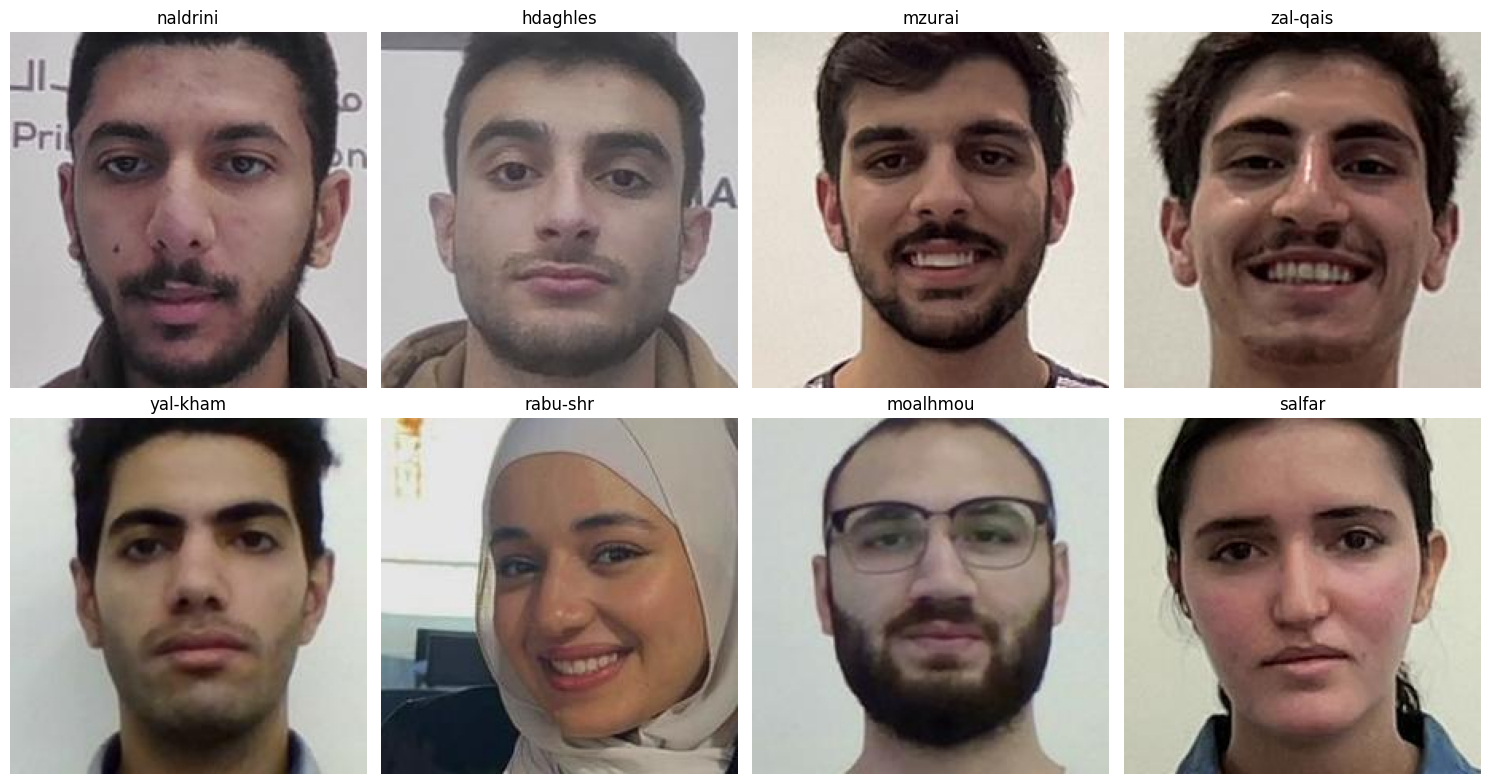

In [ ]:
# Display a random selection of processed faces
processed_images = list(PROCESSED_PATH.glob('*.jpg'))
sample_size = min(8, len(processed_images))
samples = random.sample(processed_images, sample_size)

# Create a grid to display the sample images
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, img_path in enumerate(samples):
    if i < len(axes):
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(img_path.stem)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!pip install -q albumentations

import os
import numpy as np
import pandas as pd
import face_recognition
from PIL import Image, ImageDraw
# We will still import fastai, but won't rely on its apply_tfms here for augmentation
from fastai.vision.all import * # Keep fastai for other potential uses and PILImage class
from fastai.vision.widgets import *
from pathlib import Path
import matplotlib.pyplot as plt
import zipfile
import random
import time
import albumentations as A # Import albumentations

# Assuming other necessary imports like requests, json, concurrent.futures, tqdm
import requests
import json
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm


# Rest of your initial code (download functions, process_image, process_dataset)
# ... (paste download_image, download_all_images, process_image, process_dataset here)
# Make sure PROCESSED_PATH and DATA_PATH are defined as in your notebook


# Create processed data directory (if not already done)
PROCESSED_PATH = Path('./processed_faces')
PROCESSED_PATH.mkdir(exist_ok=True)

# Assuming DATA_PATH is defined elsewhere or from the download step
# Example placeholder if not defined:
# DATA_PATH = Path(DEFAULT_OUTPUT_DIR)


# Re-define process_image and process_dataset if they were in the original code block
# ... (paste your process_image and process_dataset functions here)


# --- Start of Modified create_siamese_dataset ---
def create_siamese_dataset():
    """
    Function to create Siamese training dataset with image pairs
    using albumentations for augmentation.
    """
    # Create directories for the dataset
    siamese_data_path = Path('./siamese_data')
    siamese_data_path.mkdir(exist_ok=True)

    # Create 'same' and 'different' directories
    same_dir = siamese_data_path/'same'
    diff_dir = siamese_data_path/'different'
    same_dir.mkdir(exist_ok=True)
    diff_dir.mkdir(exist_ok=True)

    # Get all processed images
    processed_images = list(PROCESSED_PATH.glob('*.jpg'))

    if not processed_images:
        print("No processed images found. Run process_dataset first.")
        return siamese_data_path, 0, 0

    # Define the augmentations using Albumentations
    aug_albumentations = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=15, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
        A.GaussNoise(p=0.2), # Added some noise augmentation
        A.CoarseDropout(max_holes=8, max_height=8, max_width=8, fill_value=0, p=0.2), # Added dropout
        A.Resize(224, 224) # Albumentations applies resize as a transform
    ])

    # Create positive pairs (same student, different augmentations)
    print("Creating positive pairs using Albumentations...")
    positive_samples_created = 0
    positive_pairs_failed = 0
    num_positive_pairs_per_image = 3 # Create 3 augmented versions per image for more data

    for i, img_path in enumerate(processed_images):
        try:
            # Load image using PIL and convert to NumPy array (H, W, C), values 0-255
            img_pil_std = Image.open(img_path).convert('RGB')
            img_np = np.array(img_pil_std)

            for j in range(num_positive_pairs_per_image):
                 # Apply Albumentations transforms
                 augmented_np = aug_albumentations(image=img_np)['image']

                 # Convert augmented NumPy array back to PIL Image
                 augmented_pil = Image.fromarray(augmented_np.astype(np.uint8))

                 # Save the augmented image
                 pair_name = f"{img_path.stem}_aug_{j}.jpg" # Name indicating it's an augmentation
                 augmented_pil.save(same_dir/pair_name)

            positive_samples_created += num_positive_pairs_per_image

            if (i + 1) % 20 == 0: # Progress update more frequently
                print(f"Processed {i+1}/{len(processed_images)} images for positive pairs. Created {positive_samples_created} samples so far.")

        except Exception as e:
            print(f"Error creating positive pair for {img_path}: {e}")
            positive_pairs_failed += 1

    print(f"\nFinished creating positive pairs. {positive_samples_created} samples created, {positive_pairs_failed} source images failed.")


    # Create negative pairs (different students)
    print("\nCreating negative pairs...")
    # Let's create a similar number of negative pairs as positive pairs
    num_neg_pairs = positive_samples_created

    neg_successful = 0
    neg_failed = 0

    # Check if there are enough images to create negative pairs
    if len(processed_images) < 2:
        print("Need at least 2 images to create negative pairs. Skipping negative pair creation.")
        num_neg_pairs = 0

    # Use tqdm for a progress bar on negative pair creation
    for i in tqdm(range(num_neg_pairs), desc="Creating negative pairs"):
        try:
            # Select two different random images
            # Use a loop to ensure different images are selected
            img1_path = random.choice(processed_images)
            while True:
                img2_path = random.choice(processed_images)
                if img1_path != img2_path:
                    break

            # Create the pair name including both source image stems
            # The name format allows potentially reconstructing the pair source later
            pair_name = f"{img1_path.stem}_vs_{img2_path.stem}_{i}.jpg"

            # Load and resize both images using PIL to the target size
            img1_pil = Image.open(img1_path).convert('RGB').resize((224, 224), Image.Resampling.LANCZOS)
            img2_pil = Image.open(img2_path).convert('RGB').resize((224, 224), Image.Resampling.LANCZOS)

            # Combine images side-by-side to create a single image representing the pair
            combined_width = img1_pil.width + img2_pil.width
            combined_height = max(img1_pil.height, img2_pil.height)
            combined_img = Image.new('RGB', (combined_width, combined_height))
            combined_img.paste(img1_pil, (0, 0))
            combined_img.paste(img2_pil, (img1_pil.width, 0))

            combined_img.save(diff_dir/pair_name)

            neg_successful += 1

        except Exception as e:
            # Print error but don't stop the loop
            print(f"\nError creating negative pair {i}: {e}")
            neg_failed += 1
            # It might be useful to know which files caused the error
            # print(f"Error with files: {img1_path}, {img2_path}")


    print(f"\nFinished creating negative pairs. {neg_successful} samples created, {neg_failed} pairs failed.")


    # Verify dataset creation
    same_count = len(list(same_dir.glob('*.jpg')))
    diff_count = len(list(diff_dir.glob('*.jpg')))

    print(f"\nDataset creation complete!")
    print(f"Files created:")
    print(f"  '{same_dir}': {same_count} files")
    print(f"  '{diff_dir}': {diff_count} files")

    return siamese_data_path, same_count, diff_count

# Create the Siamese dataset
# Ensure PROCESSED_PATH is populated by running process_dataset first if needed
# successful_processed, failed_processed = process_dataset() # Uncomment if needed

siamese_data_path, same_count, diff_count = create_siamese_dataset()

# --- End of Modified create_siamese_dataset ---


# The next cell with the DataBlock should now work without the apply_tfms error,
# and the RandomSplitter 'Numpy is not available' issue should be addressed by the
# explicit numpy import in the get_data function (which was already added in the
# previous suggestion but included again below for completeness in the corrected code block).

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
<ipython-input-9-cf03b479047b>:72: UserWarning: Argument(s) 'max_holes, max_height, max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=8, max_width=8, fill_value=0, p=0.2), # Added dropout


Creating positive pairs using Albumentations...
Processed 20/767 images for positive pairs. Created 60 samples so far.
Processed 40/767 images for positive pairs. Created 120 samples so far.
Processed 60/767 images for positive pairs. Created 180 samples so far.
Processed 80/767 images for positive pairs. Created 240 samples so far.
Processed 100/767 images for positive pairs. Created 300 samples so far.
Processed 120/767 images for positive pairs. Created 360 samples so far.
Processed 140/767 images for positive pairs. Created 420 samples so far.
Processed 160/767 images for positive pairs. Created 480 samples so far.
Processed 180/767 images for positive pairs. Created 540 samples so far.
Processed 200/767 images for positive pairs. Created 600 samples so far.
Processed 220/767 images for positive pairs. Created 660 samples so far.
Processed 240/767 images for positive pairs. Created 720 samples so far.
Processed 260/767 images for positive pairs. Created 780 samples so far.
Processe

Creating negative pairs: 100%|██████████| 2301/2301 [00:04<00:00, 524.01it/s]


Finished creating negative pairs. 2301 samples created, 0 pairs failed.

Dataset creation complete!
Files created:
  'siamese_data/same': 2301 files
  'siamese_data/different': 2301 files


In [ ]:

# Create a FastAI DataBlock for the Siamese network
class SiameseImage(fastuple):
    @classmethod
    def create(cls, fnames):
        return cls(PILImage.create(fnames))

# Set up the dataloader with explicit NumPy check
def get_data(bs=32):
    """Create FastAI dataloaders for the Siamese network with error handling."""
    # First explicitly check if numpy is available
    try:
        import numpy as np
        print("NumPy is available, version:", np.__version__)
    except ImportError:
        print("Error: NumPy is not available. Please install it with: pip install numpy")
        return None

    # Now proceed with dataloader creation
    try:
        # Define a transform that ensures all images are resized to the same dimensions
        # This addresses the error where images have inconsistent sizes
        item_tfms = [Resize(224)]

        dblock = DataBlock(
            blocks=(ImageBlock, CategoryBlock),
            get_items=get_image_files,
            get_y=parent_label,
            splitter=RandomSplitter(valid_pct=0.2, seed=42),
            item_tfms=item_tfms,  # Apply resize to each item individually
            batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
        )

        # Verify siamese_data_path exists
        if not siamese_data_path.exists():
            print(f"Warning: {siamese_data_path} does not exist. Run create_siamese_dataset() first.")
            return None

        print(f"Loading data from {siamese_data_path}...")
        return dblock.dataloaders(siamese_data_path, bs=bs)

    except Exception as e:
        print(f"Error creating dataloaders: {e}")
        return None

dls = get_data()

NumPy is available, version: 2.0.2
Loading data from siamese_data...


Successfully created dataloaders
Displaying sample batch:
Successfully imported cnn_learner
Creating model...


/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 178MB/s]


Model created successfully
Finding optimal learning rate...


Training model for 5 epochs...


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.578742,0.071673,0.025000,0.975000,00:21
1,0.295090,0.056040,0.019565,0.980435,00:18
2,0.213081,0.031767,0.011957,0.988043,00:18
3,0.146310,0.030468,0.009783,0.990217,00:18
4,0.144533,0.025015,0.009783,0.990217,00:21


Saving model...
Model saved as 'siamese_model'


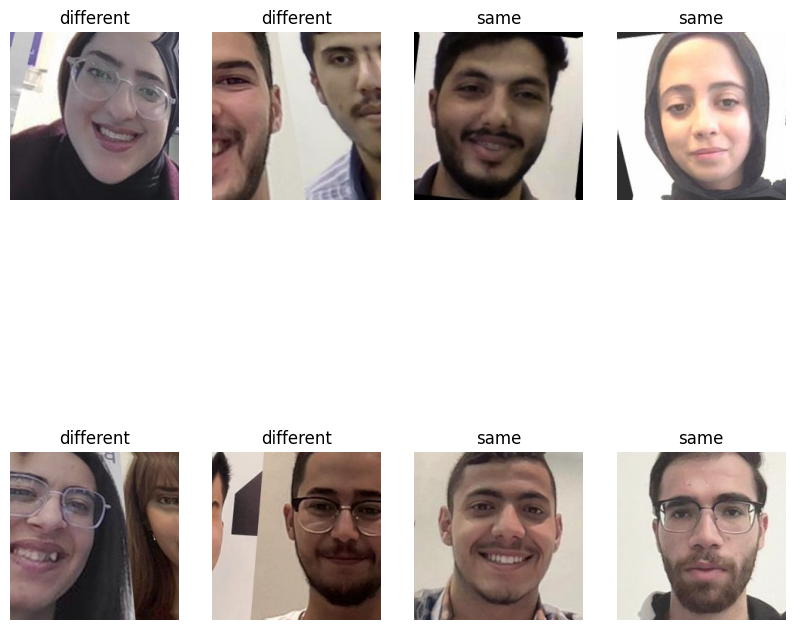

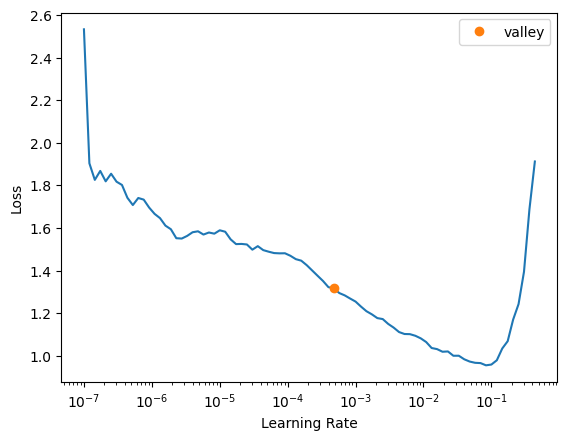

In [ ]:
if dls is not None:
    print(f"Successfully created dataloaders")
    # Safely show a batch with error handling
    try:
        print("Displaying sample batch:")
        dls.show_batch(max_n=8, figsize=(10, 10))
    except Exception as e:
        print(f"Error showing batch: {e}")

    # Create and train the model with proper error handling
    try:
        # Explicitly import cnn_learner if it's not already available
        try:
            from fastai.vision.all import cnn_learner
            print("Successfully imported cnn_learner")
        except ImportError:
            print("Attempting alternative import path...")
            from fastai.vision.learner import cnn_learner
            print("Imported cnn_learner from fastai.vision.learner")

        print("Creating model...")
        learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])
        print("Model created successfully")

        # Find optimal learning rate
        print("Finding optimal learning rate...")
        learn.lr_find()

        # Train the model
        print("Training model for 5 epochs...")
        learn.fit_one_cycle(5, 1e-3)

        # Save the model
        print("Saving model...")
        learn.save('siamese_model')
        print("Model saved as 'siamese_model'")

    except Exception as e:
        print(f"Error in model creation or training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Failed to create dataloaders. Please resolve the issues above.")

SuggestedLRs(valley=1.4454397387453355e-05)

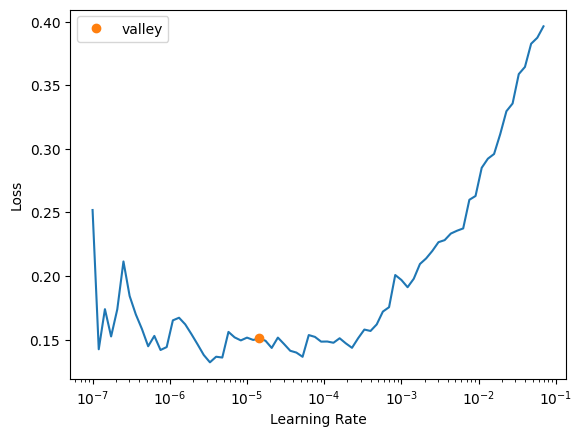

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
# Continue training with discriminative learning rates
learn.fit_one_cycle(5, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.153247,0.019894,0.006522,0.993478,00:24
1,0.116888,0.021722,0.006522,0.993478,00:24
2,0.099638,0.012310,0.002174,0.997826,00:24
3,0.097193,0.016303,0.003261,0.996739,00:24
4,0.068197,0.015591,0.003261,0.996739,00:24


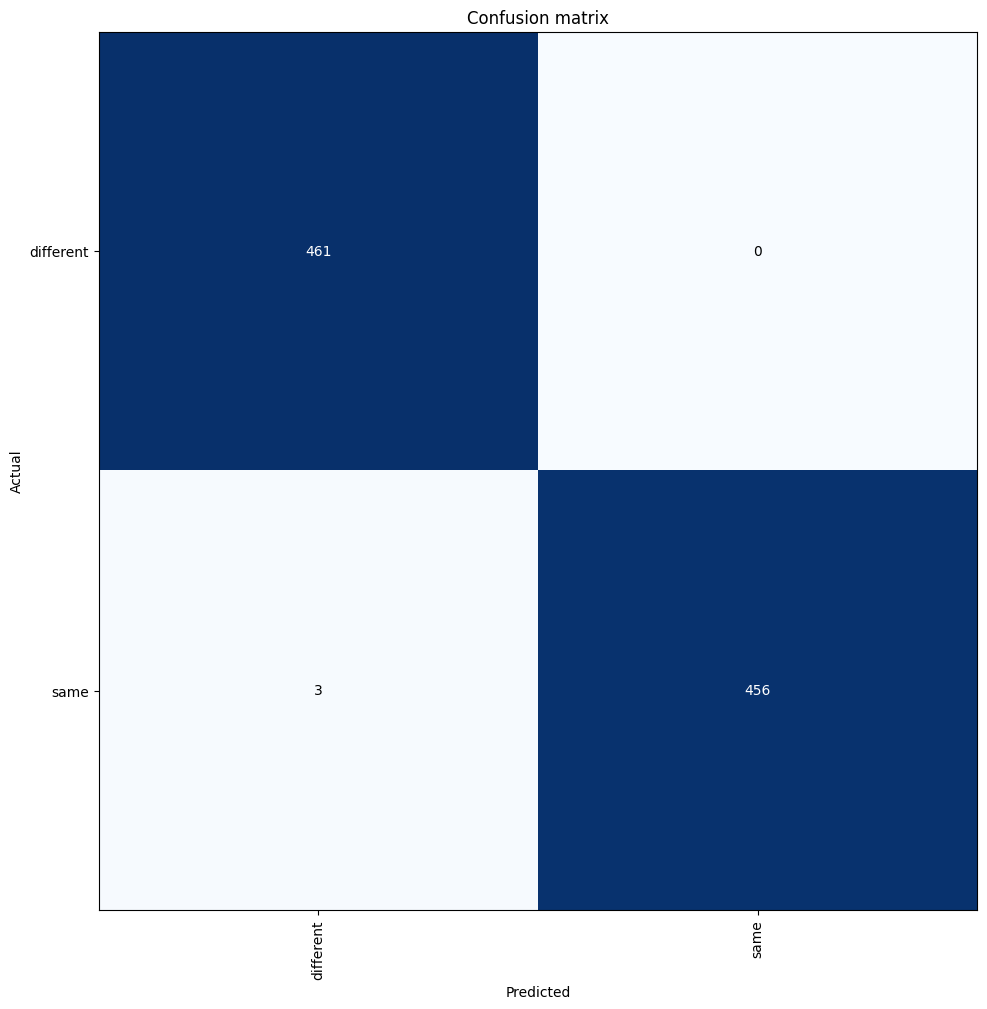

In [ ]:
# Evaluate the model on the validation set
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

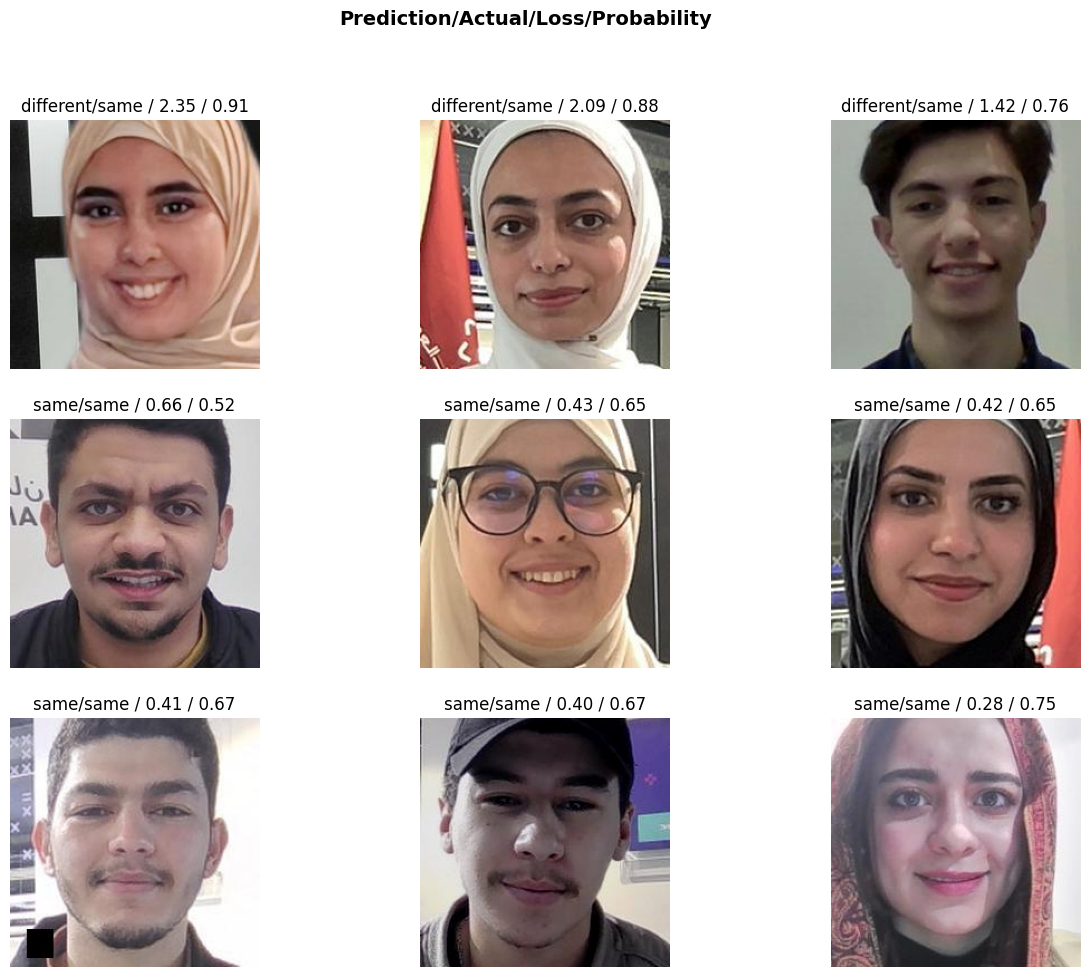

In [ ]:
# Display the most confused images
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
def extract_features(learn, img_path):
    """Extract features from the penultimate layer of the model"""
    import torch

    # Load and transform the image
    img = PILImage.create(img_path)

    # Create a test batch with a single image
    batch = learn.dls.test_dl([img])

    # Determine the device and move data appropriately
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Get the model's feature extractor (everything except the final layer)
    feature_extractor = learn.model[:-1].to(device)

    # Ensure the model is in eval mode
    feature_extractor.eval()

    # Extract features with gradient calculation disabled for efficiency
    with torch.no_grad():
        # Get the first batch from the dataloader
        batch_data = first(batch)

        # Debug the batch data structure
        print(f"Batch data type: {type(batch_data)}")

        # Handle different batch data structures
        if isinstance(batch_data, tuple):
            # Always take the first element from the tuple, which should be the input tensor
            x = batch_data[0]
            print(f"Extracted tensor from tuple, shape: {x.shape}")
        else:
            # It's already a tensor
            x = batch_data
            print(f"Using tensor directly, shape: {x.shape}")

        # Move tensor to device
        x = x.to(device)

        # Get the embeddings/activations from the feature extractor
        activations = feature_extractor(x)

    # Convert to numpy array (first taking it back to CPU if needed)
    return activations[0].cpu().numpy()

# Test feature extraction on a few images with better error handling
try:
    test_imgs = random.sample(list(PROCESSED_PATH.glob('*.jpg')), 3)
    for img_path in test_imgs:
        try:
            features = extract_features(learn, img_path)
            print(f"Image: {img_path.name}, Feature vector shape: {features.shape}")
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
except NameError as e:
    print(f"Error: {e}. Make sure the model 'learn' is defined before running feature extraction.")



Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Image: mkhandaq.jpg, Feature vector shape: (512, 7, 7)
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Image: moawad.jpg, Feature vector shape: (512, 7, 7)
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Image: yalrosan.jpg, Feature vector shape: (512, 7, 7)


In [ ]:
# Save the model
learn.export('./42amman_face_model.pkl')
print("Model saved to './42amman_face_model.pkl'")

# Precompute and save feature vectors for all processed faces
feature_vectors = {}
processed_images = list(PROCESSED_PATH.glob('*.jpg'))

print(f"Computing feature vectors for {len(processed_images)} images...")
for i, img_path in enumerate(processed_images):
    if i % 50 == 0:
        print(f"Progress: {i}/{len(processed_images)}")

    features = extract_features(learn, img_path)
    feature_vectors[img_path.stem] = features

# Save feature vectors
np.save('./42amman_face_features.npy', feature_vectors)
print("Feature vectors saved to './42amman_face_features.npy'")


Model saved to './42amman_face_model.pkl'
Computing feature vectors for 767 images...
Progress: 0/767
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Batch data type: <class 'tuple'>
Extracted tensor from tuple, shape: torch.Size([1, 3, 224, 224])
Batch data type:

# test


In [ ]:
# Import required libraries
!pip install -q  gradio

import os
import numpy as np
import pandas as pd
import face_recognition
from PIL import Image, ImageDraw
from fastai.vision.all import *
from fastai.vision.widgets import *
from pathlib import Path
import matplotlib.pyplot as plt
import random
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
model_path = Path('./42amman_face_model.pkl')
features_path = Path('./42amman_face_features.npy')
profiles_path = Path('./amman_profile_images')

# Verify files exist
print(f"Model exists: {model_path.exists()}")
print(f"Feature vectors exist: {features_path.exists()}")
print(f"Profile images exist: {profiles_path.exists()}")

Model exists: True
Feature vectors exist: True
Profile images exist: True


In [ ]:
# Load the model
learn = load_learner(model_path)
print("Model loaded successfully!")

# Load feature vectors
feature_vectors = np.load(features_path, allow_pickle=True).item()
print(f"Loaded feature vectors for {len(feature_vectors)} students")

Model loaded successfully!
Loaded feature vectors for 767 students


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [ ]:
def process_image(img_path, output_path):
    """Detect face in image, crop, and save to output path"""
    try:
        # Load image using face_recognition
        if isinstance(img_path, str) or isinstance(img_path, Path):
            image = face_recognition.load_image_file(img_path)
        else:  # Assume it's a numpy array
            image = img_path

        # Find all face locations in the image
        face_locations = face_recognition.face_locations(image, model="hog")

        if not face_locations:
            print(f"No face found in the image")
            return False

        # For simplicity, we'll use the first face found
        top, right, bottom, left = face_locations[0]

        # Add some margin to the face crop (20% of face size)
        height, width = bottom - top, right - left
        margin_h, margin_w = int(height * 0.2), int(width * 0.2)

        # Adjust boundaries with margins and ensure they're within image bounds
        img_h, img_w = image.shape[:2]
        top = max(0, top - margin_h)
        bottom = min(img_h, bottom + margin_h)
        left = max(0, left - margin_w)
        right = min(img_w, right + margin_w)

        # Crop the image to focus on the face
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)

        # Resize to a standard size (224x224 for resnet34)
        pil_image = pil_image.resize((224, 224), Image.Resampling.LANCZOS)

        # Save the processed image
        pil_image.save(output_path)
        return True
    except Exception as e:
        print(f"Error processing image: {e}")
        return False


def extract_features(learn, img_path):
    """Extract features from the penultimate layer of the model"""
    import torch

    # Load and transform the image
    img = PILImage.create(img_path)

    # Create a test batch with a single image
    batch = learn.dls.test_dl([img])

    # Determine the device and move data appropriately
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Get the model's feature extractor (everything except the final layer)
    feature_extractor = learn.model[:-1].to(device)

    # Ensure the model is in eval mode
    feature_extractor.eval()

    # Extract features with gradient calculation disabled for efficiency
    with torch.no_grad():
        # Get the first batch from the dataloader
        batch_data = first(batch)

        # Handle different batch data structures
        if isinstance(batch_data, tuple):
            # Always take the first element from the tuple, which should be the input tensor
            x = batch_data[0]
        else:
            # It's already a tensor
            x = batch_data

        # Move tensor to device
        x = x.to(device)

        # Get the embeddings/activations from the feature extractor
        activations = feature_extractor(x)

    # Convert to numpy array (first taking it back to CPU if needed)
    return activations[0].cpu().numpy()


In [ ]:


def recognize_face(img_path, threshold=0.7):
    """Recognize a face in the given image

    Args:
        img_path: Path to the query image
        threshold: Cosine similarity threshold (higher = more strict)

    Returns:
        List of potential matches with similarity scores
    """
    # Create working directory if it doesn't exist
    work_dir = Path('./')
    work_dir.mkdir(exist_ok=True)

    # Process the query image to extract face
    query_face_path = work_dir/'query_face.jpg'
    face_found = process_image(img_path, query_face_path)

    if not face_found:
        return "No face detected in the query image", None

    # Extract features from the query face
    query_features = extract_features(learn, query_face_path)

    # Debug information
    print(f"Query feature shape: {query_features.shape}")

    # Calculate cosine similarity with all known faces
    similarities = {}
    for name, features in feature_vectors.items():
        # Ensure features are flattened to 1D if needed
        flat_query = query_features.flatten()
        flat_features = np.array(features).flatten()

        # Print shape information for first item to debug
        if len(similarities) == 0:
            print(f"Database feature shape: {np.array(features).shape}")
            print(f"Flattened shapes - Query: {flat_query.shape}, DB: {flat_features.shape}")

        # Calculate cosine similarity
        similarity = np.dot(flat_query, flat_features) / (
            np.linalg.norm(flat_query) * np.linalg.norm(flat_features))

        # Store as single float value
        similarities[name] = float(similarity)

    # Sort by similarity score (highest first)
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

    # Filter by threshold
    matches = [match for match in sorted_similarities if match[1] >= threshold]

    if not matches:
        return "No matches found above the similarity threshold", sorted_similarities[:5]

    return matches, query_face_path


In [ ]:
# Test on a profile image (should match perfectly)
test_img = list(profiles_path.glob('*.jpg'))[5]
print(f"Testing recognition with image: {test_img.name}")

matches, query_face_path = recognize_face(test_img, threshold=0.8)

if isinstance(matches, str):
    print(matches)
else:
    print(f"Found {len(matches)} potential matches:")
    for name, score in matches[:5]:  # Show top 5 matches
        print(f"  - {name}: {score:.4f}")

Testing recognition with image: nawagah.jpg
Using device: cuda
Query feature shape: (512, 7, 7)
Database feature shape: (512, 7, 7)
Flattened shapes - Query: (25088,), DB: (25088,)
Found 1 potential matches:
  - nawagah: 1.0000


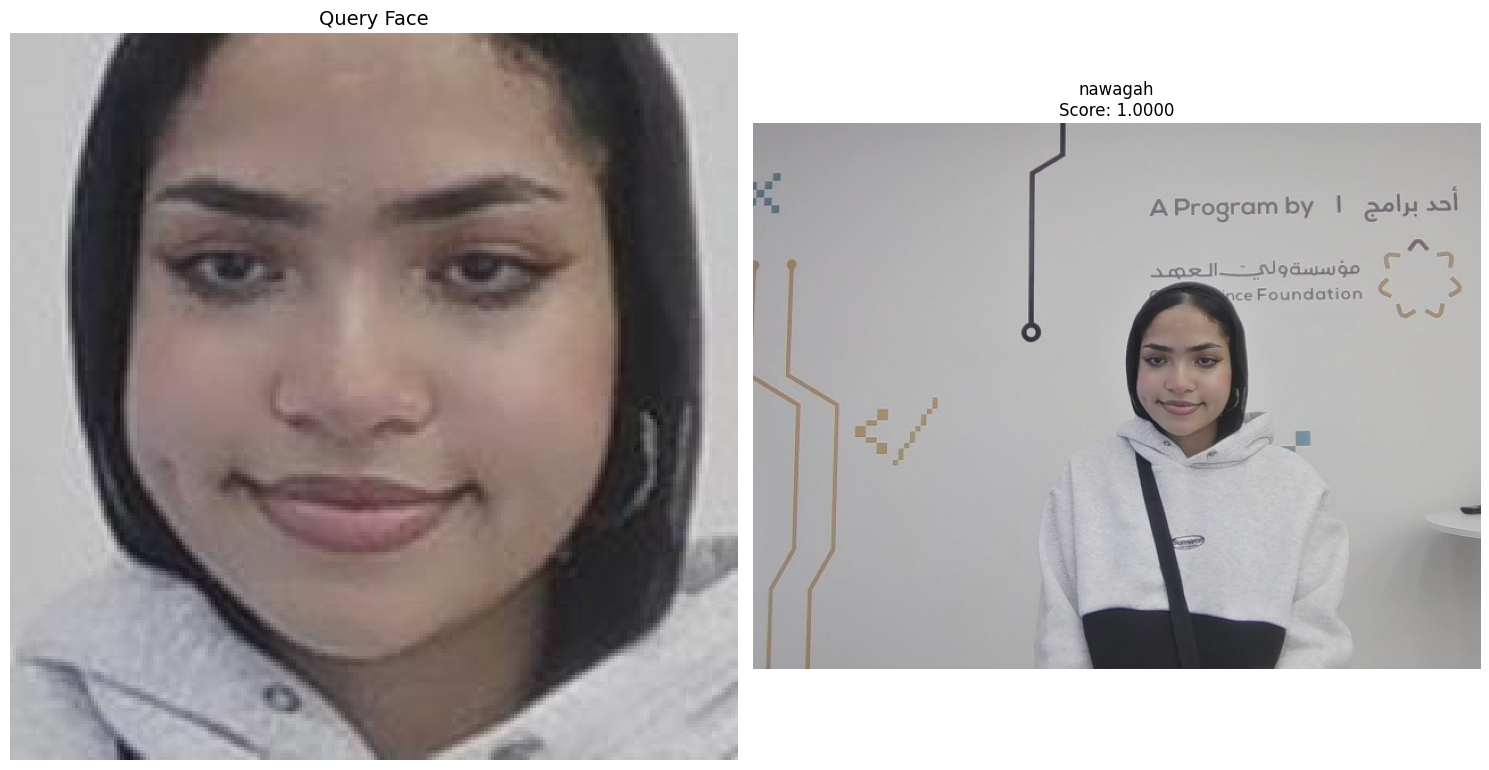

In [ ]:
def visualize_matches(query_face_path, matches, top_n=5):
    """Visualize the query face and top matches"""
    if isinstance(matches, str):
        plt.figure(figsize=(8, 6))
        plt.text(0.5, 0.5, matches, fontsize=14, ha='center')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        return

    # Get top N matches
    top_matches = matches[:min(top_n, len(matches))]

    # Create figure with query face and top matches
    fig = plt.figure(figsize=(15, 8))

    # Display query face
    ax = fig.add_subplot(1, len(top_matches) + 1, 1)
    query_img = plt.imread(query_face_path)
    ax.imshow(query_img)
    ax.set_title("Query Face", fontsize=14)
    ax.axis('off')

    # Display top matches
    for i, (name, score) in enumerate(top_matches):
        # Get the original profile image for this match
        match_img_path = profiles_path/f"{name}.jpg"

        if not match_img_path.exists():
            continue

        ax = fig.add_subplot(1, len(top_matches) + 1, i + 2)
        match_img = plt.imread(match_img_path)
        ax.imshow(match_img)
        ax.set_title(f"{name}\nScore: {score:.4f}", fontsize=12)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the test results
if not isinstance(matches, str) and query_face_path is not None:
    visualize_matches(query_face_path, matches)

In [ ]:
def recognize_face_gradioe(image, threshold=0.7):
    """Recognize face for Gradio interface"""
    if image is None:
        return "Please upload an image"

    # Save the uploaded image temporarily
    temp_path = './image.png'
    Image.fromarray(image).save(temp_path)

    # Recognize the face
    matches, query_face_path = recognize_face(temp_path, threshold=threshold)

    if isinstance(matches, str):
        return matches

    # Format the results
    result = ""
    if len(matches) > 0:
        result += f"Found {len(matches)} potential matches:\n\n"
        for i, (name, score) in enumerate(matches[:5]):  # Show top 5 matches
            result += f"{i+1}. {name}: Confidence {score:.2%}\n"
    else:
        result = "No matches found above the threshold."

    return result

# Create the Gradio interface
iface = gr.Interface(
    fn=recognize_face_gradioe,
    inputs=[
        gr.Image(type="numpy", label="Upload a face image"),
        gr.Slider(minimum=0.5, maximum=0.95, value=0.7, step=0.05, label="Similarity Threshold")
    ],
    outputs=gr.Textbox(label="Recognition Results"),
    title="42 Amman Face Recognition",
    description="Upload a photo to check if it matches a student from 42 Amman."
)

# Launch the interface
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c6317edfdc79efd08f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
